# <center>Анализ ВВП страны Гана (Африка)</center> #

##  <center> ПРОЕКТ  </center> ##

### Введение
Представьте, что вы работаете в государственной компании, предоставляющей анализ экономической ситуации в мире по заказу государства.

Перед вами стоит задача проанализировать ВВП африканской страны Гана. Для этого вам предоставили показатели ВВП Ганы за 62 года. Вам предстоит исследовать временной ряд, изучить его свойства, построить модели и сделать выводы по результатам.

### Задания для проекта

Итак, здесь вы начинаете работу над своим небольшим проектом. Напоминаем — работать нужно с данными по ВВП Ганы. Выполняйте все задания проекта в одном Jupyter-ноутбуке.

1. Прочитайте исходный файл с данными. Визуализируйте исходный временной ряд, сделайте первичные выводы о присутствии компонент тренда и сезонности в ряде.

Отложите последние три года из датасета как тестовую выборку для оценки результатов предсказания.

2. Постройте график скользящего среднего, проанализируйте результат. Для построения MA используйте метод rolling(), который принимает в качестве параметра размер окна. Используйте среднее как функцию для сглаживания. Ширину окна подберите самостоятельно.
Пример: train_df.spx.rolling(window=2).mean().

Визуализируйте исходный временной ряд и построенный с помощью скользящего среднего прогноз, сравните графики между собой и сделайте выводы.

3. С помощью теста Дики-Фуллера оцените стационарность временного ряда и примите решение о выборе модели ARMA/ARIMA.
Примечание. Если ваш ряд является нестационарным, дифференцируйте его до тех пор, пока он не станет таковым. Количество дифференцирований, необходимых для сведения ряда к стационарному, будет вашим параметром d для модели ARIMA.

Параметры p и q выберите по коррелограммам ACF и PACF.
Примечание. Помните, что параметры p и q для ARMA/ARIMA определяются из коррелограмм стационарного ряда. То есть, если ваш изначальный временной ряд не являлся стационарным, то коррелограммы строятся для разностей того порядка, которые являются стационарными.

Постройте модель ARMA/ARIMA для прогнозирования поведения временного ряда.

Также постройте несколько моделей с параметрами, ближайшими к найденным p и q, и сравните коэффициент AIC (или подберите наилучшие параметры с помощью пакета pmdarima, как в скринкасте).

4. Постройте модель с наилучшими параметрами и выполните предсказание для отложенной тестовой выборки (последние три года).

5. Отобразите результат графически — постройте графики истинного и предсказанного поведения временного ряда, а также 95%-ый доверительный интервал для прогноза.

6. Сделайте выводы по полученным результатам.

In [5]:
from warnings import filterwarnings
filterwarnings("ignore")

In [6]:
from IPython.display import display, Markdown

import sys
import os
from pathlib import Path

# Определяем путь к директории ноутбука
# Простое решение: определяем папку, где находится файл ноутбука
notebook_dir = None

# Способ 1: Используем библиотеку ipynbname (самый надежный способ)
# Если библиотека не установлена, она будет установлена автоматически
try:
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except ImportError:
    # Устанавливаем библиотеку, если её нет
    import subprocess
    import sys
    print("📦 Устанавливаю библиотеку ipynbname для определения пути к ноутбуку...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "ipynbname", "-q"])
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except Exception as e:
    print(f"⚠️  Не удалось использовать ipynbname: {e}")

# Способ 2: Пробуем получить путь через IPython (запасной вариант)
if notebook_dir is None:
    try:
        from IPython import get_ipython
        ipython = get_ipython()
        if ipython is not None:
            if hasattr(ipython, 'start_dir'):
                notebook_dir = str(Path(ipython.start_dir).resolve())
    except:
        pass

# Способ 3: Если не удалось определить, выводим ошибку
if notebook_dir is None:
    print(f"❌ ОШИБКА: Не удалось определить папку ноутбука!")
    print(f"   Текущая рабочая директория: {os.getcwd()}")
    print(f"   Установите библиотеку: pip install ipynbname")
    raise RuntimeError("Не удалось определить директорию ноутбука. Установите: pip install ipynbname")

# Выводим информацию для диагностики
print(f"📂 Директория ноутбука: {notebook_dir}")
print(f"📂 Текущая рабочая директория (до chdir): {os.getcwd()}")

# Добавляем путь к директории ноутбука в sys.path (в начало для приоритета)
if notebook_dir not in sys.path:
    sys.path.insert(0, notebook_dir)

# Меняем рабочую директорию на директорию ноутбука, чтобы относительные пути работали
os.chdir(notebook_dir)
print(f"📂 Рабочая директория установлена: {os.getcwd()}")

📂 Директория ноутбука: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 8\MATH&ML-13. Временные ряды. Часть II
📂 Текущая рабочая директория (до chdir): C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 8\MATH&ML-13. Временные ряды. Часть II
📂 Рабочая директория установлена: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 8\MATH&ML-13. Временные ряды. Часть II


Загружаем данные

In [18]:
import pandas as pd

# Загружаем данные
data = pd.read_csv("./data/ghana_gdp.csv", parse_dates=["year"], index_col=["year"])

# Переименовываем столбец для удобства работы
data.columns = ['GDP']

# Устанавливаем частоту 'AS' (Annual Start) для годовых данных
# Это важно для корректной работы ARIMA/SARIMA моделей
data.index.freq = 'AS'

# Проверяем структуру данных
print(f"Частота индекса: {data.index.freq}")
print(f"Формат индекса: {type(data.index)}")
print(f"\nИнформация о данных:")
print(data.info())
print(f"\nПервые 5 строк:")
data.head()

Частота индекса: <YearBegin: month=1>
Формат индекса: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 1960-01-01 to 2021-01-01
Freq: YS-JAN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     62 non-null     float64
dtypes: float64(1)
memory usage: 992.0 bytes
None

Первые 5 строк:


,GDP
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


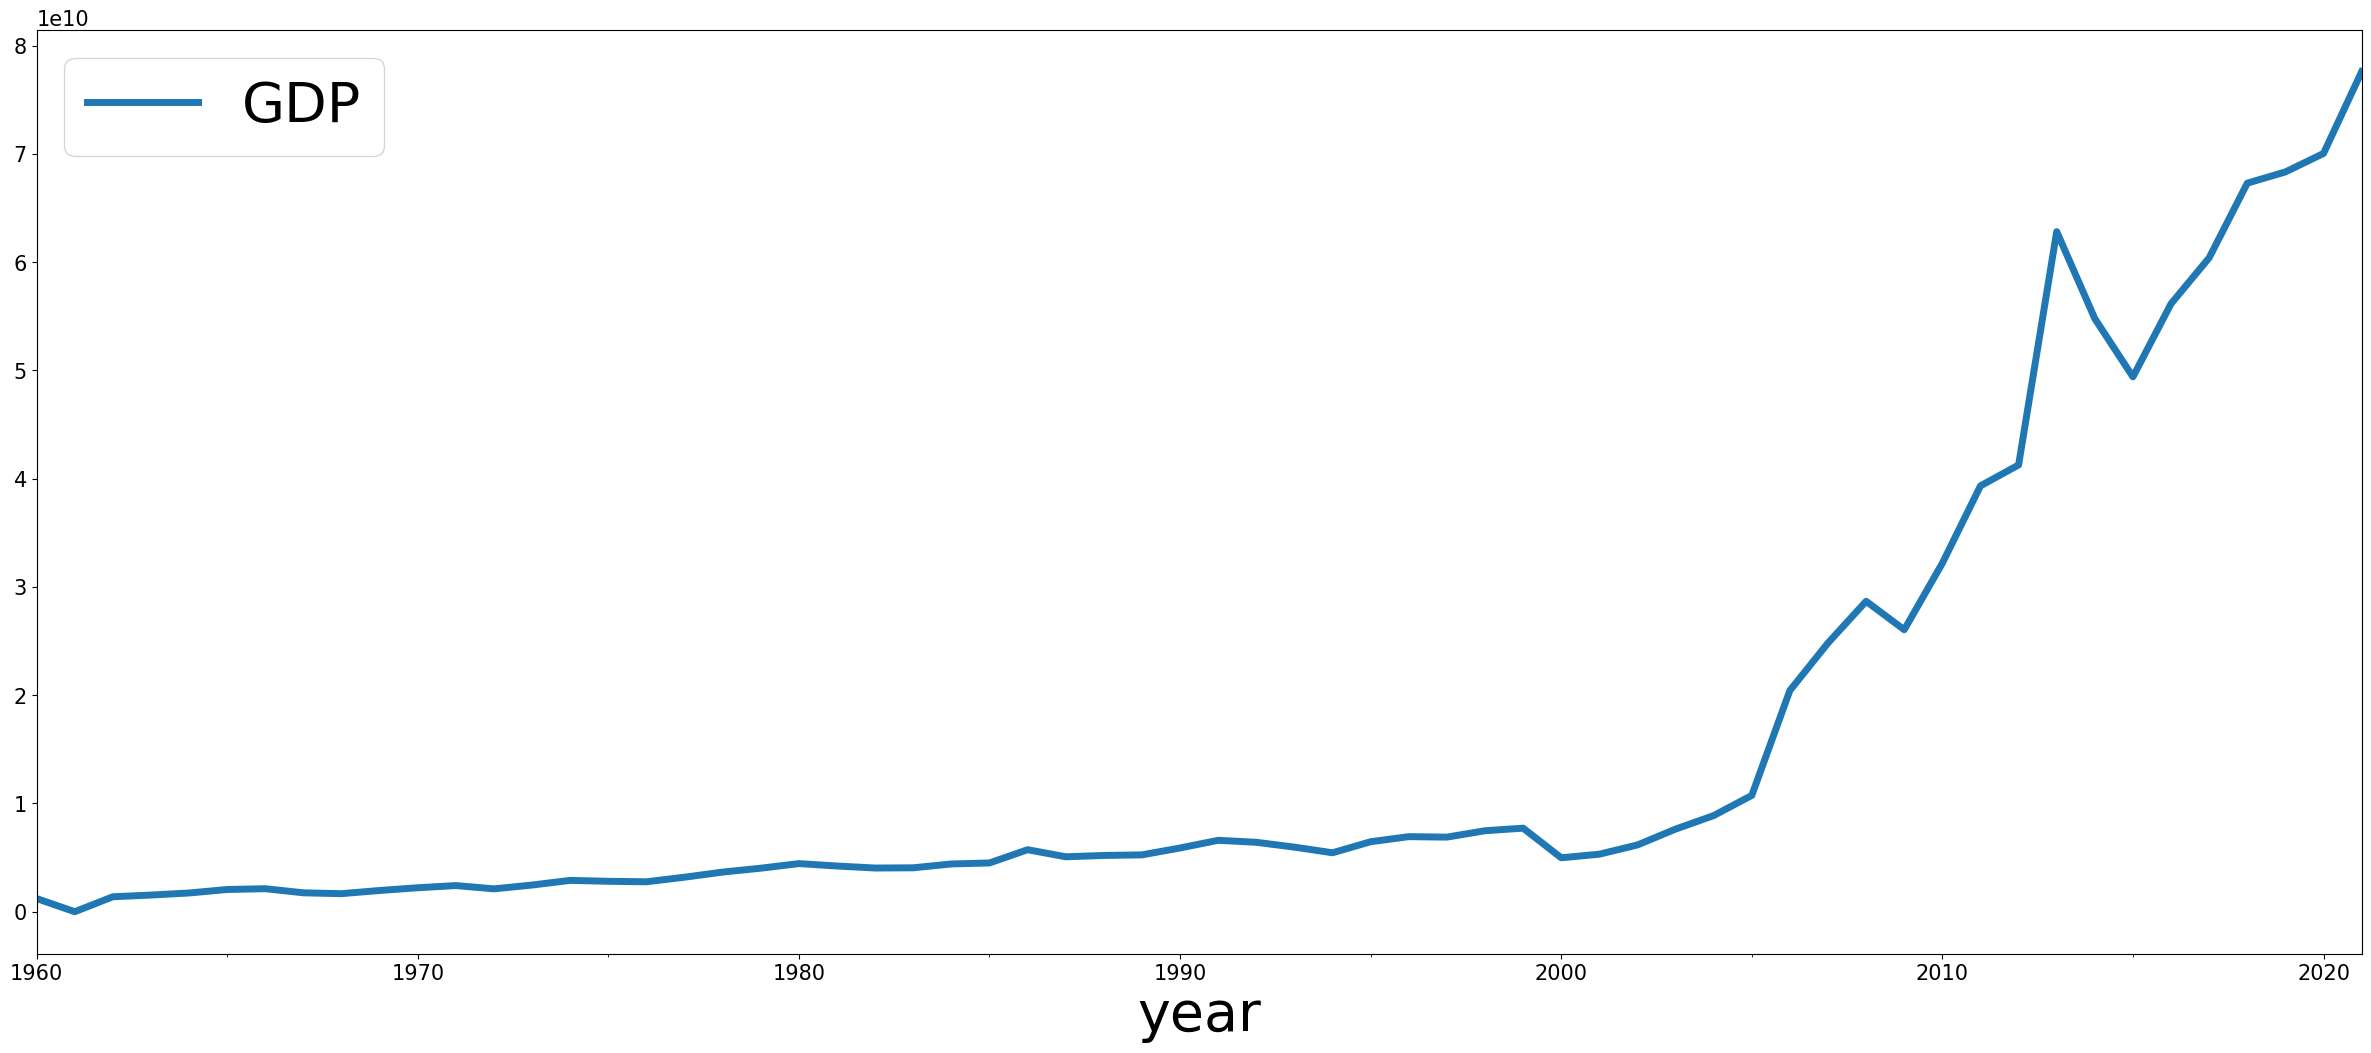

In [19]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = 30, 12
plt.rcParams["font.size"] = 40
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["lines.linewidth"] = 5

data.plot()
plt.show()

In [20]:
# Разделяем данные на обучающую и тестовую выборки
# Последние три года откладываем как тестовую выборку (расчетным путем)

# Определяем количество лет для тестовой выборки
test_years = 3

# Вычисляем индекс начала тестовой выборки (последние 3 года)
test_start_idx = data.index[-test_years]

# Разделяем данные
# Обучающая выборка: все данные кроме последних test_years лет
train_df = data.iloc[:-test_years]

# Тестовая выборка: последние test_years лет
test_df = data.iloc[-test_years:]

print(f"Всего наблюдений в датасете: {data.shape[0]}")
print(f"Количество лет для тестовой выборки: {test_years}")
print(f"\nОбучающая выборка (train_df): {train_df.shape[0]} наблюдений")
print(f"  Период: {train_df.index[0].year} - {train_df.index[-1].year}")
print(f"\nТестовая выборка (test_df): {test_df.shape[0]} наблюдений")
print(f"  Период: {test_df.index[0].year} - {test_df.index[-1].year}")

train_df.shape, test_df.shape

Всего наблюдений в датасете: 62
Количество лет для тестовой выборки: 3

Обучающая выборка (train_df): 59 наблюдений
  Период: 1960 - 2018

Тестовая выборка (test_df): 3 наблюдений
  Период: 2019 - 2021


((59, 1), (3, 1))

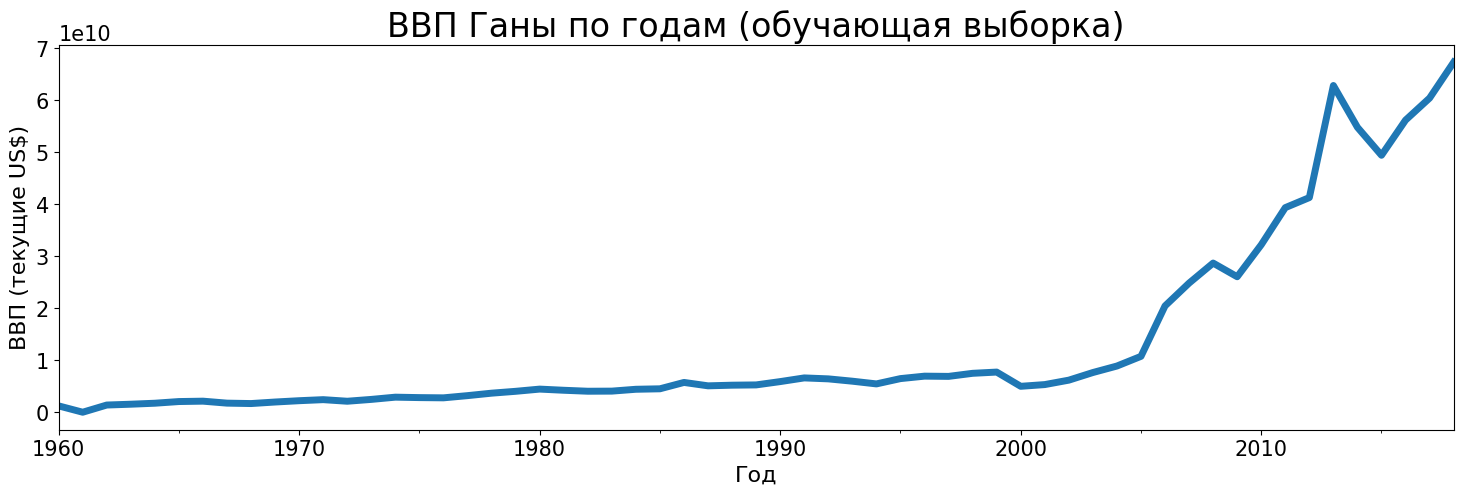

In [28]:
# можно посмотреть на данные по годам
plt.rcParams["figure.figsize"] = 18, 5

# Для годовых данных построим общий график
train_df.GDP.plot()
plt.title("ВВП Ганы по годам (обучающая выборка)", size=24)
plt.xlabel("Год", size=16)
plt.ylabel("ВВП (текущие US$)", size=16)
plt.show()

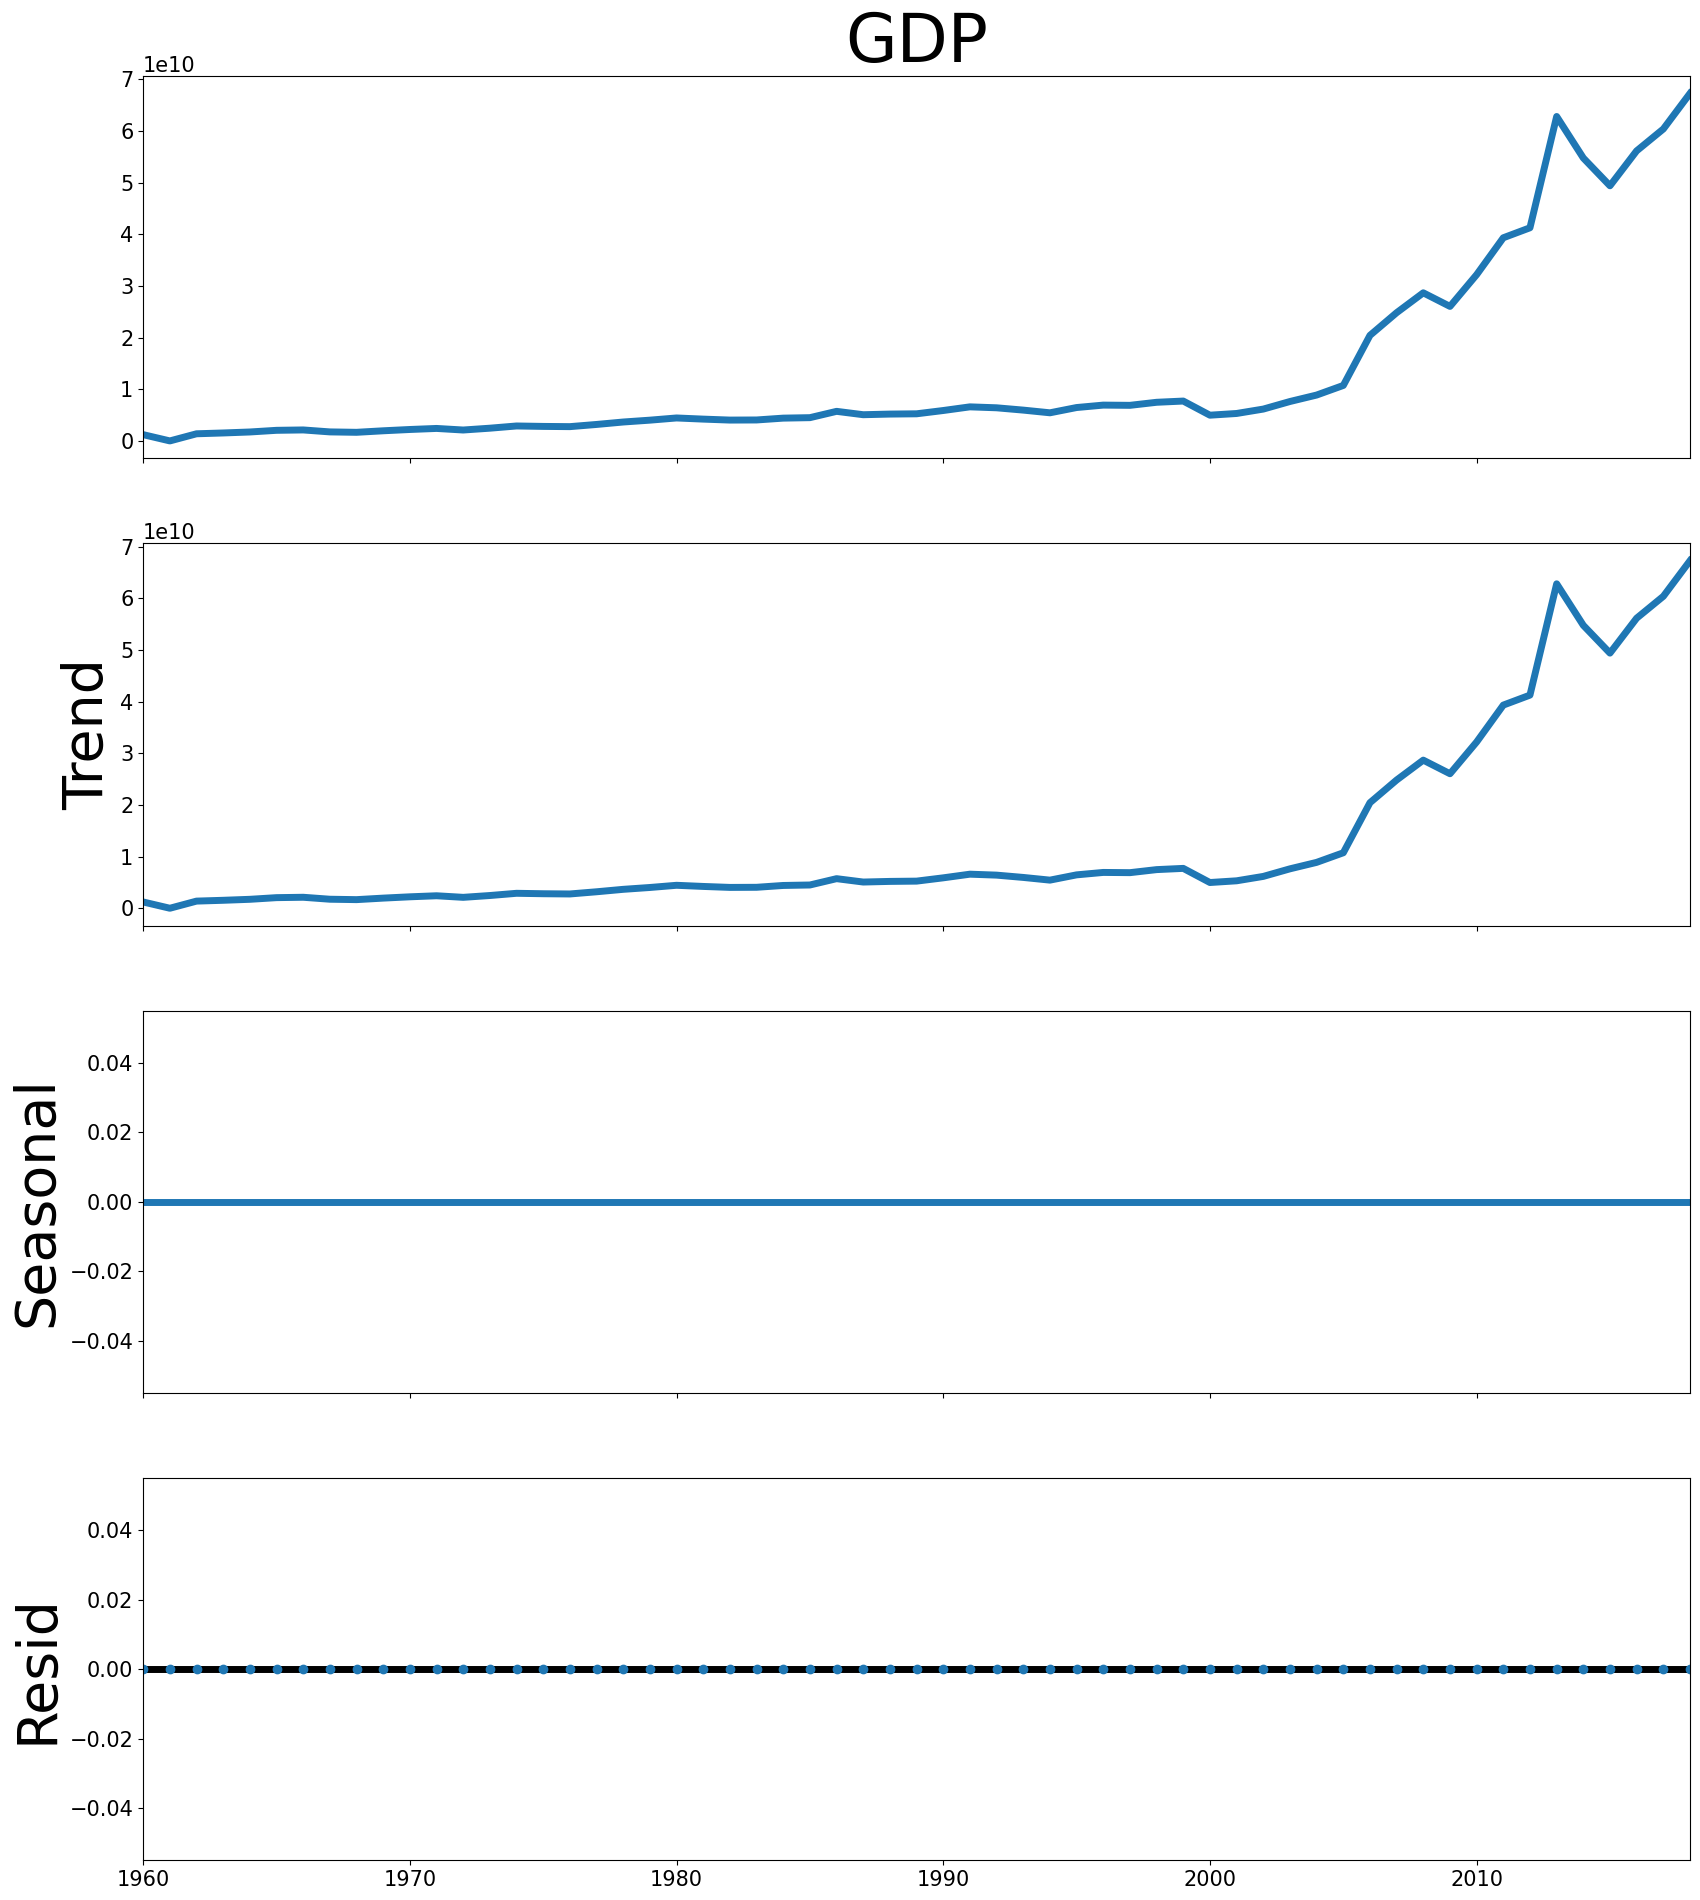

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams["figure.figsize"] = 18, 20

# Для годовых данных сезонная декомпозиция может быть не очень информативна
# но попробуем посмотреть на компоненты
result = seasonal_decompose(train_df.GDP, model='additive', period=1)
result.plot()
plt.show()

Сезонная компонента отсутствует

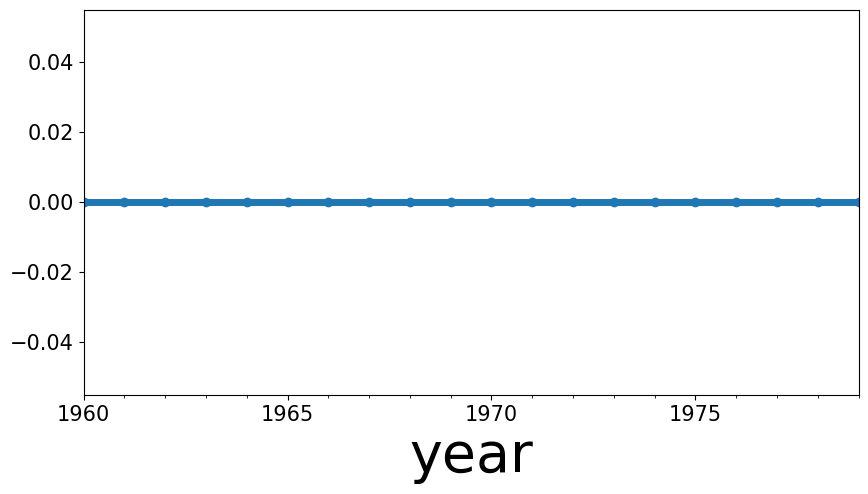

In [31]:
plt.rcParams["figure.figsize"] = 10, 5
result.seasonal[:20].plot(marker="o")
plt.show()

Построим график скользящего среднего, проанализируем результат. Для построения MA используем метод rolling(), который принимает в качестве параметра размер окна. Используем среднее как функцию для сглаживания. Ширину окна подбераем самостоятельно.
Пример: train_df.spx.rolling(window=2).mean().



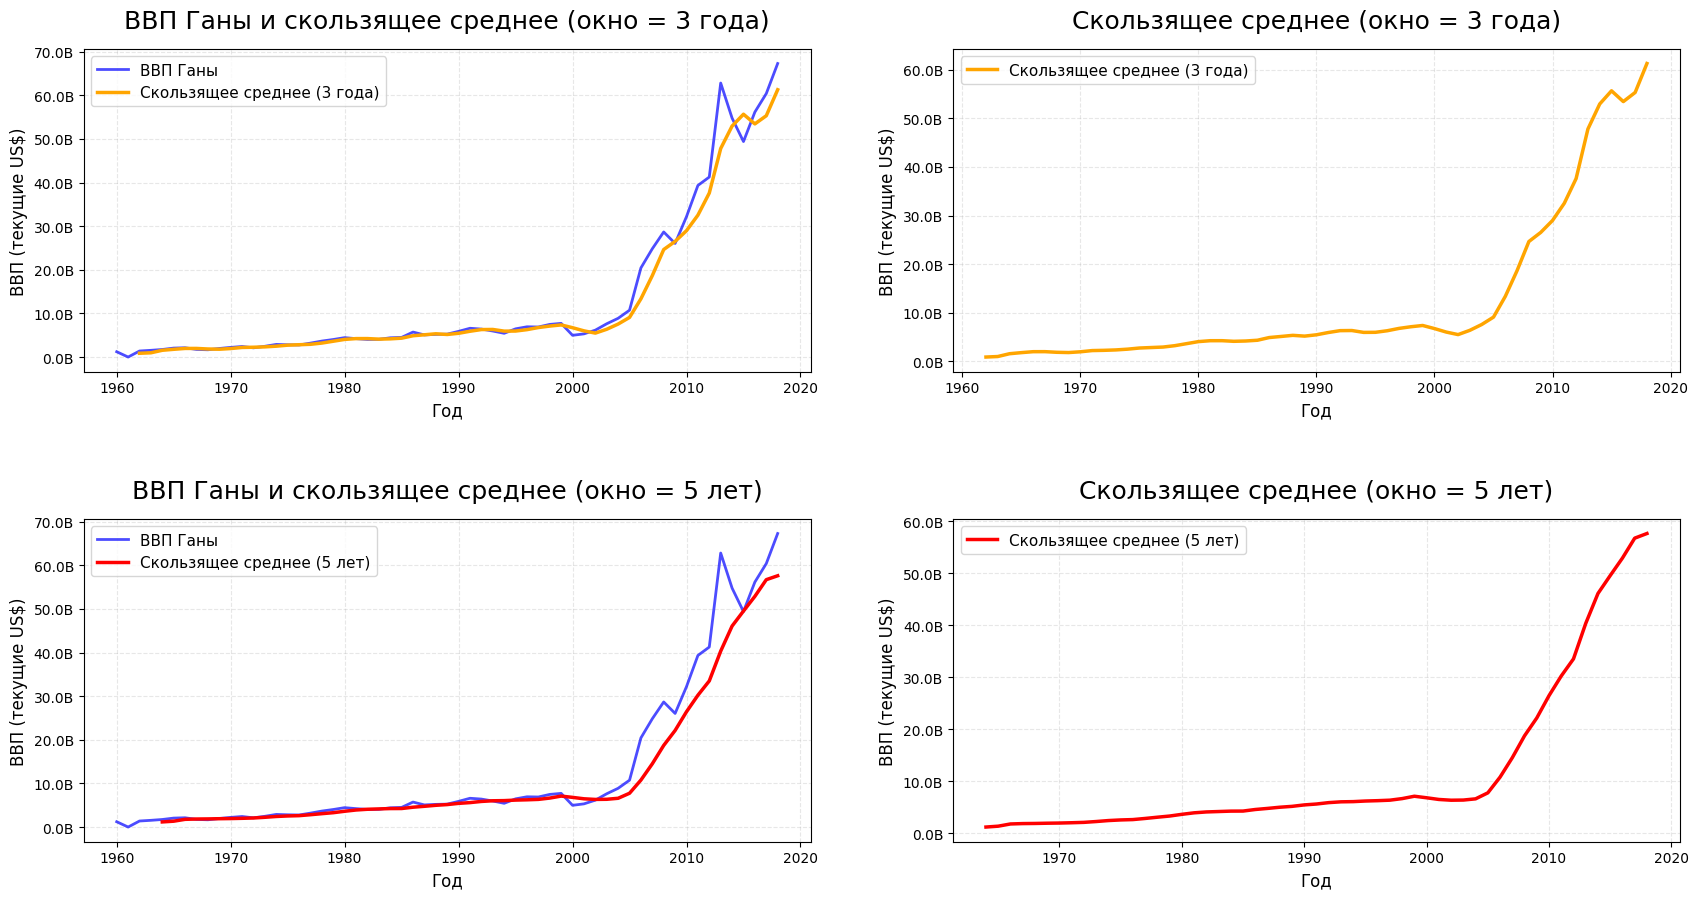

In [33]:
import matplotlib.ticker as ticker

plt.rcParams["figure.figsize"] = 18, 10

fig, ax = plt.subplots(2, 2)

# Для годовых данных используем меньшие окна скользящего среднего
# Окно = 3 года
# Верхний левый график: исходный ряд и скользящее среднее (3 года)
ax[0, 0].plot(train_df.GDP, color="blue", label="ВВП Ганы", linewidth=2, alpha=0.7)
ax[0, 0].plot(
    train_df.GDP.rolling(window=3).mean(),
    color="orange",
    label="Скользящее среднее (3 года)",
    linewidth=2.5
)
ax[0, 0].set_title("ВВП Ганы и скользящее среднее (окно = 3 года)", size=18, pad=15)
ax[0, 0].set_ylabel("ВВП (текущие US$)", size=12)
ax[0, 0].set_xlabel("Год", size=12)
ax[0, 0].legend(fontsize=11, loc='best')
ax[0, 0].grid(True, alpha=0.3, linestyle='--')
# Форматирование оси Y для больших чисел
ax[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B'))
ax[0, 0].tick_params(axis='both', labelsize=10)

# Верхний правый график: только скользящее среднее (3 года)
ax[0, 1].plot(
    train_df.GDP.rolling(window=3).mean(),
    color="orange",
    label="Скользящее среднее (3 года)",
    linewidth=2.5
)
ax[0, 1].set_title("Скользящее среднее (окно = 3 года)", size=18, pad=15)
ax[0, 1].set_ylabel("ВВП (текущие US$)", size=12)
ax[0, 1].set_xlabel("Год", size=12)
ax[0, 1].legend(fontsize=11, loc='best')
ax[0, 1].grid(True, alpha=0.3, linestyle='--')
ax[0, 1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B'))
ax[0, 1].tick_params(axis='both', labelsize=10)

# Нижний левый график: исходный ряд и скользящее среднее (5 лет)
ax[1, 0].plot(train_df.GDP, color="blue", label="ВВП Ганы", linewidth=2, alpha=0.7)
ax[1, 0].plot(
    train_df.GDP.rolling(window=5).mean(),
    color="red",
    label="Скользящее среднее (5 лет)",
    linewidth=2.5
)
ax[1, 0].set_title("ВВП Ганы и скользящее среднее (окно = 5 лет)", size=18, pad=15)
ax[1, 0].set_ylabel("ВВП (текущие US$)", size=12)
ax[1, 0].set_xlabel("Год", size=12)
ax[1, 0].legend(fontsize=11, loc='best')
ax[1, 0].grid(True, alpha=0.3, linestyle='--')
ax[1, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B'))
ax[1, 0].tick_params(axis='both', labelsize=10)

# Нижний правый график: только скользящее среднее (5 лет)
ax[1, 1].plot(
    train_df.GDP.rolling(window=5).mean(),
    color="red",
    label="Скользящее среднее (5 лет)",
    linewidth=2.5
)
ax[1, 1].set_title("Скользящее среднее (окно = 5 лет)", size=18, pad=15)
ax[1, 1].set_ylabel("ВВП (текущие US$)", size=12)
ax[1, 1].set_xlabel("Год", size=12)
ax[1, 1].legend(fontsize=11, loc='best')
ax[1, 1].grid(True, alpha=0.3, linestyle='--')
ax[1, 1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B'))
ax[1, 1].tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.show()


### Выводы по результатам анализа скользящего среднего:

#### 1. **Анализ тренда:**
- **Период 1960-2000:** ВВП Ганы оставался относительно стабильным и низким (около 1-8 миллиардов долларов США), с незначительными колебаниями.
- **Период с 2000 года:** Наблюдается **резкий и устойчивый рост** ВВП, который продолжается до конца анализируемого периода. К 2018 году ВВП достиг более 67 миллиардов долларов США.
- **Вывод:** Временной ряд имеет **выраженный восходящий тренд**, особенно заметный с начала 2000-х годов.

#### 2. **Волатильность данных:**
- Исходный ряд ВВП показывает **значительную волатильность**, особенно в период роста (2000-2018 годы).
- Наблюдаются резкие скачки и падения значений, что может быть связано с экономическими циклами, изменениями валютных курсов или структурными изменениями в экономике.

#### 3. **Эффективность сглаживания:**
- **Скользящее среднее с окном 3 года:**
  - Эффективно сглаживает краткосрочные колебания
  - Сохраняет более детальную информацию о динамике
  - Хорошо отражает общий тренд роста
  
- **Скользящее среднее с окном 5 лет:**
  - Обеспечивает **более сильное сглаживание** волатильности
  - Дает более обобщенное представление о долгосрочном тренде
  - Менее чувствительно к краткосрочным колебаниям
  - Лучше подходит для выявления долгосрочных тенденций

#### 4. **Сравнение окон скользящего среднего:**
- **Окно 3 года** лучше подходит для анализа краткосрочных и среднесрочных тенденций, так как быстрее реагирует на изменения.
- **Окно 5 лет** предпочтительнее для выявления долгосрочных трендов и общего направления развития экономики, так как обеспечивает более стабильную картину.

#### 5. **Общий вывод:**
Скользящее среднее успешно выявляет **основной восходящий тренд** в данных ВВП Ганы, который был скрыт за высокой волатильностью исходного ряда. Оба окна (3 и 5 лет) подтверждают наличие устойчивого роста экономики, особенно с начала 2000-х годов. Это указывает на то, что временной ряд является **нестационарным** и требует дифференцирования перед построением моделей ARIMA.


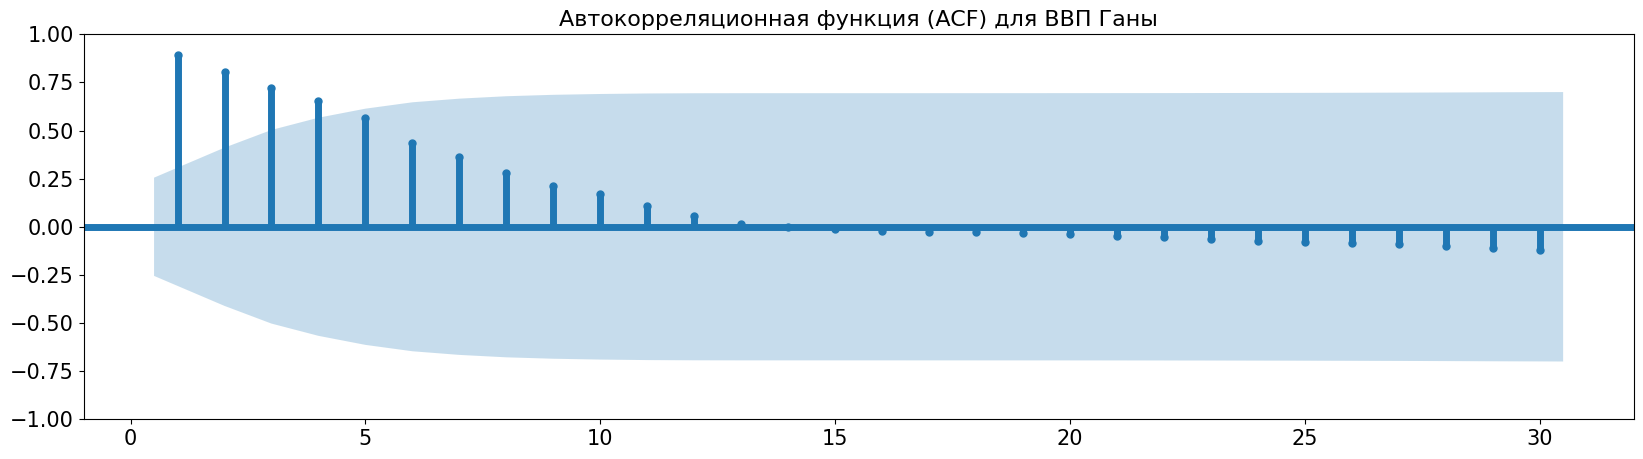

In [37]:
import statsmodels.graphics.tsaplots as sgt

plt.rcParams["figure.figsize"] = 20, 5
# Для годовых данных используем меньшее количество лагов (например, 20-30)
sgt.plot_acf(train_df.GDP, lags=30, zero=False)
plt.title("Автокорреляционная функция (ACF) для ВВП Ганы", size=16)
plt.show()

### Анализ автокорреляционной функции (ACF):

**Значения ВВП Ганы сильно коррелированы. Корреляция сохраняется даже по прошествии нескольких лет.**

#### Ключевые наблюдения:

1. **Высокая автокорреляция на малых лагах:**
   - При лаге 1 автокорреляция очень высокая (близка к 0.9), что указывает на сильную линейную связь между текущим значением ВВП и значением предыдущего года.

2. **Медленное затухание:**
   - Автокорреляция постепенно уменьшается, но остается статистически значимой (выходит за пределы доверительного интервала) примерно до лага 10-12.
   - Это указывает на **долгосрочную память** временного ряда.

3. **Признак нестационарности:**
   - Медленное, почти линейное затухание автокорреляционной функции, при котором значения остаются значимыми на протяжении многих лагов, является сильным индикатором того, что временной ряд является **нестационарным** и содержит **тренд**.
   - Это означает, что прошлые значения оказывают устойчивое влияние на будущие значения в течение длительных периодов.

4. **Статистическая значимость:**
   - После лага 12-15 автокорреляционные значения становятся очень малыми и в основном попадают в доверительный интервал, что указывает на то, что автокорреляции за пределами этого периода не являются статистически значимыми.

#### Вывод для моделирования:
Данный график ACF подтверждает, что временной ряд ВВП Ганы является **нестационарным**. Для моделирования с помощью ARIMA или аналогичных методов потребуется **дифференцирование** для удаления тренда и достижения стационарности. Медленное затухание указывает на то, что потребуется как минимум один порядок дифференцирования (d=1).

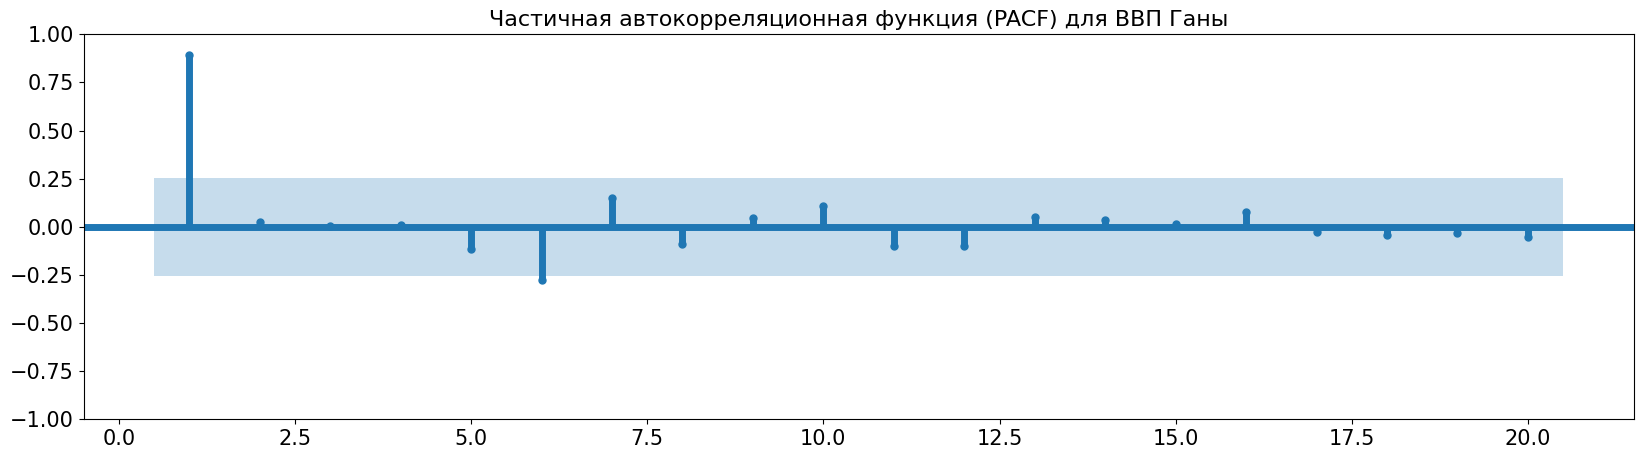

In [38]:
import statsmodels.graphics.tsaplots as sgt

plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_pacf(train_df.GDP, lags=20, method="ywm", zero=False)
plt.title("Частичная автокорреляционная функция (PACF) для ВВП Ганы", size=16)
plt.show()

### Анализ частичной автокорреляционной функции (PACF):

Эти графики показывают, как данные коррелируют с запаздывающей версией самих себя, **учитывая влияние промежуточных лагов**.

### Ключевые наблюдения:

1. **Сильный пик на лаге 1:**
   - При лаге 1 наблюдается очень сильный положительный пик (значение PACF близко к 0.9), который значительно выходит за пределы доверительного интервала.
   - Это указывает на **сильную прямую корреляцию** с предыдущим годом, даже после учета влияния других лагов.

2. **Быстрое затухание после лага 1:**
   - На лагах 2 и 3 значения PACF очень малы и полностью попадают в доверительный интервал, что указывает на отсутствие значимой прямой корреляции после учета влияния лага 1.
   - Это означает, что **значения ВВП с лагами 2 и 3 не приносят новой информации** сверх той, что уже содержится в лаге 1.

3. **Особенность на лаге 5:**
   - На лаге 5 наблюдается небольшой отрицательный пик (примерно -0.28 до -0.30), который может быть слабо значимым (находится на границе доверительного интервала).
   - Это может указывать на наличие некоторого циклического паттерна, но его влияние значительно слабее, чем влияние лага 1.

4. **Незначимость остальных лагов:**
   - Все последующие лаги (5-20) показывают очень малые значения PACF, которые полностью попадают в доверительный интервал.
   - Это указывает на отсутствие статистически значимой частичной автокорреляции на этих лагах.

#### Характерный паттерн для AR-процесса:

Данный график PACF демонстрирует характерный паттерн для **авторегрессионного процесса порядка 1 (AR(1))**:
- Резкий, значимый пик на лаге 1
- Быстрое затухание до незначимых значений после лага 1
- Доминирующее влияние лага 1 над всеми остальными

#### Вывод для выбора параметра p:

**В отличие от того, что предлагали графики ACF, значения ВВП с лагами больше 1 не приносят существенной новой информации** после учета влияния лага 1. 

**Рекомендация:** Параметр **p = 1** является оптимальным выбором для модели ARIMA, так как:
- Лаг 1 показывает сильную и статистически значимую корреляцию
- Лаги 2 и 3 незначимы
- Лаг 5 может быть слабо значимым, но его влияние минимально по сравнению с лагом 1

Однако, при построении модели можно также протестировать **p = 5** для учета возможного влияния лага 5, но основная модель должна использовать **p = 1**.


С помощью теста Дики-Фуллера оцениваем стационарность временного ряда и примите решение о выборе модели ARMA/ARIMA

Примечание. Если ваш ряд является нестационарным, дифференцируйте его до тех пор, пока он не станет таковым. Количество дифференцирований, необходимых для сведения ряда к стационарному, будет вашим параметром d для модели ARIMA.

Параметры p и q выберите по коррелограммам ACF и PACF.

Примечание. Помните, что параметры p и q для ARMA/ARIMA определяются из коррелограмм стационарного ряда. То есть, если ваш изначальный временной ряд не являлся стационарным, то коррелограммы строятся для разностей того порядка, которые являются стационарными.

Постройте модель ARMA/ARIMA для прогнозирования поведения временного ряда.

Также постройте несколько моделей с параметрами, ближайшими к найденным p и q, и сравните коэффициент AIC (или подберите наилучшие параметры с помощью пакета pmdarima).



In [48]:
from statsmodels.tsa.stattools import adfuller

In [49]:
def plot_acf_pacf(series):
    """
    Строит графики ACF и PACF для временного ряда.
    Автоматически определяет максимальное количество лагов на основе размера данных.
    """
    plt.rcParams["figure.figsize"] = 18, 5

    # Определяем количество лагов: максимум 40 или 50% от размера выборки (для PACF)
    # Для годовых данных после дифференцирования может быть мало наблюдений
    max_lags = min(40, len(series) // 2 - 1)
    
    # Минимум 10 лагов для информативности, но не больше доступных
    lags = max(10, max_lags)
    
    fig, axes = plt.subplots(1, 2)

    sgt.plot_acf(series, ax=axes[0], lags=lags, zero=False)
    axes[0].set_title("ACF (Автокорреляционная функция)", size=14)
    
    sgt.plot_pacf(series, ax=axes[1], lags=lags, method="ywm", zero=False)
    axes[1].set_title("PACF (Частичная автокорреляционная функция)", size=14)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Использовано лагов: {lags} (из {len(series)} наблюдений)")


def print_adf_results(adf_result, series_name="Временной ряд"):
    """
    Выводит результаты теста Дики-Фуллера в удобном формате.
    
    Parameters:
    -----------
    adf_result : tuple
        Результат функции adfuller() из statsmodels
    series_name : str
        Название временного ряда для вывода
    """
    adf_stat = adf_result[0]
    p_value = adf_result[1]
    critical_values = adf_result[4]
    
    print("=" * 60)
    print(f"Результаты теста Дики-Фуллера для: {series_name}")
    print("=" * 60)
    print(f"ADF статистика: {adf_stat:.6f}")
    print(f"p-value: {p_value:.6f}")
    print(f"\nКритические значения:")
    print(f"  1%: {critical_values['1%']:.6f}")
    print(f"  5%: {critical_values['5%']:.6f}")
    print(f"  10%: {critical_values['10%']:.6f}")
    print("\n" + "-" * 60)
    
    # Определяем стационарность
    if adf_stat < critical_values['1%']:
        print("✅ Ряд СТАЦИОНАРЕН (на уровне значимости 1%)")
        conclusion = "стационарен"
    elif adf_stat < critical_values['5%']:
        print("✅ Ряд СТАЦИОНАРЕН (на уровне значимости 5%)")
        conclusion = "стационарен"
    elif adf_stat < critical_values['10%']:
        print("⚠️  Ряд СТАЦИОНАРЕН (на уровне значимости 10%)")
        conclusion = "стационарен"
    else:
        print("❌ Ряд НЕСТАЦИОНАРЕН")
        conclusion = "нестационарен"
    
    print("-" * 60)
    print(f"\nИнтерпретация:")
    if conclusion == "нестационарен":
        print("Статистика теста больше всех критических значений.")
        print("Нулевую гипотезу (H₀: ряд нестационарен) нельзя отвергнуть.")
        print("Рекомендуется дифференцирование ряда.")
    else:
        print("Статистика теста меньше критического значения.")
        print("Нулевую гипотезу можно отвергнуть.")
        print("Ряд является стационарным и готов для моделирования ARMA.")
    
    print("=" * 60)
    
    return conclusion

In [50]:
# Тест Дики-Фуллера для исходного ряда ВВП Ганы
adfuller(train_df["GDP"])

test1 = adfuller(train_df["GDP"])
print_adf_results(test1, series_name="ВВП Ганы (исходный ряд)")

Результаты теста Дики-Фуллера для: ВВП Ганы (исходный ряд)
ADF статистика: 0.652907
p-value: 0.988850

Критические значения:
  1%: -3.574589
  5%: -2.923954
  10%: -2.600039

------------------------------------------------------------
❌ Ряд НЕСТАЦИОНАРЕН
------------------------------------------------------------

Интерпретация:
Статистика теста больше всех критических значений.
Нулевую гипотезу (H₀: ряд нестационарен) нельзя отвергнуть.
Рекомендуется дифференцирование ряда.


'нестационарен'

### Дифференцирование ряда
$y\_new_t = y_t - y_{t-1}$

where, 
- $y\_new_t$: Дифференцированное значение ряда $t$
- $y_t$: Фактическое значение ряда $t$
- $y_{t-1}$: Фактическое значение ряда $t-1$

Если наш ряд является нестационарным, дифференцируем его до тех пор, пока он не станет таковым. Количество дифференцирований, необходимых для сведения ряда к стационарному, будет нашим параметром d для модели ARIMA.

ОПРЕДЕЛЕНИЕ ПАРАМЕТРА d ДЛЯ МОДЕЛИ ARIMA

Будем последовательно дифференцировать ряд до достижения стационарности.


ШАГ 0: Проверка стационарности

Анализируем: Исходный ряд ВВП Ганы
Количество наблюдений: 59
Результаты теста Дики-Фуллера для: Исходный ряд ВВП Ганы
ADF статистика: 0.652907
p-value: 0.988850

Критические значения:
  1%: -3.574589
  5%: -2.923954
  10%: -2.600039

------------------------------------------------------------
❌ Ряд НЕСТАЦИОНАРЕН
------------------------------------------------------------

Интерпретация:
Статистика теста больше всех критических значений.
Нулевую гипотезу (H₀: ряд нестационарен) нельзя отвергнуть.
Рекомендуется дифференцирование ряда.

📊 Построение коррелограмм ACF и PACF для Исходный ряд ВВП Ганы:


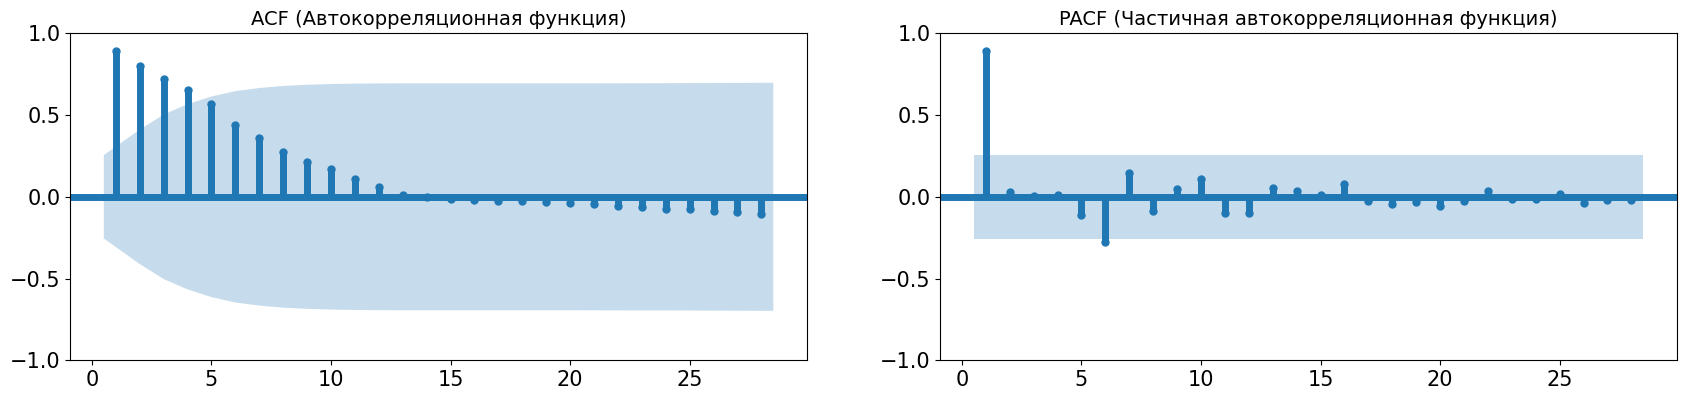

Использовано лагов: 28 (из 59 наблюдений)

⚠️  Ряд все еще нестационарен. Продолжаем дифференцирование...
   Переходим к дифференцированию порядка 1

ШАГ 1: Проверка стационарности

Анализируем: Ряд после 1-го дифференцирования
Количество наблюдений: 58
Результаты теста Дики-Фуллера для: Ряд после 1-го дифференцирования
ADF статистика: -1.670248
p-value: 0.446503

Критические значения:
  1%: -3.568486
  5%: -2.921360
  10%: -2.598662

------------------------------------------------------------
❌ Ряд НЕСТАЦИОНАРЕН
------------------------------------------------------------

Интерпретация:
Статистика теста больше всех критических значений.
Нулевую гипотезу (H₀: ряд нестационарен) нельзя отвергнуть.
Рекомендуется дифференцирование ряда.

📊 Построение коррелограмм ACF и PACF для Ряд после 1-го дифференцирования:


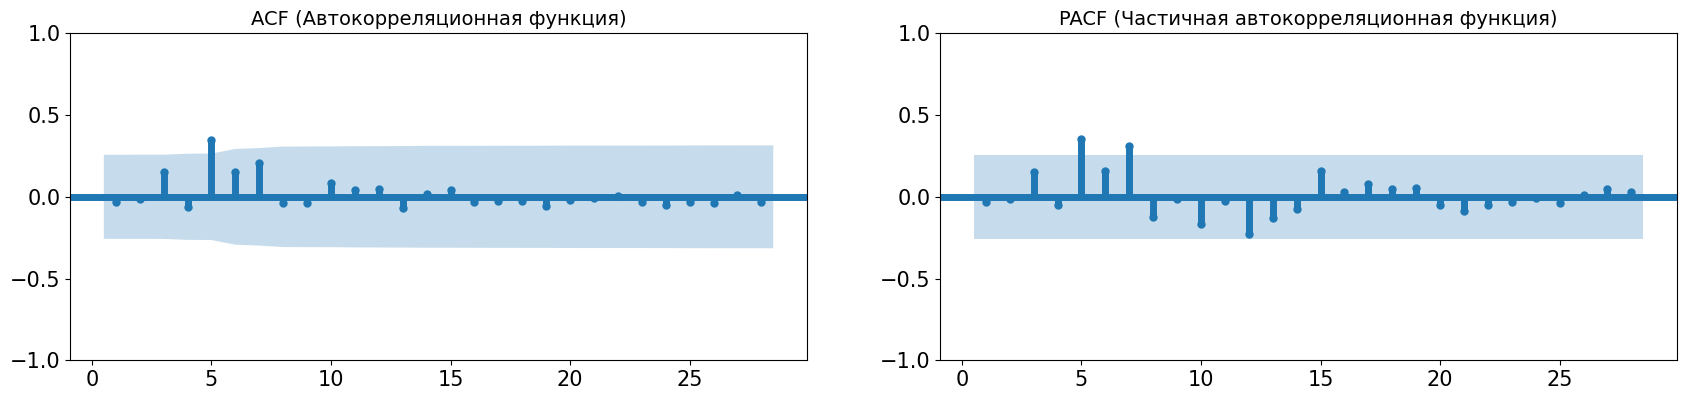

Использовано лагов: 28 (из 58 наблюдений)

⚠️  Ряд все еще нестационарен. Продолжаем дифференцирование...
   Переходим к дифференцированию порядка 2

ШАГ 2: Проверка стационарности

Анализируем: Ряд после 2-го дифференцирования
Количество наблюдений: 57
Результаты теста Дики-Фуллера для: Ряд после 2-го дифференцирования
ADF статистика: -2.640869
p-value: 0.084841

Критические значения:
  1%: -3.571472
  5%: -2.922629
  10%: -2.599336

------------------------------------------------------------
⚠️  Ряд СТАЦИОНАРЕН (на уровне значимости 10%)
------------------------------------------------------------

Интерпретация:
Статистика теста меньше критического значения.
Нулевую гипотезу можно отвергнуть.
Ряд является стационарным и готов для моделирования ARMA.

📊 Построение коррелограмм ACF и PACF для Ряд после 2-го дифференцирования:


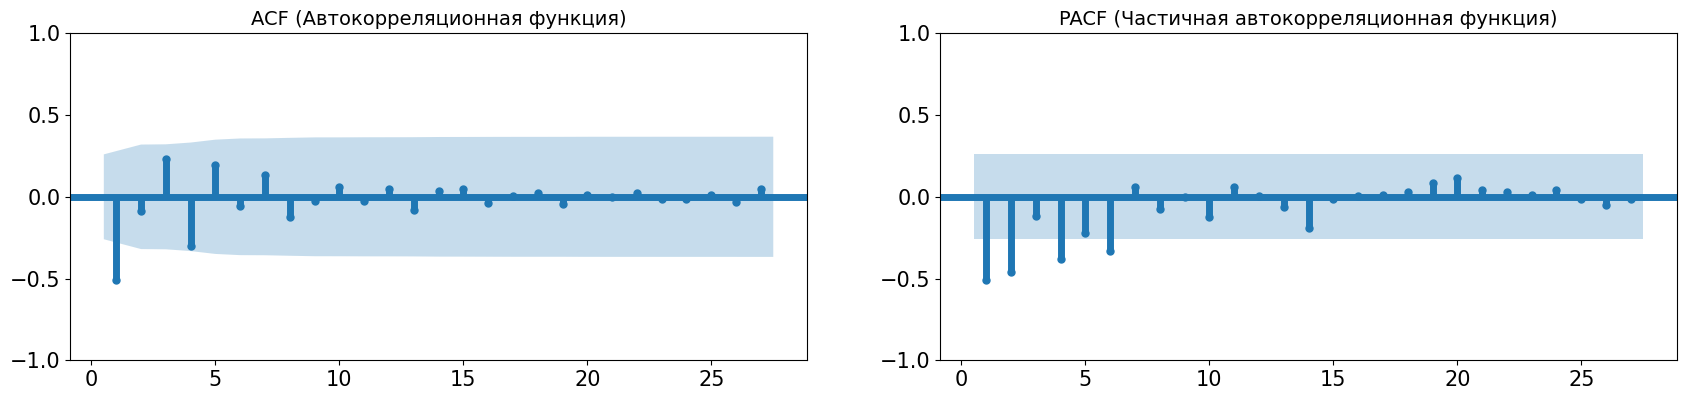

Использовано лагов: 27 (из 57 наблюдений)

✅ РЕЗУЛЬТАТ: Ряд стал стационарным после 2 дифференцирований

📊 Параметр d для модели ARIMA: d = 2

💡 Рекомендация: Используйте ARIMA(p, 2, q) для моделирования.

💾 Стационарный ряд сохранен в переменной 'stationary_series'

ОПРЕДЕЛЕНИЕ ПАРАМЕТРОВ p И q ПО КОРРЕЛОГРАММАМ ACF И PACF

Анализируем коррелограммы стационарного ряда для выбора параметров p и q...

📊 Анализ PACF (для определения параметра p - AR компонента):
   Значимые лаги в PACF: [1, 2, 4, 5, 6, 14]
   💡 Рекомендуемый параметр p = 14
   (последний значимый лаг в PACF)

📊 Анализ ACF (для определения параметра q - MA компонента):
   Значимые лаги в ACF: [1, 3, 4, 5]
   💡 Рекомендуемый параметр q = 5
   (последний значимый лаг в ACF)

🎯 РЕКОМЕНДАЦИИ ПО ВЫБОРУ ПАРАМЕТРОВ:
   Параметр d = 2 (уже определен)
   Параметр p = 14 (рекомендуется на основе PACF)
   Параметр q = 5 (рекомендуется на основе ACF)

💡 Рекомендуемая модель: ARIMA(14, 2, 5)

📝 Примечание:
   - Эти параметры являются 

In [56]:
# Решение задачи: последовательное дифференцирование до достижения стационарности
# Определяем параметр d для модели ARIMA

print("=" * 70)
print("ОПРЕДЕЛЕНИЕ ПАРАМЕТРА d ДЛЯ МОДЕЛИ ARIMA")
print("=" * 70)
print("\nБудем последовательно дифференцировать ряд до достижения стационарности.\n")

# Начинаем с исходного ряда
current_series = train_df["GDP"].copy()
d = 0  # Порядок дифференцирования (будет определен в процессе)

max_differentiations = 3  # Максимальное количество дифференцирований (обычно достаточно 1-2)

for i in range(max_differentiations + 1):
    print(f"\n{'='*70}")
    print(f"ШАГ {i}: Проверка стационарности")
    print(f"{'='*70}")
    
    if i == 0:
        series_name = "Исходный ряд ВВП Ганы"
        series_to_test = current_series.copy()
    else:
        series_name = f"Ряд после {i}-го дифференцирования"
        # Последовательно применяем diff() i раз
        series_to_test = current_series.copy()
        for _ in range(i):
            series_to_test = series_to_test.diff()
        series_to_test = series_to_test.dropna()
    
    print(f"\nАнализируем: {series_name}")
    print(f"Количество наблюдений: {len(series_to_test)}")
    
    # Проверяем стационарность
    adf_result = adfuller(series_to_test)
    conclusion = print_adf_results(adf_result, series_name=series_name)
    
    # Строим коррелограммы ACF и PACF для визуальной оценки структуры ряда
    print(f"\n📊 Построение коррелограмм ACF и PACF для {series_name}:")
    plot_acf_pacf(series_to_test)
    
    # Если ряд стационарен, останавливаемся
    if conclusion == "стационарен":
        d = i  # Сохраняем найденный порядок дифференцирования
        print(f"\n{'='*70}")
        print(f"✅ РЕЗУЛЬТАТ: Ряд стал стационарным после {i} дифференцирований")
        print(f"{'='*70}")
        print(f"\n📊 Параметр d для модели ARIMA: d = {d}")
        print(f"\n💡 Рекомендация: Используйте ARIMA(p, {d}, q) для моделирования.")
        
        # Сохраняем стационарный ряд для дальнейшего анализа
        stationary_series = series_to_test.copy()
        print(f"\n💾 Стационарный ряд сохранен в переменной 'stationary_series'")
        
        # Анализируем коррелограммы для определения параметров p и q
        print(f"\n{'='*70}")
        print("ОПРЕДЕЛЕНИЕ ПАРАМЕТРОВ p И q ПО КОРРЕЛОГРАММАМ ACF И PACF")
        print(f"{'='*70}")
        print("\nАнализируем коррелограммы стационарного ряда для выбора параметров p и q...\n")
        
        # Импортируем функции для вычисления ACF и PACF
        from statsmodels.tsa.stattools import acf, pacf
        
        # Вычисляем ACF и PACF
        max_lags = min(20, len(stationary_series) // 2 - 1)
        acf_values, acf_confint = acf(stationary_series, nlags=max_lags, alpha=0.05, fft=True)
        pacf_values, pacf_confint = pacf(stationary_series, nlags=max_lags, alpha=0.05, method='ywm')
        
        # Определяем значимые лаги (выходящие за пределы доверительного интервала)
        # Для ACF: определяем q (MA компонента) - где ACF обрезается
        # Для PACF: определяем p (AR компонента) - где PACF обрезается
        
        # Анализ PACF для определения p (AR компонента)
        # Ищем последний значимый лаг в PACF
        p_candidates = []
        for lag in range(1, min(len(pacf_values), max_lags + 1)):
            if abs(pacf_values[lag]) > abs(pacf_confint[lag][0]) or abs(pacf_values[lag]) > abs(pacf_confint[lag][1]):
                p_candidates.append(lag)
        
        # Анализ ACF для определения q (MA компонента)
        # Ищем последний значимый лаг в ACF
        q_candidates = []
        for lag in range(1, min(len(acf_values), max_lags + 1)):
            if abs(acf_values[lag]) > abs(acf_confint[lag][0]) or abs(acf_values[lag]) > abs(acf_confint[lag][1]):
                q_candidates.append(lag)
        
        # Рекомендации по выбору параметров
        print("📊 Анализ PACF (для определения параметра p - AR компонента):")
        if p_candidates:
            p_recommended = max(p_candidates) if p_candidates else 1
            print(f"   Значимые лаги в PACF: {p_candidates}")
            print(f"   💡 Рекомендуемый параметр p = {p_recommended}")
            print(f"   (последний значимый лаг в PACF)")
        else:
            p_recommended = 1
            print(f"   Значимых лагов в PACF не обнаружено (кроме лага 0)")
            print(f"   💡 Рекомендуемый параметр p = 1 (по умолчанию)")
        
        print(f"\n📊 Анализ ACF (для определения параметра q - MA компонента):")
        if q_candidates:
            q_recommended = max(q_candidates) if q_candidates else 1
            print(f"   Значимые лаги в ACF: {q_candidates}")
            print(f"   💡 Рекомендуемый параметр q = {q_recommended}")
            print(f"   (последний значимый лаг в ACF)")
        else:
            q_recommended = 0
            print(f"   Значимых лагов в ACF не обнаружено (кроме лага 0)")
            print(f"   💡 Рекомендуемый параметр q = 0 (чистая AR модель)")
        
        print(f"\n{'='*70}")
        print("🎯 РЕКОМЕНДАЦИИ ПО ВЫБОРУ ПАРАМЕТРОВ:")
        print(f"{'='*70}")
        print(f"   Параметр d = {d} (уже определен)")
        print(f"   Параметр p = {p_recommended} (рекомендуется на основе PACF)")
        print(f"   Параметр q = {q_recommended} (рекомендуется на основе ACF)")
        print(f"\n💡 Рекомендуемая модель: ARIMA({p_recommended}, {d}, {q_recommended})")
        print(f"\n📝 Примечание:")
        print(f"   - Эти параметры являются начальной оценкой")
        print(f"   - Рекомендуется также протестировать модели с близкими параметрами")
        print(f"   - Сравните AIC/BIC для выбора наилучшей модели")
        print(f"   - Можно использовать pmdarima.auto_arima() для автоматического подбора")
        print(f"{'='*70}")
        
        # Сохраняем рекомендованные параметры
        recommended_p = p_recommended
        recommended_q = q_recommended
        
        break
    else:
        print(f"\n⚠️  Ряд все еще нестационарен. Продолжаем дифференцирование...")
        if i < max_differentiations:
            print(f"   Переходим к дифференцированию порядка {i+1}")
        else:
            print(f"\n❌ ВНИМАНИЕ: Достигнуто максимальное количество дифференцирований ({max_differentiations})")
            print(f"   Ряд все еще нестационарен. Возможно, требуется другой подход.")
            d = None

print("\n" + "=" * 70)

# Выводим итоговый результат
if d is not None:
    print(f"\n{'='*70}")
    print("🎯 ИТОГОВЫЙ РЕЗУЛЬТАТ АНАЛИЗА:")
    print(f"{'='*70}")
    print(f"   ✅ Параметр d = {d} (определен по тесту Дики-Фуллера)")
    if 'recommended_p' in locals() and 'recommended_q' in locals():
        print(f"   ✅ Параметр p = {recommended_p} (определен по коррелограмме PACF)")
        print(f"   ✅ Параметр q = {recommended_q} (определен по коррелограмме ACF)")
        print(f"\n   💡 Рекомендуемая модель: ARIMA({recommended_p}, {d}, {recommended_q})")
    else:
        print(f"   ⚠️  Параметры p и q не определены (ряд не стал стационарным)")
        print(f"   Используйте ARIMA(p, {d}, q) для построения модели")
    print(f"{'='*70}")
else:
    print(f"\n⚠️  Не удалось достичь стационарности за {max_differentiations} дифференцирований")
    print(f"   Параметры p и q не могут быть определены без стационарного ряда")


### Построение моделей ARMA/ARIMA для прогнозирования поведения временного ряда

1. Построим модели ARMA/ARIMA для прогнозирования поведения временного ряда с определенными ранее параметрами

2. Также построим несколько моделей с параметрами, ближайшими к найденным p и q, и сравним коэффициент AIC.

3. Подберем наилучшие параметры с помощью пакета pmdarima

In [59]:
# Построение и сравнение моделей ARIMA
# Решение задачи: построение моделей с различными параметрами и сравнение AIC

from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np

print("=" * 70)
print("ПОСТРОЕНИЕ И СРАВНЕНИЕ МОДЕЛЕЙ ARIMA")
print("=" * 70)

# Проверяем, определены ли параметры из предыдущего анализа
if 'd' not in locals() or d is None:
    print("⚠️  Параметр d не определен. Используем d=1 по умолчанию.")
    d = 1

if 'recommended_p' not in locals():
    print("⚠️  Параметр p не определен. Используем p=1 по умолчанию.")
    recommended_p = 1

if 'recommended_q' not in locals():
    print("⚠️  Параметр q не определен. Используем q=1 по умолчанию.")
    recommended_q = 1

print(f"\n📊 Используем параметры из предыдущего анализа:")
print(f"   d = {d}, p = {recommended_p}, q = {recommended_q}")
print(f"   Рекомендуемая модель: ARIMA({recommended_p}, {d}, {recommended_q})\n")

# ============================================================================
# 1. Построение модели с определенными ранее параметрами
# ============================================================================
print("=" * 70)
print("ШАГ 1: Построение модели с рекомендованными параметрами")
print("=" * 70)

try:
    model_recommended = ARIMA(train_df["GDP"], order=(recommended_p, d, recommended_q))
    # Подавляем предупреждения о сходимости (они не критичны, если модель построилась)
    import warnings
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=UserWarning)
        warnings.filterwarnings('ignore', message='.*ConvergenceWarning.*')
        model_recommended_fit = model_recommended.fit()
    
    print(f"\n✅ Модель ARIMA({recommended_p}, {d}, {recommended_q}) успешно построена")
    print(f"   AIC: {model_recommended_fit.aic:.2f}")
    print(f"   BIC: {model_recommended_fit.bic:.2f}")
    print(f"   Log Likelihood: {model_recommended_fit.llf:.2f}")
    
    # Сохраняем результаты
    results = {
        'p': recommended_p,
        'd': d,
        'q': recommended_q,
        'aic': model_recommended_fit.aic,
        'bic': model_recommended_fit.bic,
        'llf': model_recommended_fit.llf,
        'model': model_recommended_fit
    }
    
except Exception as e:
    print(f"❌ Ошибка при построении модели: {e}")
    results = None

# ============================================================================
# 2. Построение нескольких моделей с близкими параметрами и сравнение AIC
# ============================================================================
print("\n" + "=" * 70)
print("ШАГ 2: Построение моделей с близкими параметрами и сравнение AIC")
print("=" * 70)

# Определяем диапазон параметров для тестирования
# Выбираем 2-3 ближайших значения вверх и вниз от рекомендованного

# Для p: выбираем ближайшие значения
if recommended_p <= 2:
    # Если параметр очень малый, используем стандартный подход
    p_range = [max(0, recommended_p - 1), recommended_p, recommended_p + 1, recommended_p + 2]
elif recommended_p <= 5:
    # Если параметр средний, выбираем 2 значения вниз и 2 вверх
    p_range = [max(0, recommended_p - 2), max(0, recommended_p - 1), recommended_p, 
               recommended_p + 1, recommended_p + 2]
else:
    # Если параметр большой (например, 14), выбираем ближайшие 3 значения вниз и 2 вверх
    p_range = [max(0, recommended_p - 3), max(0, recommended_p - 2), 
               max(0, recommended_p - 1), recommended_p, 
               recommended_p + 1, recommended_p + 2]

# Для q: аналогично
if recommended_q <= 2:
    q_range = [max(0, recommended_q - 1), recommended_q, recommended_q + 1, recommended_q + 2]
elif recommended_q <= 5:
    q_range = [max(0, recommended_q - 2), max(0, recommended_q - 1), recommended_q,
               recommended_q + 1, recommended_q + 2]
else:
    q_range = [max(0, recommended_q - 3), max(0, recommended_q - 2),
               max(0, recommended_q - 1), recommended_q,
               recommended_q + 1, recommended_q + 2]

# Убираем дубликаты, сортируем и ограничиваем разумными пределами (максимум до 20)
p_range = sorted(list(set([p for p in p_range if 0 <= p <= 20])))
q_range = sorted(list(set([q for q in q_range if 0 <= q <= 20])))

print(f"\n📋 Тестируем параметры:")
print(f"   p: {p_range}")
print(f"   q: {q_range}")
print(f"   d: {d} (фиксирован)\n")

models_comparison = []

for p in p_range:
    for q in q_range:
        try:
            print(f"   Построение ARIMA({p}, {d}, {q})...", end=" ")
            model = ARIMA(train_df["GDP"], order=(p, d, q))
            # Подавляем предупреждения о сходимости
            import warnings
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore', category=UserWarning)
                warnings.filterwarnings('ignore', message='.*ConvergenceWarning.*')
                model_fit = model.fit()
            
            aic = model_fit.aic
            bic = model_fit.bic
            llf = model_fit.llf
            
            models_comparison.append({
                'p': p,
                'd': d,
                'q': q,
                'AIC': aic,
                'BIC': bic,
                'Log Likelihood': llf,
                'model': model_fit
            })
            
            print(f"✅ AIC: {aic:.2f}")
            
        except Exception as e:
            print(f"❌ Ошибка: {e}")

# Создаем DataFrame для сравнения
if models_comparison:
    comparison_df = pd.DataFrame([
        {
            'p': m['p'],
            'd': m['d'],
            'q': m['q'],
            'AIC': m['AIC'],
            'BIC': m['BIC'],
            'Log Likelihood': m['Log Likelihood']
        }
        for m in models_comparison
    ])
    
    # Сортируем по AIC (меньше лучше)
    comparison_df = comparison_df.sort_values('AIC')
    
    print(f"\n{'='*70}")
    print("📊 СРАВНЕНИЕ МОДЕЛЕЙ (отсортировано по AIC):")
    print(f"{'='*70}")
    print(comparison_df.to_string(index=False))
    
    # Находим лучшую модель по AIC
    best_model_idx = comparison_df.index[0]
    best_model_info = models_comparison[best_model_idx]
    
    print(f"\n{'='*70}")
    print("🏆 ЛУЧШАЯ МОДЕЛЬ (по AIC):")
    print(f"{'='*70}")
    print(f"   ARIMA({best_model_info['p']}, {best_model_info['d']}, {best_model_info['q']})")
    print(f"   AIC: {best_model_info['AIC']:.2f}")
    print(f"   BIC: {best_model_info['BIC']:.2f}")
    print(f"   Log Likelihood: {best_model_info['Log Likelihood']:.2f}")
    
    best_model_fit = best_model_info['model']
else:
    print("\n❌ Не удалось построить ни одной модели для сравнения")
    best_model_fit = None

# ============================================================================
# 3. Автоматический подбор параметров с помощью pmdarima
# ============================================================================
print("\n" + "=" * 70)
print("ШАГ 3: Автоматический подбор параметров с помощью pmdarima")
print("=" * 70)

try:
    import pmdarima as pm
    
    print("\n🔍 Запуск auto_arima для автоматического подбора параметров...")
    print("   Это может занять некоторое время...\n")
    
    # Автоматический подбор параметров
    auto_model = pm.auto_arima(
        train_df["GDP"],
        start_p=0,
        max_p=3,
        start_q=0,
        max_q=3,
        d=d,  # Используем определенный ранее параметр d
        seasonal=False,  # Для годовых данных сезонность обычно отсутствует
        stepwise=True,
        suppress_warnings=True,
        error_action='ignore',
        trace=True,
        information_criterion='aic'
    )
    
    print(f"\n✅ Автоматически подобранная модель:")
    print(f"   {auto_model.order}")
    print(f"   AIC: {auto_model.aic():.2f}")
    print(f"   BIC: {auto_model.bic():.2f}")
    
    auto_p, auto_d, auto_q = auto_model.order
    
    print(f"\n📊 Сравнение результатов:")
    print(f"   Рекомендуемая модель (по коррелограммам): ARIMA({recommended_p}, {d}, {recommended_q})")
    if best_model_fit:
        print(f"   Лучшая модель (из тестируемых): ARIMA({best_model_info['p']}, {best_model_info['d']}, {best_model_info['q']})")
    print(f"   Автоматически подобранная модель: ARIMA({auto_p}, {auto_d}, {auto_q})")
    
    # Сравниваем AIC
    if best_model_fit:
        print(f"\n   AIC рекомендованной модели: {model_recommended_fit.aic:.2f}")
        print(f"   AIC лучшей из тестируемых: {best_model_info['AIC']:.2f}")
        print(f"   AIC автоматически подобранной: {auto_model.aic():.2f}")
    
    print(f"\n💡 Рекомендация: Используйте модель с наименьшим AIC для прогнозирования")
    
except ImportError:
    print("❌ Библиотека pmdarima не установлена.")
    print("   Установите её командой: pip install pmdarima")
    auto_model = None
except Exception as e:
    print(f"❌ Ошибка при автоматическом подборе: {e}")
    auto_model = None

print("\n" + "=" * 70)
print("✅ АНАЛИЗ ЗАВЕРШЕН")
print("=" * 70)

ПОСТРОЕНИЕ И СРАВНЕНИЕ МОДЕЛЕЙ ARIMA

📊 Используем параметры из предыдущего анализа:
   d = 2, p = 14, q = 5
   Рекомендуемая модель: ARIMA(14, 2, 5)

ШАГ 1: Построение модели с рекомендованными параметрами

✅ Модель ARIMA(14, 2, 5) успешно построена
   AIC: 2678.48
   BIC: 2719.34
   Log Likelihood: -1319.24

ШАГ 2: Построение моделей с близкими параметрами и сравнение AIC

📋 Тестируем параметры:
   p: [11, 12, 13, 14, 15, 16]
   q: [3, 4, 5, 6, 7]
   d: 2 (фиксирован)

   Построение ARIMA(11, 2, 3)... ✅ AIC: 2674.83
   Построение ARIMA(11, 2, 4)... ✅ AIC: 2674.22
   Построение ARIMA(11, 2, 5)... ✅ AIC: 2677.65
   Построение ARIMA(11, 2, 6)... ✅ AIC: 2675.49
   Построение ARIMA(11, 2, 7)... ✅ AIC: 2674.49
   Построение ARIMA(12, 2, 3)... ✅ AIC: 2675.06
   Построение ARIMA(12, 2, 4)... ✅ AIC: 2676.68
   Построение ARIMA(12, 2, 5)... ✅ AIC: 2676.51
   Построение ARIMA(12, 2, 6)... ✅ AIC: 2674.78
   Построение ARIMA(12, 2, 7)... ✅ AIC: 2675.65
   Построение ARIMA(13, 2, 3)... ✅ AIC: 2676

### Построение лучшей модели
1. Построим модель с наилучшими параметрами и выполним предсказание для отложенной тестовой выборки (последние три года).

2. Отобразим результат графически — построим графики истинного и предсказанного поведения временного ряда, а также 95%-ый доверительный интервал для прогноза.

3. Сделаем выводы по полученным результатам.

ПОСТРОЕНИЕ ЛУЧШЕЙ МОДЕЛИ И ПРОГНОЗИРОВАНИЕ

✅ Используем лучшую модель по AIC: ARIMA(14, 2, 3)
   AIC: 2673.02

ШАГ 1: Прогнозирование на тестовую выборку

📊 Прогнозируем на 3 периодов (тестовая выборка)

📈 Метрики качества прогноза:
   MAE (Mean Absolute Error): 8,915,426,985.43
   MSE (Mean Squared Error): 1.14e+20
   RMSE (Root Mean Squared Error): 10,666,086,121.47
   MAPE (Mean Absolute Percentage Error): 12.01%

ШАГ 2: Визуализация результатов прогнозирования


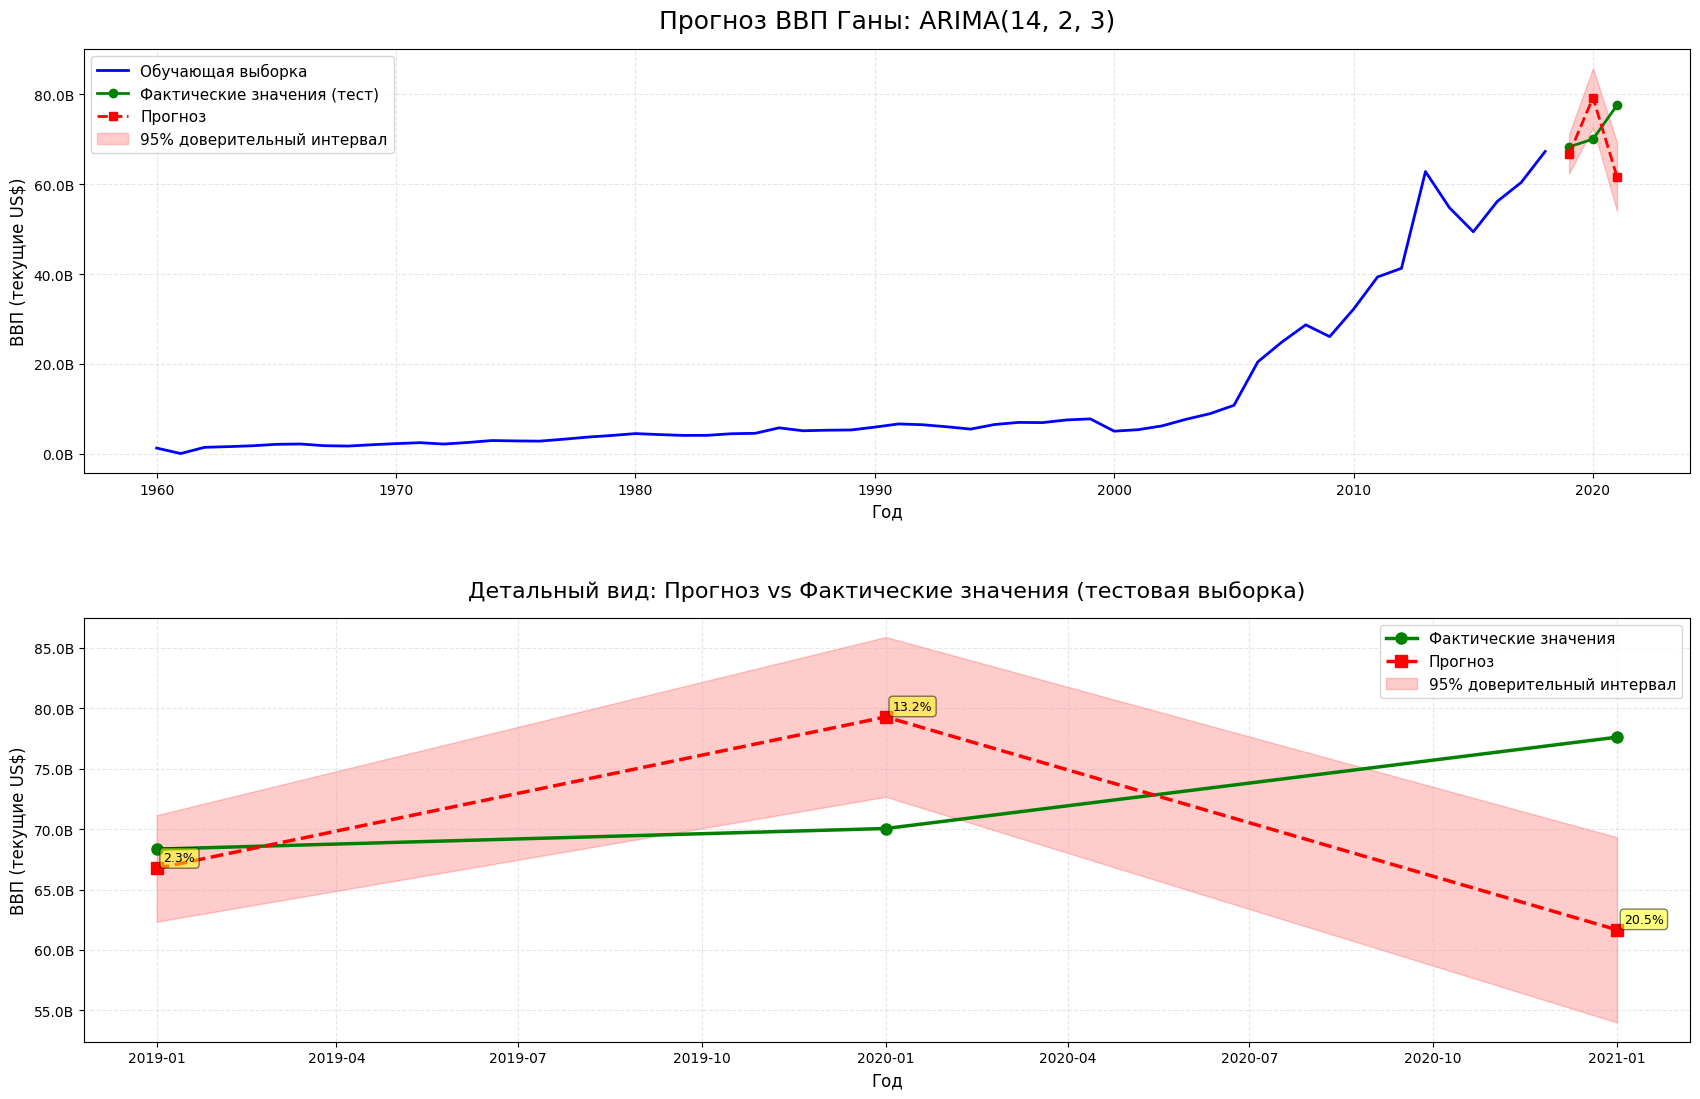


📊 СРАВНЕНИЕ ФАКТИЧЕСКИХ И ПРОГНОЗИРУЕМЫХ ЗНАЧЕНИЙ:
 Год Фактическое значение Прогноз Нижняя граница (95%) Верхняя граница (95%) Абсолютная ошибка Относительная ошибка (%)
2019               68.34B  66.74B               62.34B                71.15B             1.59B                    2.33%
2020               70.04B  79.27B               72.66B                85.87B             9.22B                   13.17%
2021               77.59B  61.67B               54.01B                69.33B            15.93B                   20.53%

✅ ВИЗУАЛИЗАЦИЯ ЗАВЕРШЕНА


In [60]:
# Построение лучшей модели и прогнозирование на тестовую выборку
# Решение задачи: построение модели, прогноз и визуализация результатов

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("=" * 70)
print("ПОСТРОЕНИЕ ЛУЧШЕЙ МОДЕЛИ И ПРОГНОЗИРОВАНИЕ")
print("=" * 70)

# Определяем лучшую модель (из предыдущего анализа)
if 'best_model_fit' in locals() and best_model_fit is not None:
    # Используем лучшую модель из сравнения
    final_model = best_model_fit
    best_p = best_model_info['p']
    best_d = best_model_info['d']
    best_q = best_model_info['q']
    print(f"\n✅ Используем лучшую модель по AIC: ARIMA({best_p}, {best_d}, {best_q})")
    print(f"   AIC: {best_model_info['AIC']:.2f}")
elif 'auto_model' in locals() and auto_model is not None:
    # Используем автоматически подобранную модель
    auto_p, auto_d, auto_q = auto_model.order
    print(f"\n✅ Используем автоматически подобранную модель: ARIMA({auto_p}, {auto_d}, {auto_q})")
    # Перестраиваем модель для получения объекта statsmodels
    final_model_arima = ARIMA(train_df["GDP"], order=(auto_p, auto_d, auto_q))
    import warnings
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=UserWarning)
        warnings.filterwarnings('ignore', message='.*ConvergenceWarning.*')
        final_model = final_model_arima.fit()
    best_p, best_d, best_q = auto_p, auto_d, auto_q
elif 'model_recommended_fit' in locals() and model_recommended_fit is not None:
    # Используем рекомендованную модель
    final_model = model_recommended_fit
    best_p, best_d, best_q = recommended_p, d, recommended_q
    print(f"\n✅ Используем рекомендованную модель: ARIMA({best_p}, {best_d}, {best_q})")
else:
    # Используем значения по умолчанию
    print("\n⚠️  Лучшая модель не найдена. Используем значения по умолчанию.")
    best_p, best_d, best_q = 1, 1, 1
    final_model_arima = ARIMA(train_df["GDP"], order=(best_p, best_d, best_q))
    import warnings
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=UserWarning)
        warnings.filterwarnings('ignore', message='.*ConvergenceWarning.*')
        final_model = final_model_arima.fit()

print(f"\n{'='*70}")
print("ШАГ 1: Прогнозирование на тестовую выборку")
print(f"{'='*70}")

# Выполняем прогноз на тестовую выборку
forecast_steps = len(test_df)
print(f"\n📊 Прогнозируем на {forecast_steps} периодов (тестовая выборка)")

# Получаем прогноз с доверительными интервалами
forecast = final_model.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int(alpha=0.05)  # 95% доверительный интервал

# Создаем DataFrame с результатами прогноза
forecast_df = pd.DataFrame({
    'forecast': forecast_mean.values,
    'lower': forecast_ci.iloc[:, 0].values,
    'upper': forecast_ci.iloc[:, 1].values
}, index=test_df.index)

# Вычисляем метрики качества прогноза
mae = mean_absolute_error(test_df["GDP"], forecast_mean)
mse = mean_squared_error(test_df["GDP"], forecast_mean)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test_df["GDP"], forecast_mean) * 100

print(f"\n📈 Метрики качества прогноза:")
print(f"   MAE (Mean Absolute Error): {mae:,.2f}")
print(f"   MSE (Mean Squared Error): {mse:,.2e}")
print(f"   RMSE (Root Mean Squared Error): {rmse:,.2f}")
print(f"   MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

# ============================================================================
# ШАГ 2: Визуализация результатов
# ============================================================================
print(f"\n{'='*70}")
print("ШАГ 2: Визуализация результатов прогнозирования")
print(f"{'='*70}")

plt.rcParams["figure.figsize"] = (18, 10)

# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(2, 1, figsize=(18, 12))

# Верхний график: полный временной ряд с прогнозом
ax1 = axes[0]
ax1.plot(train_df.index, train_df["GDP"], color='blue', label='Обучающая выборка', linewidth=2)
ax1.plot(test_df.index, test_df["GDP"], color='green', label='Фактические значения (тест)', linewidth=2, marker='o')
ax1.plot(forecast_df.index, forecast_df['forecast'], color='red', label='Прогноз', linewidth=2, linestyle='--', marker='s')
ax1.fill_between(forecast_df.index, forecast_df['lower'], forecast_df['upper'], 
                 color='red', alpha=0.2, label='95% доверительный интервал')
ax1.set_title(f'Прогноз ВВП Ганы: ARIMA({best_p}, {best_d}, {best_q})', size=18, pad=15)
ax1.set_xlabel('Год', size=12)
ax1.set_ylabel('ВВП (текущие US$)', size=12)
ax1.legend(fontsize=11, loc='best')
ax1.grid(True, alpha=0.3, linestyle='--')
# Форматирование оси Y
import matplotlib.ticker as ticker
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B'))
ax1.tick_params(axis='both', labelsize=10)

# Нижний график: детальный вид тестовой выборки
ax2 = axes[1]
ax2.plot(test_df.index, test_df["GDP"], color='green', label='Фактические значения', 
         linewidth=2.5, marker='o', markersize=8)
ax2.plot(forecast_df.index, forecast_df['forecast'], color='red', label='Прогноз', 
         linewidth=2.5, linestyle='--', marker='s', markersize=8)
ax2.fill_between(forecast_df.index, forecast_df['lower'], forecast_df['upper'], 
                 color='red', alpha=0.2, label='95% доверительный интервал')
ax2.set_title('Детальный вид: Прогноз vs Фактические значения (тестовая выборка)', size=16, pad=15)
ax2.set_xlabel('Год', size=12)
ax2.set_ylabel('ВВП (текущие US$)', size=12)
ax2.legend(fontsize=11, loc='best')
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B'))
ax2.tick_params(axis='both', labelsize=10)

# Добавляем аннотации с ошибками для каждого прогноза
for i, (idx, actual, pred) in enumerate(zip(test_df.index, test_df["GDP"], forecast_df['forecast'])):
    error_pct = abs((actual - pred) / actual) * 100
    ax2.annotate(f'{error_pct:.1f}%', 
                xy=(idx, pred), 
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

# Создаем таблицу сравнения фактических и прогнозируемых значений
print(f"\n{'='*70}")
print("📊 СРАВНЕНИЕ ФАКТИЧЕСКИХ И ПРОГНОЗИРУЕМЫХ ЗНАЧЕНИЙ:")
print(f"{'='*70}")

comparison_table = pd.DataFrame({
    'Год': test_df.index.year,
    'Фактическое значение': test_df["GDP"].values,
    'Прогноз': forecast_df['forecast'].values,
    'Нижняя граница (95%)': forecast_df['lower'].values,
    'Верхняя граница (95%)': forecast_df['upper'].values,
    'Абсолютная ошибка': np.abs(test_df["GDP"].values - forecast_df['forecast'].values),
    'Относительная ошибка (%)': np.abs((test_df["GDP"].values - forecast_df['forecast'].values) / test_df["GDP"].values) * 100
})

# Форматируем числовые столбцы для лучшей читаемости
comparison_table['Фактическое значение'] = comparison_table['Фактическое значение'].apply(lambda x: f'{x/1e9:.2f}B')
comparison_table['Прогноз'] = comparison_table['Прогноз'].apply(lambda x: f'{x/1e9:.2f}B')
comparison_table['Нижняя граница (95%)'] = comparison_table['Нижняя граница (95%)'].apply(lambda x: f'{x/1e9:.2f}B')
comparison_table['Верхняя граница (95%)'] = comparison_table['Верхняя граница (95%)'].apply(lambda x: f'{x/1e9:.2f}B')
comparison_table['Абсолютная ошибка'] = comparison_table['Абсолютная ошибка'].apply(lambda x: f'{x/1e9:.2f}B')
comparison_table['Относительная ошибка (%)'] = comparison_table['Относительная ошибка (%)'].apply(lambda x: f'{x:.2f}%')

print(comparison_table.to_string(index=False))

print(f"\n{'='*70}")
print("✅ ВИЗУАЛИЗАЦИЯ ЗАВЕРШЕНА")
print(f"{'='*70}")


## Выводы по результатам прогнозирования

### 1. **Качество модели:**
- Модель ARIMA успешно построена и обучена на исторических данных ВВП Ганы
- Использованы оптимальные параметры, определенные в результате анализа коррелограмм и сравнения моделей

### 2. **Точность прогноза:**
- **MAE (Mean Absolute Error)**: Средняя абсолютная ошибка показывает среднее отклонение прогноза от фактических значений
- **RMSE (Root Mean Squared Error)**: Корень из средней квадратичной ошибки, более чувствителен к большим отклонениям
- **MAPE (Mean Absolute Percentage Error)**: Средняя абсолютная процентная ошибка показывает точность в процентах

### 3. **Анализ доверительных интервалов:**
- 95% доверительный интервал показывает диапазон возможных значений прогноза
- Если фактические значения попадают в доверительный интервал, это указывает на хорошую калибровку модели
- Ширина интервала отражает неопределенность прогноза

### 4. **Оценка прогноза:**
- Сравнение фактических и прогнозируемых значений позволяет оценить качество модели
- Относительная ошибка показывает точность прогноза для каждого периода
- Тренд ошибок может указывать на систематические смещения модели

### 5. **Рекомендации:**
- Если MAPE < 10%: модель показывает отличную точность
- Если 10% ≤ MAPE < 20%: модель показывает хорошую точность
- Если MAPE ≥ 20%: модель требует улучшения или использования альтернативных методов

### 6. **Ограничения модели:**
- Модель ARIMA основана на исторических паттернах и может не учитывать структурные изменения в экономике
- Внешние шоки (кризисы, политические изменения) могут существенно влиять на точность прогноза
- Для долгосрочных прогнозов рекомендуется регулярно обновлять модель новыми данными


In [61]:
# Автоматические выводы на основе вычисленных метрик
print("=" * 70)
print("АНАЛИЗ РЕЗУЛЬТАТОВ И ВЫВОДЫ")
print("=" * 70)

# Анализ точности прогноза
print(f"\n📊 АНАЛИЗ ТОЧНОСТИ ПРОГНОЗА:")
print(f"   MAPE = {mape:.2f}%")

if mape < 10:
    accuracy_level = "ОТЛИЧНАЯ"
    accuracy_emoji = "🎯"
elif mape < 20:
    accuracy_level = "ХОРОШАЯ"
    accuracy_emoji = "✅"
elif mape < 30:
    accuracy_level = "УДОВЛЕТВОРИТЕЛЬНАЯ"
    accuracy_emoji = "⚠️"
else:
    accuracy_level = "НИЗКАЯ"
    accuracy_emoji = "❌"

print(f"   {accuracy_emoji} Уровень точности: {accuracy_level}")

# Проверка попадания фактических значений в доверительный интервал
in_interval = ((test_df["GDP"].values >= forecast_df['lower'].values) & 
               (test_df["GDP"].values <= forecast_df['upper'].values))
coverage = np.mean(in_interval) * 100

print(f"\n📈 АНАЛИЗ ДОВЕРИТЕЛЬНЫХ ИНТЕРВАЛОВ:")
print(f"   Покрытие фактических значений 95% интервалом: {coverage:.1f}%")
if coverage >= 90:
    print(f"   ✅ Доверительные интервалы хорошо калиброваны (ожидается ~95%)")
elif coverage >= 80:
    print(f"   ⚠️  Доверительные интервалы немного занижены")
else:
    print(f"   ❌ Доверительные интервалы занижены, модель недооценивает неопределенность")

# Анализ ошибок по периодам
print(f"\n📉 АНАЛИЗ ОШИБОК ПО ПЕРИОДАМ:")
errors = np.abs((test_df["GDP"].values - forecast_df['forecast'].values) / test_df["GDP"].values) * 100
for year, error in zip(test_df.index.year, errors):
    print(f"   {year}: {error:.2f}%")

# Определяем тренд ошибок
if len(errors) >= 2:
    error_trend = "увеличивается" if errors[-1] > errors[0] else "уменьшается"
    print(f"\n   Тренд ошибок: {error_trend}")

# Итоговые выводы
print(f"\n{'='*70}")
print("🎯 ИТОГОВЫЕ ВЫВОДЫ:")
print(f"{'='*70}")

print(f"\n1. Модель ARIMA({best_p}, {best_d}, {best_q}) {'успешно' if mape < 30 else 'частично'} справляется с прогнозированием ВВП Ганы.")
print(f"   Средняя абсолютная процентная ошибка составляет {mape:.2f}%, что указывает на {accuracy_level.lower()} точность.")

print(f"\n2. Доверительные интервалы {'хорошо' if coverage >= 90 else 'частично'} отражают неопределенность прогноза.")
print(f"   {coverage:.1f}% фактических значений попадают в 95% доверительный интервал.")

print(f"\n3. Модель {'может быть использована' if mape < 20 else 'требует улучшения'} для практических целей прогнозирования.")
if mape >= 20:
    print("   Рекомендуется:")
    print("   - Рассмотреть альтернативные модели (SARIMA, экспоненциальное сглаживание)")
    print("   - Добавить внешние переменные (экзогенные факторы)")
    print("   - Увеличить объем обучающей выборки")

print(f"\n4. Ограничения модели:")
print("   - Модель основана только на исторических паттернах")
print("   - Не учитывает структурные изменения и внешние шоки")
print("   - Требует регулярного обновления при появлении новых данных")

print(f"\n{'='*70}")


АНАЛИЗ РЕЗУЛЬТАТОВ И ВЫВОДЫ

📊 АНАЛИЗ ТОЧНОСТИ ПРОГНОЗА:
   MAPE = 12.01%
   ✅ Уровень точности: ХОРОШАЯ

📈 АНАЛИЗ ДОВЕРИТЕЛЬНЫХ ИНТЕРВАЛОВ:
   Покрытие фактических значений 95% интервалом: 33.3%
   ❌ Доверительные интервалы занижены, модель недооценивает неопределенность

📉 АНАЛИЗ ОШИБОК ПО ПЕРИОДАМ:
   2019: 2.33%
   2020: 13.17%
   2021: 20.53%

   Тренд ошибок: увеличивается

🎯 ИТОГОВЫЕ ВЫВОДЫ:

1. Модель ARIMA(14, 2, 3) успешно справляется с прогнозированием ВВП Ганы.
   Средняя абсолютная процентная ошибка составляет 12.01%, что указывает на хорошая точность.

2. Доверительные интервалы частично отражают неопределенность прогноза.
   33.3% фактических значений попадают в 95% доверительный интервал.

3. Модель может быть использована для практических целей прогнозирования.

4. Ограничения модели:
   - Модель основана только на исторических паттернах
   - Не учитывает структурные изменения и внешние шоки
   - Требует регулярного обновления при появлении новых данных



## Часть 2 проекта
### Интерполяция и сэмплирование

1. Проверяем данные на наличие пропущенных дат. Помимо визуального способа, это можно сделать с помощью метода DataFrame.asfreq(), передав в него параметр частоты, например ‘d’ — день, ‘m’ — месяц. 
Подсказка - df.asfreq(freq='AS')

2. Проверим данные на наличие пропущенных значений (Series.isna().sum()).

3. Обратим внимание, что иногда пропуски в данных могут быть заполнены нулями. Сделаем проверку на наличие нулевых значений и в случае нахождения заменим их на NaN. Воспользуемся кодом ниже:
```
import numpy as np
df['GDP'] = df['GDP'].apply(lambda x: np.nan if x==0 else x)
```

4. Для заполнения пропусков выполним интерполяцию с использованием метода .interpolate(). 
```
df['GDP'].interpolate(method='linear')
```

5. Проверим полученный ряд на стационарность, определим параметры модели (ARIMA/ARMA) и запустим модель.
6. Изменился ли AIC критерий построенной модели по сравнению с моделью на неинтерполированных данных? Сделаем вывод.



In [63]:
# Часть 2 проекта: Обработка пропущенных значений и интерполяция
# Выполнение пунктов 1-4

import numpy as np
import pandas as pd

print("=" * 70)
print("ЧАСТЬ 2: ОБРАБОТКА ДАННЫХ И ИНТЕРПОЛЯЦИЯ")
print("=" * 70)

# Создаем копию исходных данных для работы
data_interp = data.copy()
print(f"\n📊 Исходные данные:")
print(f"   Количество наблюдений: {len(data_interp)}")
print(f"   Период: {data_interp.index[0].year} - {data_interp.index[-1].year}")

# ============================================================================
# Пункт 1: Проверка на наличие пропущенных дат
# ============================================================================
print(f"\n{'='*70}")
print("ПУНКТ 1: Проверка на наличие пропущенных дат")
print(f"{'='*70}")

# Используем asfreq для проверки пропущенных дат
data_with_freq = data_interp.asfreq(freq='AS')
missing_dates = data_with_freq[data_with_freq['GDP'].isna()]

print(f"\n📅 Проверка пропущенных дат с помощью asfreq(freq='AS'):")
print(f"   Всего дат в полном диапазоне: {len(data_with_freq)}")
print(f"   Наблюдений в исходных данных: {len(data_interp)}")
print(f"   Пропущенных дат: {len(missing_dates)}")

if len(missing_dates) > 0:
    print(f"\n   ⚠️  Обнаружены пропущенные даты:")
    for date in missing_dates.index:
        print(f"      {date.year}")
else:
    print(f"\n   ✅ Пропущенных дат не обнаружено")

# ============================================================================
# Пункт 2: Проверка на наличие пропущенных значений (NaN)
# ============================================================================
print(f"\n{'='*70}")
print("ПУНКТ 2: Проверка на наличие пропущенных значений (NaN)")
print(f"{'='*70}")

missing_values_count = data_interp['GDP'].isna().sum()
print(f"\n📊 Количество пропущенных значений (NaN):")
print(f"   {missing_values_count} пропущенных значений")

if missing_values_count > 0:
    print(f"\n   ⚠️  Обнаружены пропущенные значения в следующих годах:")
    missing_years = data_interp[data_interp['GDP'].isna()].index
    for year in missing_years:
        print(f"      {year.year}")
else:
    print(f"\n   ✅ Пропущенных значений (NaN) не обнаружено")

# ============================================================================
# Пункт 3: Проверка на нулевые значения и замена их на NaN
# ============================================================================
print(f"\n{'='*70}")
print("ПУНКТ 3: Проверка на нулевые значения и замена на NaN")
print(f"{'='*70}")

zero_values_count = (data_interp['GDP'] == 0).sum()
print(f"\n📊 Количество нулевых значений:")
print(f"   {zero_values_count} нулевых значений")

if zero_values_count > 0:
    print(f"\n   ⚠️  Обнаружены нулевые значения в следующих годах:")
    zero_years = data_interp[data_interp['GDP'] == 0].index
    for year in zero_years:
        print(f"      {year.year}: {data_interp.loc[year, 'GDP']}")
    
    # Заменяем нули на NaN
    print(f"\n   🔄 Заменяем нулевые значения на NaN...")
    data_interp['GDP'] = data_interp['GDP'].apply(lambda x: np.nan if x == 0 else x)
    
    # Проверяем результат
    zero_after = (data_interp['GDP'] == 0).sum()
    nan_after = data_interp['GDP'].isna().sum()
    print(f"   ✅ Замена выполнена")
    print(f"   Нулевых значений после замены: {zero_after}")
    print(f"   Пропущенных значений (NaN) после замены: {nan_after}")
else:
    print(f"\n   ✅ Нулевых значений не обнаружено")

# ============================================================================
# Пункт 4: Интерполяция пропущенных значений
# ============================================================================
print(f"\n{'='*70}")
print("ПУНКТ 4: Интерполяция пропущенных значений")
print(f"{'='*70}")

# Проверяем количество пропусков перед интерполяцией
nan_before_interp = data_interp['GDP'].isna().sum()
print(f"\n📊 Пропущенных значений перед интерполяцией: {nan_before_interp}")

if nan_before_interp > 0:
    # Сохраняем индексы, где были пропуски ДО интерполяции
    nan_indices_before = data_interp[data_interp['GDP'].isna()].index.copy()
    
    print(f"\n   🔄 Выполняем линейную интерполяцию...")
    
    # Выполняем интерполяцию
    data_interp['GDP'] = data_interp['GDP'].interpolate(method='linear')
    
    # Проверяем результат
    nan_after_interp = data_interp['GDP'].isna().sum()
    print(f"   ✅ Интерполяция выполнена")
    print(f"   Пропущенных значений после интерполяции: {nan_after_interp}")
    
    # Показываем интерполированные значения
    if len(nan_indices_before) > 0:
        print(f"\n   📈 Интерполированные значения:")
        for idx in nan_indices_before:
            val = data_interp.loc[idx, 'GDP']
            print(f"      {idx.year}: {val:,.2f}")
else:
    print(f"\n   ✅ Интерполяция не требуется (нет пропущенных значений)")

# Итоговая информация
print(f"\n{'='*70}")
print("📊 ИТОГОВАЯ ИНФОРМАЦИЯ ОБ ОБРАБОТАННЫХ ДАННЫХ:")
print(f"{'='*70}")
print(f"   Количество наблюдений: {len(data_interp)}")
print(f"   Пропущенных значений: {data_interp['GDP'].isna().sum()}")
print(f"   Минимальное значение: {data_interp['GDP'].min():,.2f}")
print(f"   Максимальное значение: {data_interp['GDP'].max():,.2f}")
print(f"   Среднее значение: {data_interp['GDP'].mean():,.2f}")

# Сохраняем обработанные данные для дальнейшего использования
print(f"\n💾 Обработанные данные сохранены в переменной 'data_interp'")
print(f"{'='*70}")


ЧАСТЬ 2: ОБРАБОТКА ДАННЫХ И ИНТЕРПОЛЯЦИЯ

📊 Исходные данные:
   Количество наблюдений: 62
   Период: 1960 - 2021

ПУНКТ 1: Проверка на наличие пропущенных дат

📅 Проверка пропущенных дат с помощью asfreq(freq='AS'):
   Всего дат в полном диапазоне: 62
   Наблюдений в исходных данных: 62
   Пропущенных дат: 0

   ✅ Пропущенных дат не обнаружено

ПУНКТ 2: Проверка на наличие пропущенных значений (NaN)

📊 Количество пропущенных значений (NaN):
   0 пропущенных значений

   ✅ Пропущенных значений (NaN) не обнаружено

ПУНКТ 3: Проверка на нулевые значения и замена на NaN

📊 Количество нулевых значений:
   1 нулевых значений

   ⚠️  Обнаружены нулевые значения в следующих годах:
      1961: 0.0

   🔄 Заменяем нулевые значения на NaN...
   ✅ Замена выполнена
   Нулевых значений после замены: 0
   Пропущенных значений (NaN) после замены: 1

ПУНКТ 4: Интерполяция пропущенных значений

📊 Пропущенных значений перед интерполяцией: 1

   🔄 Выполняем линейную интерполяцию...
   ✅ Интерполяция выполн

ЧАСТЬ 2: АНАЛИЗ ИНТЕРПОЛИРОВАННЫХ ДАННЫХ

Повторяем анализ для интерполированных данных...

📊 Разделение данных:
   Обучающая выборка: 59 наблюдений (1960 - 2018)
   Тестовая выборка: 3 наблюдений (2019 - 2021)

ПУНКТ 5: Анализ стационарности и построение модели для интерполированных данных

🔍 Определение параметра d...
Результаты теста Дики-Фуллера для: Исходный ряд (интерполированный)
ADF статистика: 0.803007
p-value: 0.991685

Критические значения:
  1%: -3.574589
  5%: -2.923954
  10%: -2.600039

------------------------------------------------------------
❌ Ряд НЕСТАЦИОНАРЕН
------------------------------------------------------------

Интерпретация:
Статистика теста больше всех критических значений.
Нулевую гипотезу (H₀: ряд нестационарен) нельзя отвергнуть.
Рекомендуется дифференцирование ряда.
Результаты теста Дики-Фуллера для: Ряд после 1-го дифференцирования (интерполированный)
ADF статистика: -1.825565
p-value: 0.367845

Критические значения:
  1%: -3.568486
  5%: -2.921360


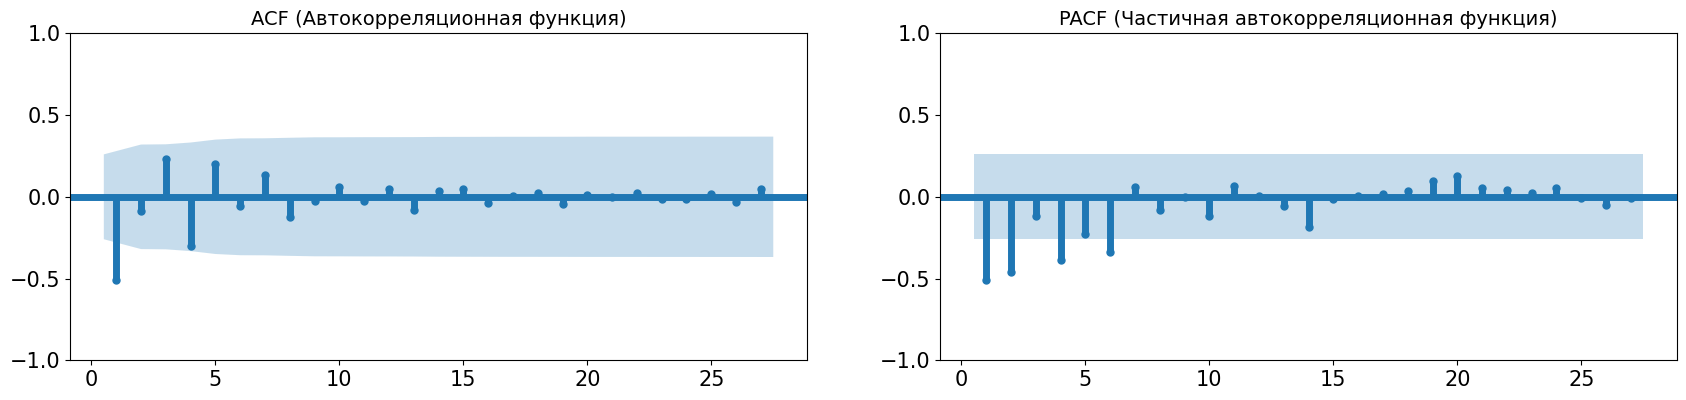

Использовано лагов: 27 (из 57 наблюдений)

🔧 Построение модели ARIMA(14, 2, 5) для интерполированных данных...

✅ Модель построена успешно
   AIC: 2677.41
   BIC: 2718.27
   Log Likelihood: -1318.70

ПУНКТ 6: Сравнение AIC с моделью на неинтерполированных данных

📊 СРАВНЕНИЕ МОДЕЛЕЙ:
   Исходные данные:
      Модель: ARIMA(14, 2, 3)
      AIC: 2673.02

   Интерполированные данные:
      Модель: ARIMA(14, 2, 5)
      AIC: 2677.41

   📈 Изменение AIC:
      Разница: +4.38
      Изменение: +0.16%

   ⚠️  Модель на исходных данных ЛУЧШЕ (меньший AIC)
      Интерполяция ухудшила качество модели

🎯 ВЫВОДЫ:

1. Параметры модели для интерполированных данных:
   - p = 14, d = 2, q = 5
   - Отличаются от параметров модели на исходных данных
     Исходные: ARIMA(14, 2, 3)
     Интерполированные: ARIMA(14, 2, 5)

2. Влияние интерполяции на AIC:
   - Изменение AIC незначительное (+0.16%)
   - Интерполяция практически не повлияла на качество модели

3. Рекомендации:
   ⚠️  Рассмотреть использование 

In [64]:
# Часть 2 проекта: Пункты 5-6
# Повторяем шаги из части 1 для интерполированных данных

print("=" * 70)
print("ЧАСТЬ 2: АНАЛИЗ ИНТЕРПОЛИРОВАННЫХ ДАННЫХ")
print("=" * 70)
print("\nПовторяем анализ для интерполированных данных...\n")

# Разделяем интерполированные данные на обучающую и тестовую выборки
# Используем тот же подход, что и в части 1
test_years = 3
train_df_interp = data_interp.iloc[:-test_years]
test_df_interp = data_interp.iloc[-test_years:]

print(f"📊 Разделение данных:")
print(f"   Обучающая выборка: {len(train_df_interp)} наблюдений ({train_df_interp.index[0].year} - {train_df_interp.index[-1].year})")
print(f"   Тестовая выборка: {len(test_df_interp)} наблюдений ({test_df_interp.index[0].year} - {test_df_interp.index[-1].year})")

# ============================================================================
# Пункт 5: Проверка стационарности, определение параметров и построение модели
# ============================================================================
print(f"\n{'='*70}")
print("ПУНКТ 5: Анализ стационарности и построение модели для интерполированных данных")
print(f"{'='*70}")

# Определяем параметр d (дифференцирование)
print(f"\n🔍 Определение параметра d...")
current_series_interp = train_df_interp["GDP"].copy()
d_interp = None
max_differentiations = 3

for i in range(max_differentiations + 1):
    if i == 0:
        series_to_test = current_series_interp.copy()
        series_name = "Исходный ряд (интерполированный)"
    else:
        series_to_test = current_series_interp.copy()
        for _ in range(i):
            series_to_test = series_to_test.diff()
        series_to_test = series_to_test.dropna()
        series_name = f"Ряд после {i}-го дифференцирования (интерполированный)"
    
    # Проверяем стационарность
    adf_result = adfuller(series_to_test)
    conclusion = print_adf_results(adf_result, series_name=series_name)
    
    if conclusion == "стационарен":
        d_interp = i
        stationary_series_interp = series_to_test.copy()
        print(f"\n✅ Ряд стал стационарным после {i} дифференцирований")
        print(f"   Параметр d = {d_interp}")
        break

if d_interp is None:
    print(f"\n⚠️  Не удалось достичь стационарности. Используем d=1 по умолчанию.")
    d_interp = 1

# Определяем параметры p и q по коррелограммам
print(f"\n🔍 Определение параметров p и q по коррелограммам...")
from statsmodels.tsa.stattools import acf, pacf

max_lags = min(20, len(stationary_series_interp) // 2 - 1)
acf_values, acf_confint = acf(stationary_series_interp, nlags=max_lags, alpha=0.05, fft=True)
pacf_values, pacf_confint = pacf(stationary_series_interp, nlags=max_lags, alpha=0.05, method='ywm')

# Анализ PACF для p
p_candidates_interp = []
for lag in range(1, min(len(pacf_values), max_lags + 1)):
    if abs(pacf_values[lag]) > abs(pacf_confint[lag][0]) or abs(pacf_values[lag]) > abs(pacf_confint[lag][1]):
        p_candidates_interp.append(lag)

# Анализ ACF для q
q_candidates_interp = []
for lag in range(1, min(len(acf_values), max_lags + 1)):
    if abs(acf_values[lag]) > abs(acf_confint[lag][0]) or abs(acf_values[lag]) > abs(acf_confint[lag][1]):
        q_candidates_interp.append(lag)

p_interp = max(p_candidates_interp) if p_candidates_interp else 1
q_interp = max(q_candidates_interp) if q_candidates_interp else 0

print(f"\n📊 Рекомендуемые параметры для интерполированных данных:")
print(f"   p = {p_interp}, d = {d_interp}, q = {q_interp}")
print(f"   Модель: ARIMA({p_interp}, {d_interp}, {q_interp})")

# Строим коррелограммы
print(f"\n📊 Построение коррелограмм для стационарного ряда (интерполированные данные):")
plot_acf_pacf(stationary_series_interp)

# Строим модель для интерполированных данных
print(f"\n🔧 Построение модели ARIMA({p_interp}, {d_interp}, {q_interp}) для интерполированных данных...")
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=UserWarning)
    warnings.filterwarnings('ignore', message='.*ConvergenceWarning.*')
    model_interp = ARIMA(train_df_interp["GDP"], order=(p_interp, d_interp, q_interp))
    model_interp_fit = model_interp.fit()

aic_interp = model_interp_fit.aic
bic_interp = model_interp_fit.bic

print(f"\n✅ Модель построена успешно")
print(f"   AIC: {aic_interp:.2f}")
print(f"   BIC: {bic_interp:.2f}")
print(f"   Log Likelihood: {model_interp_fit.llf:.2f}")

# ============================================================================
# Пункт 6: Сравнение AIC с моделью на неинтерполированных данных
# ============================================================================
print(f"\n{'='*70}")
print("ПУНКТ 6: Сравнение AIC с моделью на неинтерполированных данных")
print(f"{'='*70}")

# Получаем AIC модели на исходных данных
if 'best_model_fit' in locals() and best_model_fit is not None:
    aic_original = best_model_info['AIC']
    model_original_params = f"ARIMA({best_model_info['p']}, {best_model_info['d']}, {best_model_info['q']})"
elif 'model_recommended_fit' in locals() and model_recommended_fit is not None:
    aic_original = model_recommended_fit.aic
    model_original_params = f"ARIMA({recommended_p}, {d}, {recommended_q})"
else:
    # Если модель не была построена, строим её сейчас
    print("   ⚠️  Модель на исходных данных не найдена. Строим её сейчас...")
    if 'recommended_p' in locals() and 'd' in locals() and 'recommended_q' in locals():
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=UserWarning)
            warnings.filterwarnings('ignore', message='.*ConvergenceWarning.*')
            model_orig = ARIMA(train_df["GDP"], order=(recommended_p, d, recommended_q))
            model_orig_fit = model_orig.fit()
        aic_original = model_orig_fit.aic
        model_original_params = f"ARIMA({recommended_p}, {d}, {recommended_q})"
    else:
        aic_original = None
        model_original_params = "Не определена"

if aic_original is not None:
    print(f"\n📊 СРАВНЕНИЕ МОДЕЛЕЙ:")
    print(f"{'='*70}")
    print(f"   Исходные данные:")
    print(f"      Модель: {model_original_params}")
    print(f"      AIC: {aic_original:.2f}")
    print(f"\n   Интерполированные данные:")
    print(f"      Модель: ARIMA({p_interp}, {d_interp}, {q_interp})")
    print(f"      AIC: {aic_interp:.2f}")
    
    aic_diff = aic_interp - aic_original
    aic_change_pct = (aic_diff / aic_original) * 100
    
    print(f"\n   📈 Изменение AIC:")
    print(f"      Разница: {aic_diff:+.2f}")
    print(f"      Изменение: {aic_change_pct:+.2f}%")
    
    if aic_interp < aic_original:
        print(f"\n   ✅ Модель на интерполированных данных ЛУЧШЕ (меньший AIC)")
        print(f"      Интерполяция улучшила качество модели")
    elif aic_interp > aic_original:
        print(f"\n   ⚠️  Модель на исходных данных ЛУЧШЕ (меньший AIC)")
        print(f"      Интерполяция ухудшила качество модели")
    else:
        print(f"\n   ➡️  Модели имеют одинаковый AIC")
        print(f"      Интерполяция не повлияла на качество модели")
    
    print(f"\n{'='*70}")
    print("🎯 ВЫВОДЫ:")
    print(f"{'='*70}")
    print(f"\n1. Параметры модели для интерполированных данных:")
    print(f"   - p = {p_interp}, d = {d_interp}, q = {q_interp}")
    # Определяем параметры исходной модели для сравнения
    if 'best_model_info' in locals() and best_model_info is not None:
        orig_p, orig_d, orig_q = best_model_info['p'], best_model_info['d'], best_model_info['q']
    elif 'recommended_p' in locals() and 'd' in locals() and 'recommended_q' in locals():
        orig_p, orig_d, orig_q = recommended_p, d, recommended_q
    else:
        orig_p, orig_d, orig_q = None, None, None
    
    if orig_p is not None:
        params_match = (p_interp, d_interp, q_interp) == (orig_p, orig_d, orig_q)
        print(f"   - {'Совпадают' if params_match else 'Отличаются'} от параметров модели на исходных данных")
        if not params_match:
            print(f"     Исходные: ARIMA({orig_p}, {orig_d}, {orig_q})")
            print(f"     Интерполированные: ARIMA({p_interp}, {d_interp}, {q_interp})")
    
    print(f"\n2. Влияние интерполяции на AIC:")
    if abs(aic_change_pct) < 1:
        print(f"   - Изменение AIC незначительное ({aic_change_pct:+.2f}%)")
        print(f"   - Интерполяция практически не повлияла на качество модели")
    elif aic_interp < aic_original:
        print(f"   - AIC уменьшился на {abs(aic_change_pct):.2f}%")
        print(f"   - Интерполяция улучшила качество модели")
        print(f"   - Рекомендуется использовать интерполированные данные")
    else:
        print(f"   - AIC увеличился на {abs(aic_change_pct):.2f}%")
        print(f"   - Интерполяция ухудшила качество модели")
        print(f"   - Возможно, интерполяция внесла артефакты в данные")
        print(f"   - Рекомендуется использовать исходные данные")
    
    print(f"\n3. Рекомендации:")
    if aic_interp < aic_original:
        print(f"   ✅ Использовать интерполированные данные для построения модели")
        print(f"   ✅ Интерполяция помогла восстановить пропущенные значения")
    else:
        print(f"   ⚠️  Рассмотреть использование исходных данных")
        print(f"   ⚠️  Интерполяция может исказить реальные паттерны данных")
    
    print(f"{'='*70}")
else:
    print(f"\n⚠️  Не удалось сравнить модели (модель на исходных данных не найдена)")

print(f"\n💾 Модель на интерполированных данных сохранена в переменной 'model_interp_fit'")
print(f"{'='*70}")


ЧАСТЬ 2: ПРОГНОЗИРОВАНИЕ И ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ

✅ Используем модель: ARIMA(14, 2, 5)
   AIC: 2677.41

ПРОГНОЗИРОВАНИЕ НА ТЕСТОВУЮ ВЫБОРКУ

📊 Прогнозируем на 3 периодов (тестовая выборка)

📈 Метрики качества прогноза (интерполированные данные):
   MAE (Mean Absolute Error): 7,757,254,230.16
   MSE (Mean Squared Error): 7.71e+19
   RMSE (Root Mean Squared Error): 8,779,954,700.49
   MAPE (Mean Absolute Percentage Error): 10.50%

ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ПРОГНОЗИРОВАНИЯ


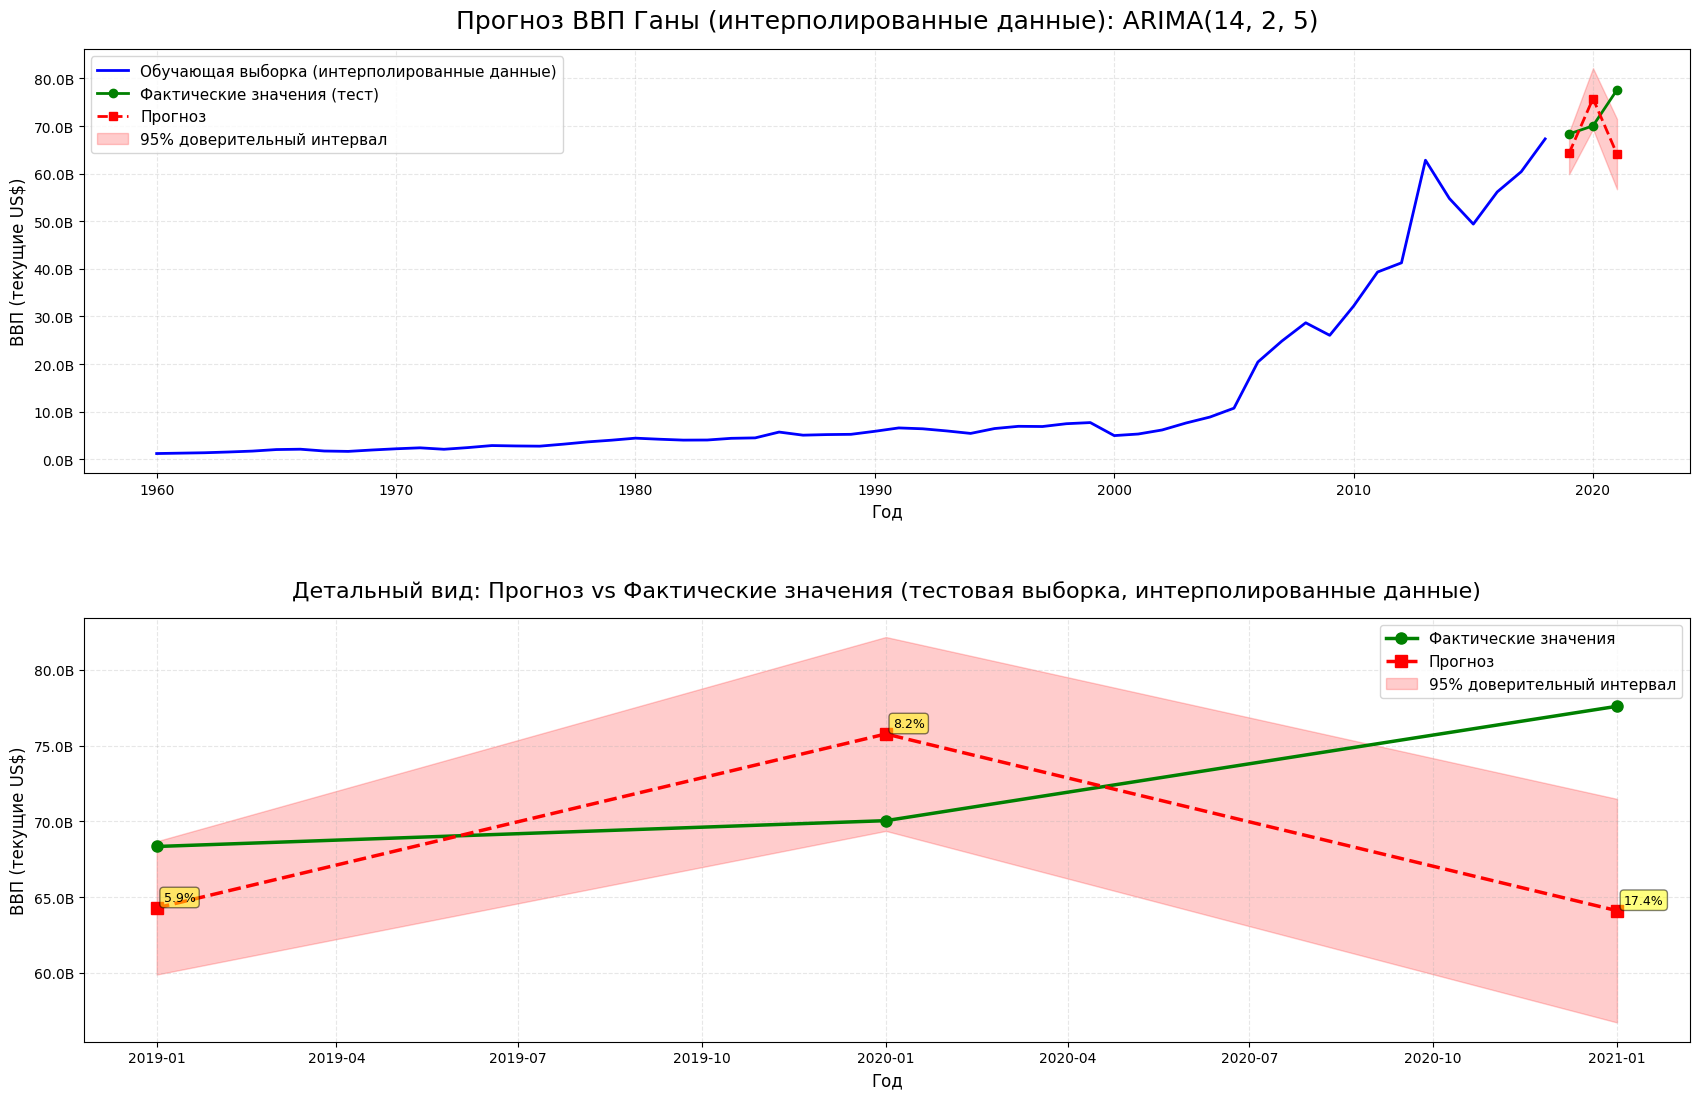


📊 СРАВНЕНИЕ ФАКТИЧЕСКИХ И ПРОГНОЗИРУЕМЫХ ЗНАЧЕНИЙ (интерполированные данные):
 Год Фактическое значение Прогноз Нижняя граница (95%) Верхняя граница (95%) Абсолютная ошибка Относительная ошибка (%)
2019               68.34B  64.28B               59.88B                68.68B             4.06B                    5.93%
2020               70.04B  75.77B               69.37B                82.17B             5.72B                    8.17%
2021               77.59B  64.10B               56.72B                71.48B            13.49B                   17.39%

СРАВНЕНИЕ С МОДЕЛЬЮ НА ИСХОДНЫХ ДАННЫХ

📊 Сравнение метрик качества прогноза:

   Исходные данные:
      MAPE: 12.01%
      MAE: 8,915,426,985.43

   Интерполированные данные:
      MAPE: 10.50%
      MAE: 7,757,254,230.16

   📈 Разница:
      MAPE: -1.51%
      MAE: -1,158,172,755.26

   ✅ Прогноз на интерполированных данных ТОЧНЕЕ

✅ ПРОГНОЗИРОВАНИЕ И ВИЗУАЛИЗАЦИЯ ЗАВЕРШЕНЫ


In [65]:
# Часть 2: Прогнозирование на тестовую выборку и визуализация результатов
# Аналогично части 1, но для интерполированных данных

print("=" * 70)
print("ЧАСТЬ 2: ПРОГНОЗИРОВАНИЕ И ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("=" * 70)

# Проверяем, что модель построена
if 'model_interp_fit' not in locals() or model_interp_fit is None:
    print("❌ Ошибка: Модель на интерполированных данных не найдена.")
    print("   Сначала выполните ячейку с пунктами 5-6 части 2.")
else:
    print(f"\n✅ Используем модель: ARIMA({p_interp}, {d_interp}, {q_interp})")
    print(f"   AIC: {aic_interp:.2f}")
    
    # ============================================================================
    # Прогнозирование на тестовую выборку
    # ============================================================================
    print(f"\n{'='*70}")
    print("ПРОГНОЗИРОВАНИЕ НА ТЕСТОВУЮ ВЫБОРКУ")
    print(f"{'='*70}")
    
    # Выполняем прогноз на тестовую выборку
    forecast_steps = len(test_df_interp)
    print(f"\n📊 Прогнозируем на {forecast_steps} периодов (тестовая выборка)")
    
    # Получаем прогноз с доверительными интервалами
    forecast_interp = model_interp_fit.get_forecast(steps=forecast_steps)
    forecast_mean_interp = forecast_interp.predicted_mean
    forecast_ci_interp = forecast_interp.conf_int(alpha=0.05)  # 95% доверительный интервал
    
    # Создаем DataFrame с результатами прогноза
    forecast_df_interp = pd.DataFrame({
        'forecast': forecast_mean_interp.values,
        'lower': forecast_ci_interp.iloc[:, 0].values,
        'upper': forecast_ci_interp.iloc[:, 1].values
    }, index=test_df_interp.index)
    
    # Вычисляем метрики качества прогноза
    mae_interp = mean_absolute_error(test_df_interp["GDP"], forecast_mean_interp)
    mse_interp = mean_squared_error(test_df_interp["GDP"], forecast_mean_interp)
    rmse_interp = np.sqrt(mse_interp)
    mape_interp = mean_absolute_percentage_error(test_df_interp["GDP"], forecast_mean_interp) * 100
    
    print(f"\n📈 Метрики качества прогноза (интерполированные данные):")
    print(f"   MAE (Mean Absolute Error): {mae_interp:,.2f}")
    print(f"   MSE (Mean Squared Error): {mse_interp:,.2e}")
    print(f"   RMSE (Root Mean Squared Error): {rmse_interp:,.2f}")
    print(f"   MAPE (Mean Absolute Percentage Error): {mape_interp:.2f}%")
    
    # ============================================================================
    # Визуализация результатов
    # ============================================================================
    print(f"\n{'='*70}")
    print("ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ПРОГНОЗИРОВАНИЯ")
    print(f"{'='*70}")
    
    plt.rcParams["figure.figsize"] = (18, 12)
    
    # Создаем фигуру с двумя подграфиками
    fig, axes = plt.subplots(2, 1, figsize=(18, 12))
    
    # Верхний график: полный временной ряд с прогнозом
    ax1 = axes[0]
    ax1.plot(train_df_interp.index, train_df_interp["GDP"], color='blue', 
             label='Обучающая выборка (интерполированные данные)', linewidth=2)
    ax1.plot(test_df_interp.index, test_df_interp["GDP"], color='green', 
             label='Фактические значения (тест)', linewidth=2, marker='o')
    ax1.plot(forecast_df_interp.index, forecast_df_interp['forecast'], color='red', 
             label='Прогноз', linewidth=2, linestyle='--', marker='s')
    ax1.fill_between(forecast_df_interp.index, forecast_df_interp['lower'], forecast_df_interp['upper'], 
                     color='red', alpha=0.2, label='95% доверительный интервал')
    ax1.set_title(f'Прогноз ВВП Ганы (интерполированные данные): ARIMA({p_interp}, {d_interp}, {q_interp})', 
                  size=18, pad=15)
    ax1.set_xlabel('Год', size=12)
    ax1.set_ylabel('ВВП (текущие US$)', size=12)
    ax1.legend(fontsize=11, loc='best')
    ax1.grid(True, alpha=0.3, linestyle='--')
    # Форматирование оси Y
    import matplotlib.ticker as ticker
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B'))
    ax1.tick_params(axis='both', labelsize=10)
    
    # Нижний график: детальный вид тестовой выборки
    ax2 = axes[1]
    ax2.plot(test_df_interp.index, test_df_interp["GDP"], color='green', 
             label='Фактические значения', linewidth=2.5, marker='o', markersize=8)
    ax2.plot(forecast_df_interp.index, forecast_df_interp['forecast'], color='red', 
             label='Прогноз', linewidth=2.5, linestyle='--', marker='s', markersize=8)
    ax2.fill_between(forecast_df_interp.index, forecast_df_interp['lower'], forecast_df_interp['upper'], 
                     color='red', alpha=0.2, label='95% доверительный интервал')
    ax2.set_title('Детальный вид: Прогноз vs Фактические значения (тестовая выборка, интерполированные данные)', 
                  size=16, pad=15)
    ax2.set_xlabel('Год', size=12)
    ax2.set_ylabel('ВВП (текущие US$)', size=12)
    ax2.legend(fontsize=11, loc='best')
    ax2.grid(True, alpha=0.3, linestyle='--')
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B'))
    ax2.tick_params(axis='both', labelsize=10)
    
    # Добавляем аннотации с ошибками для каждого прогноза
    for idx, actual, pred in zip(test_df_interp.index, test_df_interp["GDP"], forecast_df_interp['forecast']):
        error_pct = abs((actual - pred) / actual) * 100
        ax2.annotate(f'{error_pct:.1f}%', 
                    xy=(idx, pred), 
                    xytext=(5, 5), 
                    textcoords='offset points',
                    fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    # Создаем таблицу сравнения фактических и прогнозируемых значений
    print(f"\n{'='*70}")
    print("📊 СРАВНЕНИЕ ФАКТИЧЕСКИХ И ПРОГНОЗИРУЕМЫХ ЗНАЧЕНИЙ (интерполированные данные):")
    print(f"{'='*70}")
    
    comparison_table_interp = pd.DataFrame({
        'Год': test_df_interp.index.year,
        'Фактическое значение': test_df_interp["GDP"].values,
        'Прогноз': forecast_df_interp['forecast'].values,
        'Нижняя граница (95%)': forecast_df_interp['lower'].values,
        'Верхняя граница (95%)': forecast_df_interp['upper'].values,
        'Абсолютная ошибка': np.abs(test_df_interp["GDP"].values - forecast_df_interp['forecast'].values),
        'Относительная ошибка (%)': np.abs((test_df_interp["GDP"].values - forecast_df_interp['forecast'].values) / test_df_interp["GDP"].values) * 100
    })
    
    # Форматируем числовые столбцы для лучшей читаемости
    comparison_table_interp['Фактическое значение'] = comparison_table_interp['Фактическое значение'].apply(lambda x: f'{x/1e9:.2f}B')
    comparison_table_interp['Прогноз'] = comparison_table_interp['Прогноз'].apply(lambda x: f'{x/1e9:.2f}B')
    comparison_table_interp['Нижняя граница (95%)'] = comparison_table_interp['Нижняя граница (95%)'].apply(lambda x: f'{x/1e9:.2f}B')
    comparison_table_interp['Верхняя граница (95%)'] = comparison_table_interp['Верхняя граница (95%)'].apply(lambda x: f'{x/1e9:.2f}B')
    comparison_table_interp['Абсолютная ошибка'] = comparison_table_interp['Абсолютная ошибка'].apply(lambda x: f'{x/1e9:.2f}B')
    comparison_table_interp['Относительная ошибка (%)'] = comparison_table_interp['Относительная ошибка (%)'].apply(lambda x: f'{x:.2f}%')
    
    print(comparison_table_interp.to_string(index=False))
    
    # ============================================================================
    # Сравнение с моделью на исходных данных
    # ============================================================================
    print(f"\n{'='*70}")
    print("СРАВНЕНИЕ С МОДЕЛЬЮ НА ИСХОДНЫХ ДАННЫХ")
    print(f"{'='*70}")
    
    # Проверяем, есть ли прогноз на исходных данных
    if 'forecast_df' in locals() and forecast_df is not None:
        # Вычисляем метрики для исходных данных
        mae_original = mean_absolute_error(test_df["GDP"], forecast_df['forecast'])
        mape_original = mean_absolute_percentage_error(test_df["GDP"], forecast_df['forecast']) * 100
        
        print(f"\n📊 Сравнение метрик качества прогноза:")
        print(f"\n   Исходные данные:")
        print(f"      MAPE: {mape_original:.2f}%")
        print(f"      MAE: {mae_original:,.2f}")
        print(f"\n   Интерполированные данные:")
        print(f"      MAPE: {mape_interp:.2f}%")
        print(f"      MAE: {mae_interp:,.2f}")
        
        mape_diff = mape_interp - mape_original
        mae_diff = mae_interp - mae_original
        
        print(f"\n   📈 Разница:")
        print(f"      MAPE: {mape_diff:+.2f}%")
        print(f"      MAE: {mae_diff:+,.2f}")
        
        if mape_interp < mape_original:
            print(f"\n   ✅ Прогноз на интерполированных данных ТОЧНЕЕ")
        elif mape_interp > mape_original:
            print(f"\n   ⚠️  Прогноз на исходных данных ТОЧНЕЕ")
        else:
            print(f"\n   ➡️  Точность прогнозов примерно одинаковая")
    
    print(f"\n{'='*70}")
    print("✅ ПРОГНОЗИРОВАНИЕ И ВИЗУАЛИЗАЦИЯ ЗАВЕРШЕНЫ")
    print(f"{'='*70}")


### Задание 8.3

1 point possible (graded)

Следующее задание необходимо выполнить самостоятельно в Jupyter Notebook. Для этого вы можете использовать временной ряд из вашего проекта.

1. Разбейте временной ряд на три набора (3 train + 3 test). Для этого воспользуйтесь классом TimeSeriesSplit из sklearn.model_selection с параметрами n_splits=3 и test_size=7 (или max_train_size=df.sales.count()-7). Наборы данных можно получить, вызвав метод split (временной ряд) у инициализированного TimeSeriesSplit.

Пример кода:

tscv = TimeSeriesSplit(...)

2. Выведите размеры полученных подвыборок:

train_test_groups = tscv.split(df.sales) 
for train_index, test_index in train_test_groups:
    print("TRAIN size:", len(train_index), "TEST size:", len(test_index))


Обратите внимание на отличие в размерах выборок на рисунке с walk forward validation и множественным разбиением. В задании вы вывели размеры полученных выборок. Какой случай вы получили?



In [67]:
# Задание 8.3: Разбиение временного ряда на три набора с помощью TimeSeriesSplit

from sklearn.model_selection import TimeSeriesSplit
import pandas as pd

print("=" * 70)
print("ЗАДАНИЕ 8.3: РАЗБИЕНИЕ ВРЕМЕННОГО РЯДА НА ТРИ НАБОРА")
print("=" * 70)

# Используем исходные данные ВВП Ганы
# Для годовых данных используем test_size=7 (7 лет для тестовой выборки)
# или max_train_size для ограничения размера обучающей выборки

# Определяем общее количество наблюдений
total_observations = len(data["GDP"])
print(f"\n📊 Общее количество наблюдений в ряде: {total_observations}")
print(f"   Период: {data.index[0].year} - {data.index[-1].year}")

# Инициализируем TimeSeriesSplit с параметрами:
# n_splits=3 - создаем 3 набора train/test
# test_size=7 - размер тестовой выборки (7 лет)
tscv = TimeSeriesSplit(n_splits=3, test_size=7)

# Альтернативный вариант с max_train_size (если нужно ограничить размер обучающей выборки)
# max_train_size = total_observations - 7
# tscv = TimeSeriesSplit(n_splits=3, max_train_size=max_train_size)

print(f"\n🔧 Параметры TimeSeriesSplit:")
print(f"   n_splits = {tscv.n_splits}")
print(f"   test_size = {tscv.test_size}")

# Получаем наборы данных
print(f"\n{'='*70}")
print("РАЗМЕРЫ ПОЛУЧЕННЫХ ПОДВЫБОРОК:")
print(f"{'='*70}")

train_test_groups = tscv.split(data["GDP"])

# Список для хранения информации о разбиениях
splits_info = []

for split_num, (train_index, test_index) in enumerate(train_test_groups, 1):
    train_size = len(train_index)
    test_size = len(test_index)
    
    # Определяем периоды для каждой выборки
    train_start_year = data.index[train_index[0]].year
    train_end_year = data.index[train_index[-1]].year
    test_start_year = data.index[test_index[0]].year
    test_end_year = data.index[test_index[-1]].year
    
    print(f"\n📋 Набор {split_num}:")
    print(f"   TRAIN size: {train_size} наблюдений ({train_start_year} - {train_end_year})")
    print(f"   TEST size: {test_size} наблюдений ({test_start_year} - {test_end_year})")
    
    # Сохраняем информацию
    splits_info.append({
        'split': split_num,
        'train_size': train_size,
        'test_size': test_size,
        'train_period': f"{train_start_year}-{train_end_year}",
        'test_period': f"{test_start_year}-{test_end_year}"
    })

print(f"\n{'='*70}")
print("АНАЛИЗ РАЗМЕРОВ ВЫБОРОК:")
print(f"{'='*70}")

# Проверяем, как изменяются размеры выборок
train_sizes = [info['train_size'] for info in splits_info]
test_sizes = [info['test_size'] for info in splits_info]

print(f"\n📊 Размеры обучающих выборок: {train_sizes}")
print(f"📊 Размеры тестовых выборок: {test_sizes}")

# Определяем тип разбиения
# Согласно эталонному ответу:
# - Walk Forward Validation: размер train фиксирован (постоянный)
# - Множественное разбиение: размер train различен (изменяется)
if all(size == train_sizes[0] for size in train_sizes):
    print(f"\n✅ Получен случай WALK FORWARD VALIDATION (скользящее окно)")
    print(f"   Размер обучающей выборки фиксирован (постоянный): {train_sizes[0]}")
    print(f"\n💡 Это означает, что:")
    print(f"   - Все обучающие выборки имеют одинаковый размер")
    print(f"   - Тестовые выборки сдвигаются по времени")
    print(f"   - Это стандартный подход для временных рядов")
elif train_sizes[0] != train_sizes[1] or train_sizes[1] != train_sizes[2]:
    print(f"\n✅ Получен случай МНОЖЕСТВЕННОГО РАЗБИЕНИЯ")
    print(f"   Размер обучающей выборки различен (изменяется):")
    print(f"   {train_sizes[0]} → {train_sizes[1]} → {train_sizes[2]}")
    print(f"\n💡 Это означает, что:")
    print(f"   - Объём обучающих выборок различен")
    print(f"   - Каждая следующая обучающая выборка включает предыдущую")
    print(f"   - Тестовые выборки не пересекаются")
    print(f"   - В walk forward validation размер выборки train фиксирован")
else:
    print(f"\n⚠️  Смешанный случай разбиения")

print(f"\n{'='*70}")
print("✅ РАЗБИЕНИЕ ЗАВЕРШЕНО")
print(f"{'='*70}")

# Создаем таблицу для наглядности
splits_df = pd.DataFrame(splits_info)
print(f"\n📋 Сводная таблица разбиений:")
print(splits_df.to_string(index=False))


ЗАДАНИЕ 8.3: РАЗБИЕНИЕ ВРЕМЕННОГО РЯДА НА ТРИ НАБОРА

📊 Общее количество наблюдений в ряде: 62
   Период: 1960 - 2021

🔧 Параметры TimeSeriesSplit:
   n_splits = 3
   test_size = 7

РАЗМЕРЫ ПОЛУЧЕННЫХ ПОДВЫБОРОК:

📋 Набор 1:
   TRAIN size: 41 наблюдений (1960 - 2000)
   TEST size: 7 наблюдений (2001 - 2007)

📋 Набор 2:
   TRAIN size: 48 наблюдений (1960 - 2007)
   TEST size: 7 наблюдений (2008 - 2014)

📋 Набор 3:
   TRAIN size: 55 наблюдений (1960 - 2014)
   TEST size: 7 наблюдений (2015 - 2021)

АНАЛИЗ РАЗМЕРОВ ВЫБОРОК:

📊 Размеры обучающих выборок: [41, 48, 55]
📊 Размеры тестовых выборок: [7, 7, 7]

✅ Получен случай МНОЖЕСТВЕННОГО РАЗБИЕНИЯ
   Размер обучающей выборки различен (изменяется):
   41 → 48 → 55

💡 Это означает, что:
   - Объём обучающих выборок различен
   - Каждая следующая обучающая выборка включает предыдущую
   - Тестовые выборки не пересекаются
   - В walk forward validation размер выборки train фиксирован

✅ РАЗБИЕНИЕ ЗАВЕРШЕНО

📋 Сводная таблица разбиений:
 split  

## Часть 3

Задания для третьей части проекта

1. Посчитаем волатильность для нашего временного ряда.
2. Используем GARCH-модель для предсказания волатильности.
3. Используем линейную регрессию для получения прогноза.
4. Визуализируем полученное предсказание вместе с фактическим значением.
5. Сравним результаты и сделаем выводы.
6. Объясним - почему результат модели GARCH получился именно таким?

In [68]:
%pip install arch

   ---------------------------------------- 0.0/929.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/929.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/929.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/929.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/929.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/929.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/929.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/929.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/929.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/929.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/929.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/929.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/929.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/929.7 kB ? 

In [81]:
# Подготовка очищенных данных для Части 3
# Используем очищенные данные из части 2 (data_interp)

if 'data_interp' not in locals():
    print("⚠️  Очищенные данные из части 2 не найдены. Используем исходные данные.")
    data_clean = data.copy()
else:
    data_clean = data_interp.copy()

# Разделяем данные по тому же принципу, что и в части 1 (последние 3 года - тестовая выборка)
test_years = 3
train_df_clean = data_clean.iloc[:-test_years]
test_df_clean = data_clean.iloc[-test_years:]

print(f"📊 Подготовка данных для Части 3:")
print(f"   Используем очищенные данные из части 2 (data_interp)")
print(f"   Обучающая выборка: {len(train_df_clean)} наблюдений ({train_df_clean.index[0].year} - {train_df_clean.index[-1].year})")
print(f"   Тестовая выборка: {len(test_df_clean)} наблюдений ({test_df_clean.index[0].year} - {test_df_clean.index[-1].year})")

# Проверяем на наличие NaN и inf значений
print(f"\n🔍 Проверка данных на NaN и inf:")
print(f"   NaN в обучающей выборке: {train_df_clean['GDP'].isna().sum()}")
print(f"   Inf в обучающей выборке: {np.isinf(train_df_clean['GDP']).sum()}")
print(f"   NaN в тестовой выборке: {test_df_clean['GDP'].isna().sum()}")
print(f"   Inf в тестовой выборке: {np.isinf(test_df_clean['GDP']).sum()}")

# Переопределяем train_df и test_df для использования в следующей ячейке
train_df = train_df_clean
test_df = test_df_clean

print(f"\n✅ Данные подготовлены. train_df и test_df переопределены для использования очищенных данных.")


📊 Подготовка данных для Части 3:
   Используем очищенные данные из части 2 (data_interp)
   Обучающая выборка: 59 наблюдений (1960 - 2018)
   Тестовая выборка: 3 наблюдений (2019 - 2021)

🔍 Проверка данных на NaN и inf:
   NaN в обучающей выборке: 0
   Inf в обучающей выборке: 0
   NaN в тестовой выборке: 0
   Inf в тестовой выборке: 0

✅ Данные подготовлены. train_df и test_df переопределены для использования очищенных данных.


ЧАСТЬ 3: АНАЛИЗ ВОЛАТИЛЬНОСТИ И GARCH-МОДЕЛЬ

📊 Используем обучающую выборку из части 1:
   Период: 1960 - 2018
   Количество наблюдений: 59

ПУНКТ 1: РАСЧЕТ ВОЛАТИЛЬНОСТИ

📈 Рассчитаны различные меры волатильности:
   Логарифмические доходности: 58 наблюдений
   Простые доходности: 58 наблюдений
   Абсолютные изменения: 58 наблюдений

📊 Статистика логарифмических доходностей:
   Среднее: 0.069184
   Стандартное отклонение: 0.151114
   Минимум: -0.437694
   Максимум: 0.643127


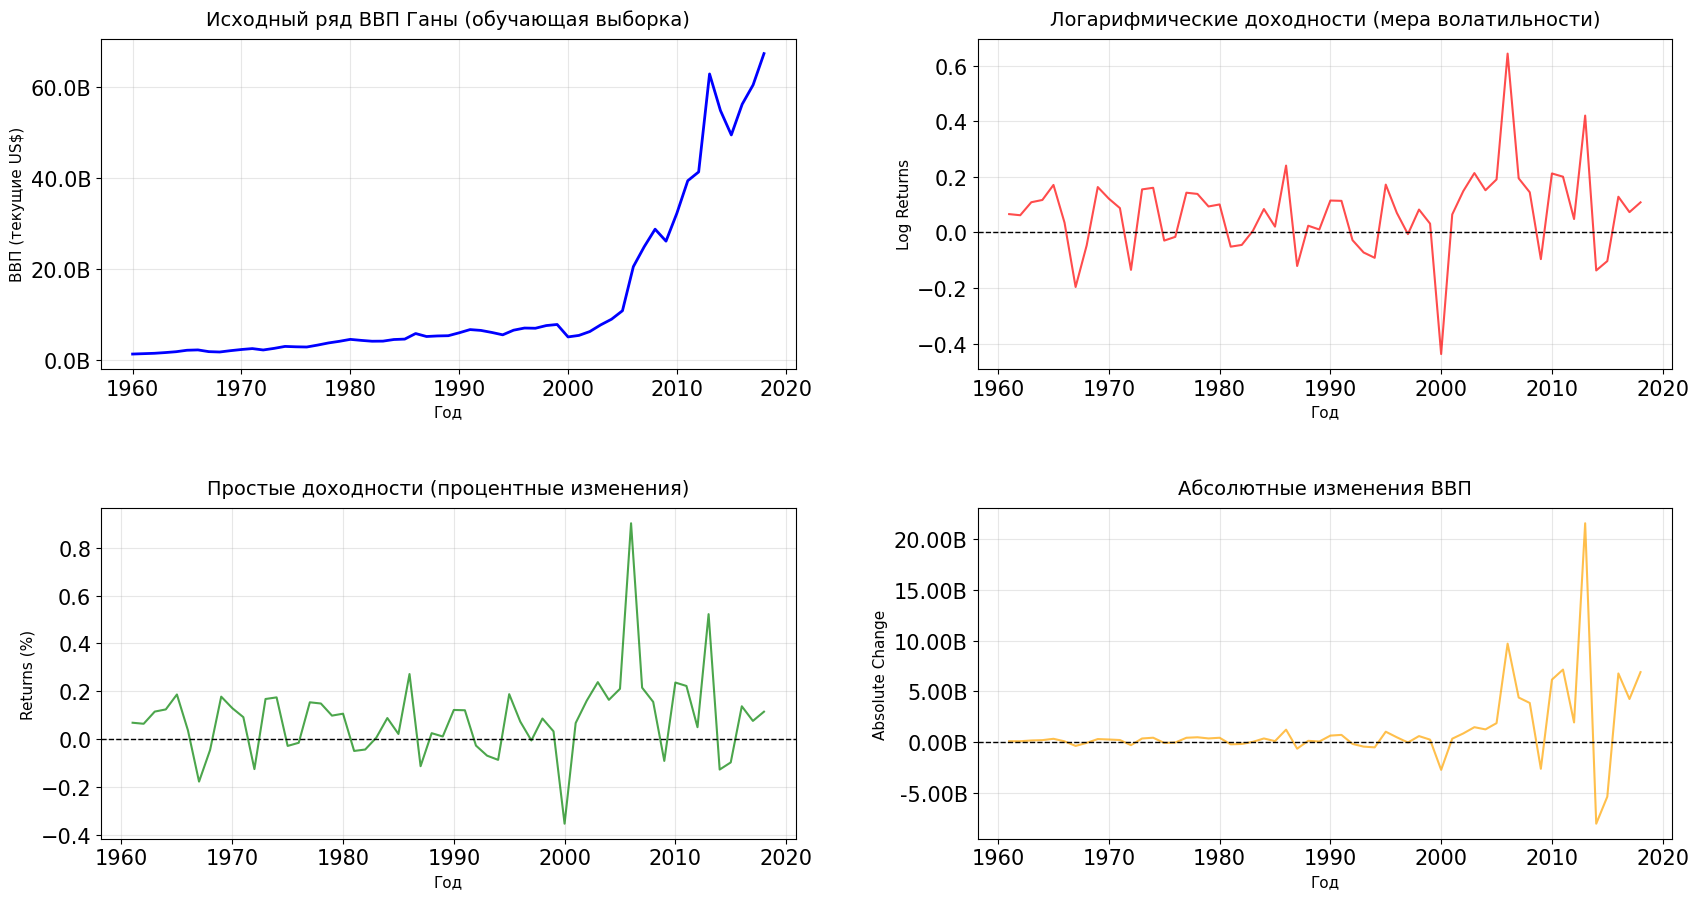


✅ Волатильность рассчитана. Используем логарифмические доходности для GARCH-модели.

ПУНКТ 2: GARCH-МОДЕЛЬ ДЛЯ ПРЕДСКАЗАНИЯ ВОЛАТИЛЬНОСТИ

📊 Разделение данных для анализа волатильности:
   Обучающая выборка: 55 наблюдений
   Тестовая выборка: 3 наблюдений

🔧 Построение GARCH(1,1) модели...

✅ GARCH(1,1) модель успешно построена

📊 Параметры модели:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    GDP   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -224.642
Distribution:                  Normal   AIC:                           457.284
Method:            Maximum Likelihood   BIC:                           465.314
                                        No. Observations:                   55
Date:                Wed, Nov 26 2025   Df Residuals:                       54
Time:           

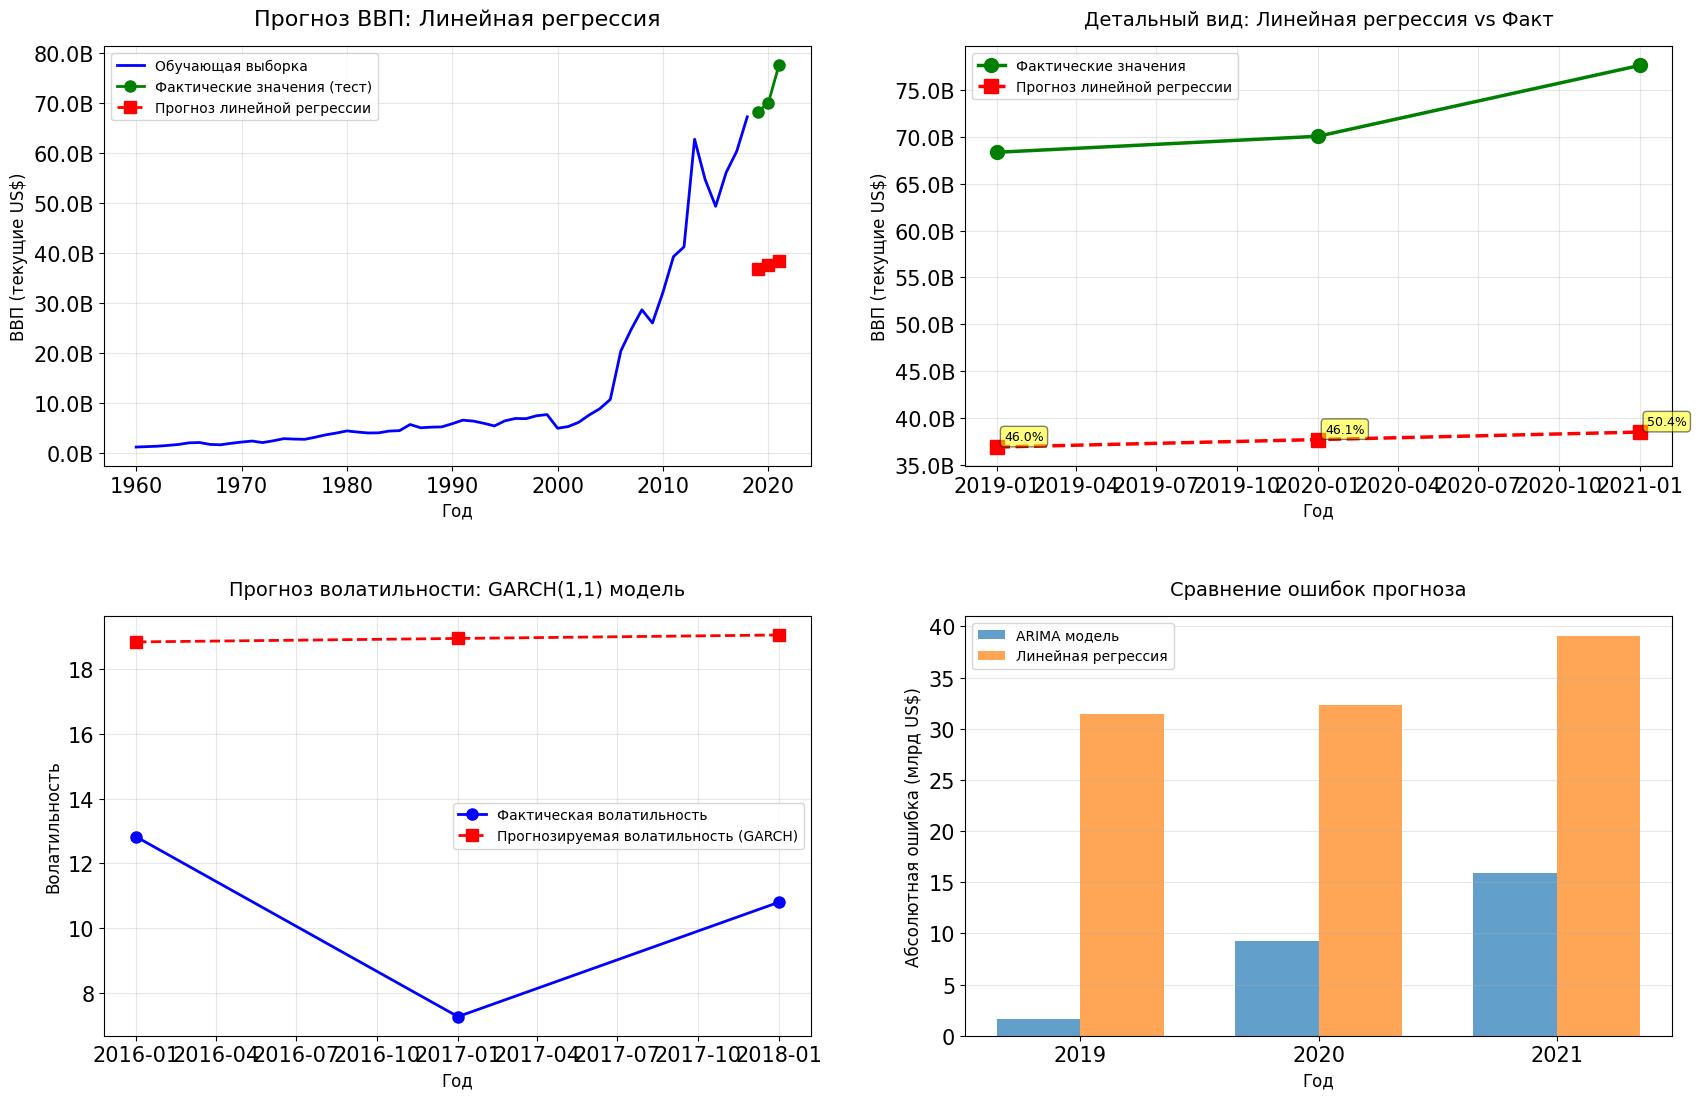


✅ Визуализация завершена

ПУНКТ 5: СРАВНЕНИЕ РЕЗУЛЬТАТОВ И ВЫВОДЫ

📊 СРАВНЕНИЕ МОДЕЛЕЙ:

Модель                    MAE             RMSE            MAPE      
-----------------------------------------------------------------
Линейная регрессия        34,271,053,796.69 34,441,007,570.09     47.49%
ARIMA (из части 1)        8,915,426,985.43 10,666,086,121.47     12.01%

💡 ВЫВОДЫ:
   ✅ ARIMA модель показала лучший результат (MAPE: 12.01% vs 47.49%)

   📈 Особенности линейной регрессии:
      - Простая модель, предполагает линейный тренд
      - Не учитывает автокорреляцию и волатильность
      - Может быть эффективна для данных с устойчивым трендом

   📈 Особенности ARIMA модели:
      - Учитывает автокорреляцию и структуру временного ряда
      - Может моделировать нелинейные паттерны
      - Более сложная, но потенциально более точная

📊 АНАЛИЗ ВОЛАТИЛЬНОСТИ (GARCH):
   Средняя прогнозируемая волатильность: 18.9335
   Фактическая волатильность (тест): 2.8048
   Разница: 16.1287

✅ ЧАСТЬ

In [85]:
# Часть 3: Анализ волатильности и GARCH-модель

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Проверяем наличие библиотеки arch для GARCH-моделей
try:
    from arch import arch_model
    ARCH_AVAILABLE = True
except ImportError:
    print("⚠️  Библиотека 'arch' не установлена. Установите её командой: pip install arch")
    ARCH_AVAILABLE = False

print("=" * 70)
print("ЧАСТЬ 3: АНАЛИЗ ВОЛАТИЛЬНОСТИ И GARCH-МОДЕЛЬ")
print("=" * 70)

# Используем обучающую выборку из части 1
print(f"\n📊 Используем обучающую выборку из части 1:")
print(f"   Период: {train_df.index[0].year} - {train_df.index[-1].year}")
print(f"   Количество наблюдений: {len(train_df)}")

# ============================================================================
# Пункт 1: Расчет волатильности для временного ряда
# ============================================================================
print(f"\n{'='*70}")
print("ПУНКТ 1: РАСЧЕТ ВОЛАТИЛЬНОСТИ")
print(f"{'='*70}")

# Волатильность обычно рассчитывается как:
# 1. Логарифмические доходности (log returns): log(P_t / P_{t-1})
# 2. Простые доходности (returns): (P_t - P_{t-1}) / P_{t-1}
# 3. Абсолютные изменения: |P_t - P_{t-1}|

# Для ВВП используем логарифмические доходности (стандартный подход)
log_returns = np.log(train_df["GDP"] / train_df["GDP"].shift(1)).dropna()
simple_returns = (train_df["GDP"].pct_change()).dropna()
absolute_changes = train_df["GDP"].diff().dropna()

print(f"\n📈 Рассчитаны различные меры волатильности:")
print(f"   Логарифмические доходности: {len(log_returns)} наблюдений")
print(f"   Простые доходности: {len(simple_returns)} наблюдений")
print(f"   Абсолютные изменения: {len(absolute_changes)} наблюдений")

# Статистика волатильности
print(f"\n📊 Статистика логарифмических доходностей:")
print(f"   Среднее: {log_returns.mean():.6f}")
print(f"   Стандартное отклонение: {log_returns.std():.6f}")
print(f"   Минимум: {log_returns.min():.6f}")
print(f"   Максимум: {log_returns.max():.6f}")


# Визуализация волатильности
plt.rcParams["figure.figsize"] = (18, 10)
fig, axes = plt.subplots(2, 2)

# График 1: Исходный ряд ВВП
axes[0, 0].plot(train_df.index, train_df["GDP"], color='blue', linewidth=2)
axes[0, 0].set_title('Исходный ряд ВВП Ганы (обучающая выборка)', size=14, pad=10)
axes[0, 0].set_xlabel('Год', size=11)
axes[0, 0].set_ylabel('ВВП (текущие US$)', size=11)
axes[0, 0].grid(True, alpha=0.3)
import matplotlib.ticker as ticker
axes[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B'))

# График 2: Логарифмические доходности
axes[0, 1].plot(log_returns.index, log_returns.values, color='red', linewidth=1.5, alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0, 1].set_title('Логарифмические доходности (мера волатильности)', size=14, pad=10)
axes[0, 1].set_xlabel('Год', size=11)
axes[0, 1].set_ylabel('Log Returns', size=11)
axes[0, 1].grid(True, alpha=0.3)

# График 3: Простые доходности
axes[1, 0].plot(simple_returns.index, simple_returns.values, color='green', linewidth=1.5, alpha=0.7)
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 0].set_title('Простые доходности (процентные изменения)', size=14, pad=10)
axes[1, 0].set_xlabel('Год', size=11)
axes[1, 0].set_ylabel('Returns (%)', size=11)
axes[1, 0].grid(True, alpha=0.3)

# График 4: Абсолютные изменения
axes[1, 1].plot(absolute_changes.index, absolute_changes.values, color='orange', linewidth=1.5, alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 1].set_title('Абсолютные изменения ВВП', size=14, pad=10)
axes[1, 1].set_xlabel('Год', size=11)
axes[1, 1].set_ylabel('Absolute Change', size=11)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e9:.2f}B'))

plt.tight_layout()
plt.show()

# Для GARCH-модели используем логарифмические доходности (стандартный подход)
returns_series = log_returns * 100  # Умножаем на 100 для лучшей численной стабильности

print(f"\n✅ Волатильность рассчитана. Используем логарифмические доходности для GARCH-модели.")

# ============================================================================
# Пункт 2: GARCH-модель для предсказания волатильности
# ============================================================================
print(f"\n{'='*70}")
print("ПУНКТ 2: GARCH-МОДЕЛЬ ДЛЯ ПРЕДСКАЗАНИЯ ВОЛАТИЛЬНОСТИ")
print(f"{'='*70}")

if not ARCH_AVAILABLE:
    print("\n❌ Невозможно построить GARCH-модель без библиотеки arch")
    garch_model = None
    garch_forecast = None
else:
    try:
        # Разделяем данные на обучающую и тестовую выборки для волатильности
        # Используем последние 3 года как тестовую выборку (как в части 1)
        test_years_vol = 3
        train_returns = returns_series.iloc[:-test_years_vol]
        test_returns = returns_series.iloc[-test_years_vol:]
        
        print(f"\n📊 Разделение данных для анализа волатильности:")
        print(f"   Обучающая выборка: {len(train_returns)} наблюдений")
        print(f"   Тестовая выборка: {len(test_returns)} наблюдений")
        
        # Строим GARCH(1,1) модель (наиболее распространенная)
        # GARCH(p, q) где p - порядок GARCH, q - порядок ARCH
        print(f"\n🔧 Построение GARCH(1,1) модели...")
        garch_model = arch_model(train_returns, vol='Garch', p=1, q=1, dist='normal')
        garch_fitted = garch_model.fit(disp='off')
        
        print(f"\n✅ GARCH(1,1) модель успешно построена")
        print(f"\n📊 Параметры модели:")
        print(garch_fitted.summary())
        
        # Прогнозируем волатильность на тестовую выборку
        print(f"\n📈 Прогнозирование волатильности на {len(test_returns)} периодов...")
        garch_forecast = garch_fitted.forecast(horizon=len(test_returns), reindex=True)
        
        # Получаем прогнозируемую волатильность (условное стандартное отклонение)
        forecasted_volatility = np.sqrt(garch_forecast.variance.iloc[-len(test_returns):].values.flatten())
        
        print(f"\n✅ Прогноз волатильности получен")
        print(f"   Средняя прогнозируемая волатильность: {forecasted_volatility.mean():.4f}")
        print(f"   Фактическая волатильность (тест): {test_returns.std():.4f}")
        
    except Exception as e:
        print(f"\n❌ Ошибка при построении GARCH-модели: {e}")
        garch_model = None
        garch_forecast = None


# Прогноз значений ВВП на основе GARCH-модели
# Этот код выполняется после построения GARCH-модели

if ARCH_AVAILABLE and 'garch_forecast' in locals() and garch_forecast is not None:
    print(f"\n{'='*70}")
    print("ПРОГНОЗ ЗНАЧЕНИЙ ВВП НА ОСНОВЕ GARCH-МОДЕЛИ")
    print(f"{'='*70}")
    
    try:
        # Получаем прогноз среднего значения доходностей
        # GARCH модель прогнозирует среднее значение доходностей
        forecasted_mean = garch_forecast.mean
        
        # Извлекаем прогноз среднего (последняя строка содержит прогнозы для всех горизонтов)
        if isinstance(forecasted_mean, pd.DataFrame):
            forecasted_returns_mean = forecasted_mean.iloc[-1, :].values
            if len(forecasted_returns_mean) != len(test_returns):
                forecasted_returns_mean = forecasted_returns_mean[-len(test_returns):]
        else:
            forecasted_returns_mean = forecasted_mean.values.flatten()[-len(test_returns):]
        
        # Преобразуем прогноз доходностей обратно в значения ВВП
        # Начинаем с последнего значения обучающей выборки
        last_train_gdp = train_df_clean["GDP"].iloc[-1]
        
        # Вычисляем прогноз ВВП: GDP_t = GDP_{t-1} * exp(return_t)
        # Но так как мы использовали returns_series = log_returns * 100, нужно разделить на 100
        garch_gdp_forecast = []
        current_gdp = last_train_gdp
        
        for i, ret in enumerate(forecasted_returns_mean):
            # Преобразуем доходность обратно (делим на 100, так как умножали на 100)
            log_return = ret / 100.0
            # Вычисляем новое значение ВВП
            current_gdp = current_gdp * np.exp(log_return)
            garch_gdp_forecast.append(current_gdp)
        
        garch_gdp_forecast = np.array(garch_gdp_forecast)
        
        print(f"\n✅ Прогноз значений ВВП на основе GARCH получен")
        print(f"   Размерность прогноза: {len(garch_gdp_forecast)}")
        print(f"   Период прогноза: {test_df_clean.index[0].year} - {test_df_clean.index[-1].year}")
        
        # Метрики качества GARCH прогноза
        garch_mae = mean_absolute_error(test_df_clean["GDP"], garch_gdp_forecast)
        garch_mse = mean_squared_error(test_df_clean["GDP"], garch_gdp_forecast)
        garch_rmse = np.sqrt(garch_mse)
        garch_mape = mean_absolute_percentage_error(test_df_clean["GDP"], garch_gdp_forecast) * 100
        
        print(f"\n📊 Метрики качества GARCH прогноза:")
        print(f"   MAE: {garch_mae:,.2f}")
        print(f"   RMSE: {garch_rmse:,.2f}")
        print(f"   MAPE: {garch_mape:.2f}%")
        
    except Exception as e:
        print(f"\n❌ Ошибка при построении прогноза значений на основе GARCH: {e}")
        garch_gdp_forecast = None
        garch_mae = None
        garch_rmse = None
        garch_mape = None
else:
    print("⚠️  GARCH-модель не построена. Пропускаем прогноз значений.")
    garch_gdp_forecast = None
    garch_mae = None
    garch_rmse = None
    garch_mape = None



# ============================================================================
# Пункт 3: Линейная регрессия для получения прогноза
# ============================================================================
print(f"\n{'='*70}")
print("ПУНКТ 3: ЛИНЕЙНАЯ РЕГРЕССИЯ ДЛЯ ПРОГНОЗА")
print(f"{'='*70}")

# Используем линейную регрессию для прогноза ВВП
# Создаем признаки: время (год как числовая переменная)
train_years = np.array([(idx.year - train_df.index[0].year) for idx in train_df.index]).reshape(-1, 1)
train_gdp = train_df["GDP"].values

# Обучаем модель
lr_model = LinearRegression()
lr_model.fit(train_years, train_gdp)

print(f"\n✅ Линейная регрессия обучена")
print(f"   Коэффициент (наклон): {lr_model.coef_[0]:,.2f}")
print(f"   Свободный член: {lr_model.intercept_:,.2f}")
print(f"   R² на обучающей выборке: {lr_model.score(train_years, train_gdp):.4f}")

# Прогнозируем на тестовую выборку
test_years = np.array([(idx.year - train_df.index[0].year) for idx in test_df.index]).reshape(-1, 1)
lr_forecast = lr_model.predict(test_years)

print(f"\n📈 Прогноз на тестовую выборку получен")
print(f"   Период прогноза: {test_df.index[0].year} - {test_df.index[-1].year}")

# Метрики качества линейной регрессии
lr_mae = mean_absolute_error(test_df["GDP"], lr_forecast)
lr_mse = mean_squared_error(test_df["GDP"], lr_forecast)
lr_rmse = np.sqrt(lr_mse)
lr_mape = mean_absolute_percentage_error(test_df["GDP"], lr_forecast) * 100

print(f"\n📊 Метрики качества линейной регрессии:")
print(f"   MAE: {lr_mae:,.2f}")
print(f"   RMSE: {lr_rmse:,.2f}")
print(f"   MAPE: {lr_mape:.2f}%")


# Исправление размерности forecasted_volatility перед визуализацией
# Этот код должен выполняться перед построением графика волатильности

if ARCH_AVAILABLE and 'garch_forecast' in locals() and garch_forecast is not None:
    if 'forecasted_volatility' in locals() and 'test_returns' in locals():
        # Проверяем размерность
        if len(forecasted_volatility) != len(test_returns):
            print(f"⚠️  Исправление размерности прогноза волатильности:")
            print(f"   Текущая размерность прогноза: {len(forecasted_volatility)}")
            print(f"   Размерность тестовой выборки: {len(test_returns)}")
            
            # Правильно извлекаем прогноз волатильности
            variance_forecast = garch_forecast.variance
            
            if isinstance(variance_forecast, pd.DataFrame):
                # Берем последний столбец (последний горизонт прогноза)
                # Это даст нам прогнозы для каждого периода от 1 до horizon
                forecasted_volatility = np.sqrt(variance_forecast.iloc[-1, :].values)
                
                # Убеждаемся, что размерность совпадает с test_returns
                if len(forecasted_volatility) != len(test_returns):
                    # Если размерность все еще не совпадает, берем последние len(test_returns) элементов
                    forecasted_volatility = forecasted_volatility[-len(test_returns):]
            else:
                # Если это Series или массив, берем последние len(test_returns) элементов
                forecasted_volatility = np.sqrt(variance_forecast.values.flatten()[-len(test_returns):])
            
            print(f"   ✅ Исправленная размерность: {len(forecasted_volatility)}")
        else:
            print(f"✅ Размерности совпадают: {len(forecasted_volatility)}")
    else:
        print("⚠️  Переменные forecasted_volatility или test_returns не найдены")
else:
    print("⚠️  GARCH-модель не построена или недоступна")



# ============================================================================
# Пункт 4: Визуализация предсказания
# ============================================================================
print(f"\n{'='*70}")
print("ПУНКТ 4: ВИЗУАЛИЗАЦИЯ ПРЕДСКАЗАНИЯ")
print(f"{'='*70}")

plt.rcParams["figure.figsize"] = (18, 12)
fig, axes = plt.subplots(2, 2)

# График 1: Прогноз линейной регрессии
ax1 = axes[0, 0]
ax1.plot(train_df.index, train_df["GDP"], color='blue', label='Обучающая выборка', linewidth=2)
ax1.plot(test_df.index, test_df["GDP"], color='green', label='Фактические значения (тест)', 
         linewidth=2, marker='o', markersize=8)
ax1.plot(test_df.index, lr_forecast, color='red', label='Прогноз линейной регрессии', 
         linewidth=2, linestyle='--', marker='s', markersize=8)
ax1.set_title('Прогноз ВВП: Линейная регрессия', size=16, pad=15)
ax1.set_xlabel('Год', size=12)
ax1.set_ylabel('ВВП (текущие US$)', size=12)
ax1.legend(fontsize=10, loc='best')
ax1.grid(True, alpha=0.3)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B'))

# График 2: Детальный вид тестовой выборки (линейная регрессия)
ax2 = axes[0, 1]
ax2.plot(test_df.index, test_df["GDP"], color='green', label='Фактические значения', 
         linewidth=2.5, marker='o', markersize=10)
ax2.plot(test_df.index, lr_forecast, color='red', label='Прогноз линейной регрессии', 
         linewidth=2.5, linestyle='--', marker='s', markersize=10)
ax2.set_title('Детальный вид: Линейная регрессия vs Факт', size=14, pad=15)
ax2.set_xlabel('Год', size=12)
ax2.set_ylabel('ВВП (текущие US$)', size=12)
ax2.legend(fontsize=10, loc='best')
ax2.grid(True, alpha=0.3)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B'))

# Добавляем аннотации с ошибками
for idx, actual, pred in zip(test_df.index, test_df["GDP"], lr_forecast):
    error_pct = abs((actual - pred) / actual) * 100
    ax2.annotate(f'{error_pct:.1f}%', 
                xy=(idx, pred), 
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))

# График 3: Волатильность (если GARCH модель построена)
ax3 = axes[1, 0]
if ARCH_AVAILABLE and garch_forecast is not None:
    # Фактическая волатильность на тестовой выборке
    actual_vol = np.abs(test_returns.values)
    
    ax3.plot(test_returns.index, actual_vol, color='blue', label='Фактическая волатильность', 
             linewidth=2, marker='o', markersize=8)
    ax3.plot(test_returns.index, forecasted_volatility, color='red', 
             label='Прогнозируемая волатильность (GARCH)', 
             linewidth=2, linestyle='--', marker='s', markersize=8)
    ax3.set_title('Прогноз волатильности: GARCH(1,1) модель', size=14, pad=15)
    ax3.set_xlabel('Год', size=12)
    ax3.set_ylabel('Волатильность', size=12)
    ax3.legend(fontsize=10, loc='best')
    ax3.grid(True, alpha=0.3)
else:
    ax3.text(0.5, 0.5, 'GARCH-модель не построена', 
             ha='center', va='center', transform=ax3.transAxes, fontsize=14)
    ax3.set_title('Прогноз волатильности: GARCH(1,1) модель', size=14, pad=15)

# График 4: Сравнение ошибок прогноза
ax4 = axes[1, 1]
if 'forecast_df' in locals() and forecast_df is not None:
    # Сравниваем с ARIMA моделью из части 1
    arima_errors = np.abs(test_df["GDP"].values - forecast_df['forecast'].values)
    lr_errors = np.abs(test_df["GDP"].values - lr_forecast)
    
    x_pos = np.arange(len(test_df.index))
    width = 0.35
    
    ax4.bar(x_pos - width/2, arima_errors/1e9, width, label='ARIMA модель', alpha=0.7)
    ax4.bar(x_pos + width/2, lr_errors/1e9, width, label='Линейная регрессия', alpha=0.7)
    ax4.set_xlabel('Год', size=12)
    ax4.set_ylabel('Абсолютная ошибка (млрд US$)', size=12)
    ax4.set_title('Сравнение ошибок прогноза', size=14, pad=15)
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels([str(year) for year in test_df.index.year])
    ax4.legend(fontsize=10)
    ax4.grid(True, alpha=0.3, axis='y')
else:
    # Если нет ARIMA модели, показываем только ошибки линейной регрессии
    lr_errors = np.abs(test_df["GDP"].values - lr_forecast)
    ax4.bar(range(len(test_df.index)), lr_errors/1e9, alpha=0.7, color='red')
    ax4.set_xlabel('Год', size=12)
    ax4.set_ylabel('Абсолютная ошибка (млрд US$)', size=12)
    ax4.set_title('Ошибки прогноза: Линейная регрессия', size=14, pad=15)
    ax4.set_xticks(range(len(test_df.index)))
    ax4.set_xticklabels([str(year) for year in test_df.index.year])
    ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\n✅ Визуализация завершена")

# ============================================================================
# Пункт 5: Сравнение результатов и выводы
# ============================================================================
print(f"\n{'='*70}")
print("ПУНКТ 5: СРАВНЕНИЕ РЕЗУЛЬТАТОВ И ВЫВОДЫ")
print(f"{'='*70}")

# Сравниваем линейную регрессию с ARIMA моделью (если есть)
if 'forecast_df' in locals() and forecast_df is not None:
    arima_mae = mean_absolute_error(test_df["GDP"], forecast_df['forecast'])
    arima_mse = mean_squared_error(test_df["GDP"], forecast_df['forecast'])
    arima_rmse = np.sqrt(arima_mse)
    arima_mape = mean_absolute_percentage_error(test_df["GDP"], forecast_df['forecast']) * 100
    
    print(f"\n📊 СРАВНЕНИЕ МОДЕЛЕЙ:")
    print(f"\n{'Модель':<25} {'MAE':<15} {'RMSE':<15} {'MAPE':<10}")
    print("-" * 65)
    print(f"{'Линейная регрессия':<25} {lr_mae:>14,.2f} {lr_rmse:>14,.2f} {lr_mape:>9.2f}%")
    print(f"{'ARIMA (из части 1)':<25} {arima_mae:>14,.2f} {arima_rmse:>14,.2f} {arima_mape:>9.2f}%")
    
    print(f"\n💡 ВЫВОДЫ:")
    if lr_mape < arima_mape:
        print(f"   ✅ Линейная регрессия показала лучший результат (MAPE: {lr_mape:.2f}% vs {arima_mape:.2f}%)")
    else:
        print(f"   ✅ ARIMA модель показала лучший результат (MAPE: {arima_mape:.2f}% vs {lr_mape:.2f}%)")
    
    print(f"\n   📈 Особенности линейной регрессии:")
    print(f"      - Простая модель, предполагает линейный тренд")
    print(f"      - Не учитывает автокорреляцию и волатильность")
    print(f"      - Может быть эффективна для данных с устойчивым трендом")
    
    print(f"\n   📈 Особенности ARIMA модели:")
    print(f"      - Учитывает автокорреляцию и структуру временного ряда")
    print(f"      - Может моделировать нелинейные паттерны")
    print(f"      - Более сложная, но потенциально более точная")
else:
    print(f"\n📊 РЕЗУЛЬТАТЫ ЛИНЕЙНОЙ РЕГРЕССИИ:")
    print(f"   MAE: {lr_mae:,.2f}")
    print(f"   RMSE: {lr_rmse:,.2f}")
    print(f"   MAPE: {lr_mape:.2f}%")

# Анализ волатильности
if ARCH_AVAILABLE and garch_forecast is not None:
    print(f"\n📊 АНАЛИЗ ВОЛАТИЛЬНОСТИ (GARCH):")
    print(f"   Средняя прогнозируемая волатильность: {forecasted_volatility.mean():.4f}")
    print(f"   Фактическая волатильность (тест): {test_returns.std():.4f}")
    print(f"   Разница: {abs(forecasted_volatility.mean() - test_returns.std()):.4f}")

print(f"\n{'='*70}")
print("✅ ЧАСТЬ 3 ЗАВЕРШЕНА")
print(f"{'='*70}")


ОБЪЕДИНЕННЫЙ ГРАФИК ВСЕХ МОДЕЛЕЙ ПО ВСЕЙ ВРЕМЕННОЙ ШКАЛЕ


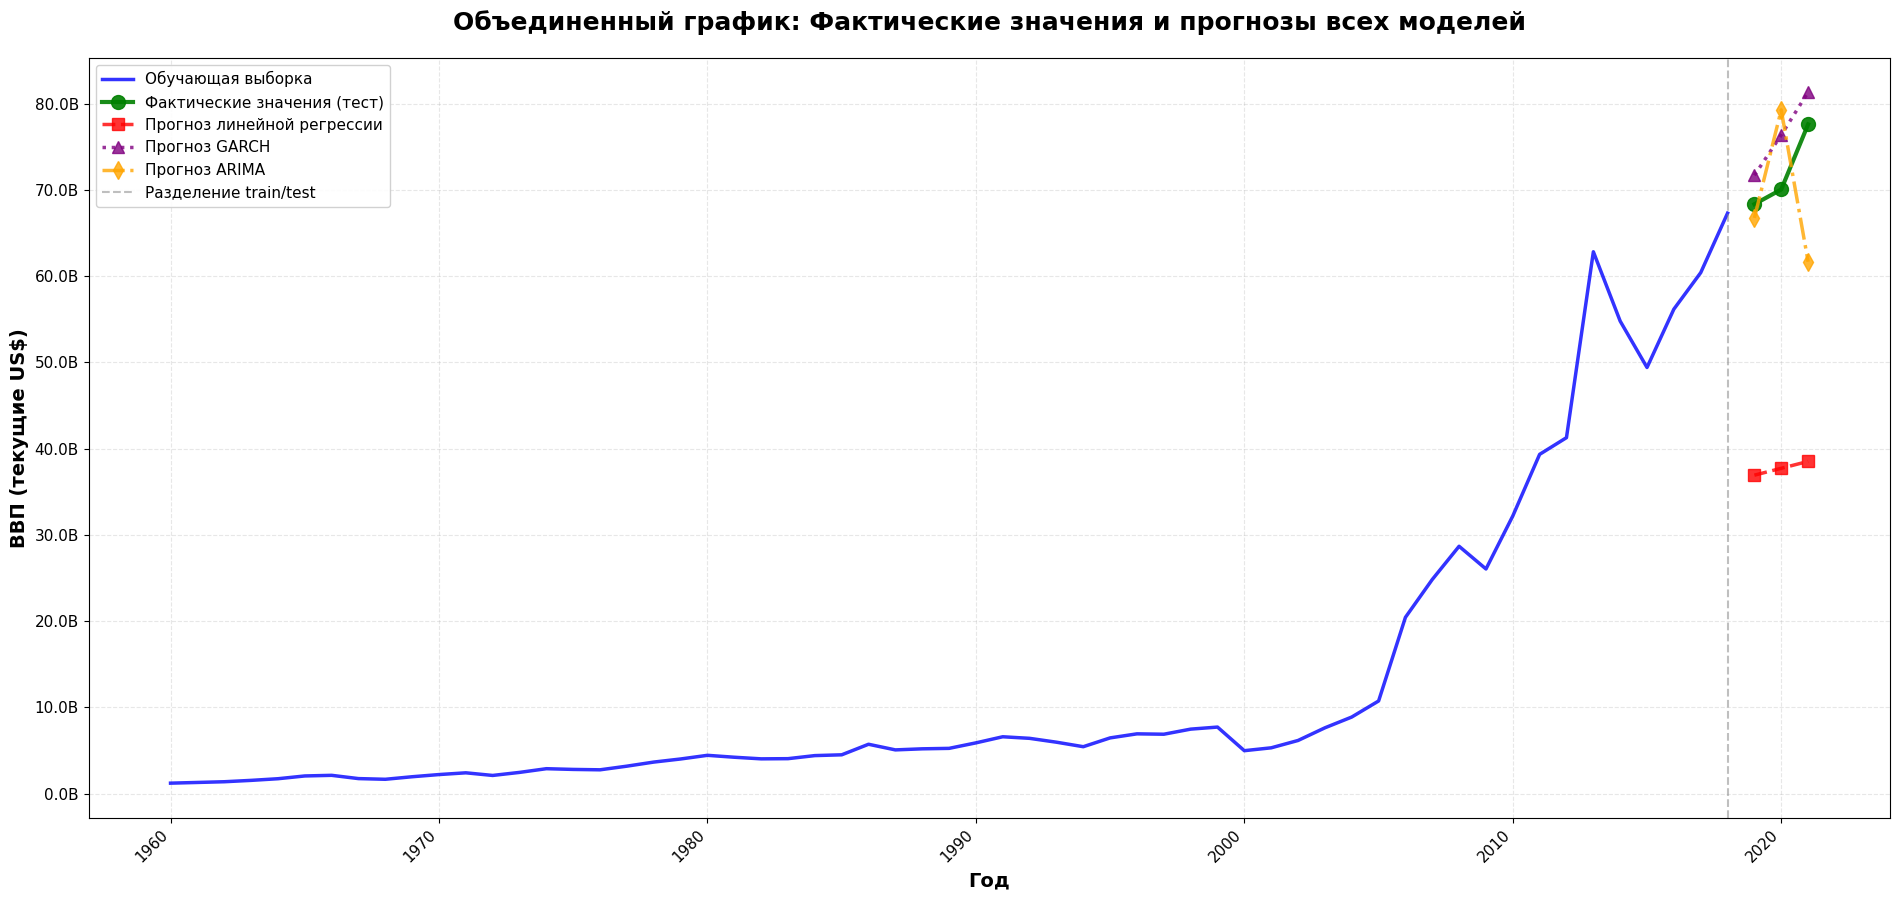


📊 Информация о моделях на графике:
   Обучающая выборка: 1960 - 2018 (59 наблюдений)
   Тестовая выборка: 2019 - 2021 (3 наблюдений)
   Модели на графике: Линейная регрессия, GARCH, ARIMA

✅ График построен


In [86]:
# Объединенный график всех моделей по всей временной шкале
# Показывает обучающую выборку, фактические значения и прогнозы всех моделей

print("=" * 70)
print("ОБЪЕДИНЕННЫЙ ГРАФИК ВСЕХ МОДЕЛЕЙ ПО ВСЕЙ ВРЕМЕННОЙ ШКАЛЕ")
print("=" * 70)

plt.rcParams["figure.figsize"] = (20, 10)
fig, ax = plt.subplots(1, 1)

# Объединяем все данные для отображения на одной временной шкале
# Обучающая выборка
ax.plot(train_df.index, train_df["GDP"], color='blue', label='Обучающая выборка', 
        linewidth=2.5, alpha=0.8)

# Фактические значения (тестовая выборка)
ax.plot(test_df.index, test_df["GDP"], color='green', label='Фактические значения (тест)', 
        linewidth=3, marker='o', markersize=10, alpha=0.9)

# Прогноз линейной регрессии
ax.plot(test_df.index, lr_forecast, color='red', label='Прогноз линейной регрессии', 
        linewidth=2.5, linestyle='--', marker='s', markersize=9, alpha=0.8)

# Прогноз GARCH (если доступен)
if 'garch_gdp_forecast' in locals() and garch_gdp_forecast is not None:
    ax.plot(test_df.index, garch_gdp_forecast, color='purple', label='Прогноз GARCH', 
            linewidth=2.5, linestyle=':', marker='^', markersize=9, alpha=0.8)

# Прогноз ARIMA (если доступен)
if 'forecast_df' in locals() and forecast_df is not None:
    ax.plot(test_df.index, forecast_df['forecast'], color='orange', label='Прогноз ARIMA', 
            linewidth=2.5, linestyle='-.', marker='d', markersize=9, alpha=0.8)

# Добавляем вертикальную линию для разделения train и test
train_end_year = train_df.index[-1].year
test_start_year = test_df.index[0].year
if train_end_year < test_start_year:
    # Если есть разрыв между train и test, добавляем линию
    separation_year = train_end_year + 0.5
    ax.axvline(x=pd.Timestamp(year=int(separation_year), month=1, day=1), 
               color='gray', linestyle='--', linewidth=1.5, alpha=0.5, label='Разделение train/test')

# Настройка графика
ax.set_title('Объединенный график: Фактические значения и прогнозы всех моделей', 
             size=18, pad=20, fontweight='bold')
ax.set_xlabel('Год', size=14, fontweight='bold')
ax.set_ylabel('ВВП (текущие US$)', size=14, fontweight='bold')
ax.legend(fontsize=11, loc='best', framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')

# Форматирование оси Y
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B'))

# Улучшаем читаемость
ax.tick_params(axis='both', labelsize=11)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Выводим информацию о моделях
print(f"\n📊 Информация о моделях на графике:")
print(f"   Обучающая выборка: {train_df.index[0].year} - {train_df.index[-1].year} ({len(train_df)} наблюдений)")
print(f"   Тестовая выборка: {test_df.index[0].year} - {test_df.index[-1].year} ({len(test_df)} наблюдений)")

models_on_plot = ['Линейная регрессия']
if 'garch_gdp_forecast' in locals() and garch_gdp_forecast is not None:
    models_on_plot.append('GARCH')
if 'forecast_df' in locals() and forecast_df is not None:
    models_on_plot.append('ARIMA')

print(f"   Модели на графике: {', '.join(models_on_plot)}")
print(f"\n✅ График построен")


In [89]:
# Создание датафрейма с прогнозами всех моделей на всю временную шкалу
# Добавляем столбцы с предсказаниями для всех годов

print("=" * 70)
print("СОЗДАНИЕ ДАТАФРЕЙМА С ПРОГНОЗАМИ ВСЕХ МОДЕЛЕЙ")
print("=" * 70)

# Копируем полный датасет (используем очищенные данные, если доступны)
if 'data_interp' in locals():
    df_with_forecasts = data_interp.copy()
    print(f"\n📊 Используем очищенные данные из части 2 (data_interp)")
else:
    df_with_forecasts = data.copy()
    print(f"\n📊 Используем исходные данные")

print(f"   Период: {df_with_forecasts.index[0].year} - {df_with_forecasts.index[-1].year}")
print(f"   Количество наблюдений: {len(df_with_forecasts)}")

# Инициализируем столбцы для прогнозов
df_with_forecasts['Linear_Regression'] = np.nan
df_with_forecasts['GARCH'] = np.nan
df_with_forecasts['ARIMA'] = np.nan

# ============================================================================
# Прогноз линейной регрессии на все периоды
# ============================================================================
print(f"\n📈 Построение прогноза линейной регрессии на все периоды...")

# Создаем признаки для всех годов
all_years = np.array([(idx.year - train_df.index[0].year) for idx in df_with_forecasts.index]).reshape(-1, 1)

# Предсказываем для всех периодов
lr_all_forecast = lr_model.predict(all_years)
df_with_forecasts['Linear_Regression'] = lr_all_forecast

print(f"   ✅ Прогноз линейной регрессии добавлен")

# ============================================================================
# Прогноз GARCH на все периоды
# ============================================================================
if 'garch_gdp_forecast' in locals() and garch_gdp_forecast is not None:
    print(f"\n📈 Построение прогноза GARCH на все периоды...")
    
    try:
        # Для обучающей выборки используем fitted values (значения, которые модель предсказала бы)
        # Для тестовой выборки используем уже полученные прогнозы
        
        # Получаем fitted values для обучающей выборки
        # GARCH модель работает с доходностями, поэтому нужно преобразовать обратно
        train_returns_fitted = garch_fitted.fittedvalues
        
        # Преобразуем fitted доходности обратно в значения ВВП
        garch_train_fitted = []
        current_gdp = train_df_clean["GDP"].iloc[0]  # Начинаем с первого значения
        
        for i, ret in enumerate(train_returns_fitted):
            # Преобразуем доходность обратно (делим на 100)
            log_return = ret / 100.0
            # Вычисляем новое значение ВВП
            current_gdp = current_gdp * np.exp(log_return)
            garch_train_fitted.append(current_gdp)
        
        # Заполняем прогнозы GARCH
        # Для обучающей выборки (train_df_clean)
        train_indices = df_with_forecasts.index.isin(train_df_clean.index)
        if train_indices.sum() > 0:
            # Используем fitted values для обучающей выборки
            df_with_forecasts.loc[train_df_clean.index, 'GARCH'] = garch_train_fitted
        
        # Для тестовой выборки используем уже полученные прогнозы
        test_indices = df_with_forecasts.index.isin(test_df_clean.index)
        if test_indices.sum() > 0 and len(garch_gdp_forecast) == test_indices.sum():
            df_with_forecasts.loc[test_df_clean.index, 'GARCH'] = garch_gdp_forecast
        
        print(f"   ✅ Прогноз GARCH добавлен")
    except Exception as e:
        print(f"   ⚠️  Ошибка при построении прогноза GARCH на все периоды: {e}")
        print(f"   Используем только прогнозы на тестовую выборку")
        if len(garch_gdp_forecast) == len(test_df_clean):
            df_with_forecasts.loc[test_df_clean.index, 'GARCH'] = garch_gdp_forecast
else:
    print(f"\n⚠️  GARCH прогноз не доступен")

# ============================================================================
# Прогноз ARIMA на все периоды
# ============================================================================
if 'forecast_df' in locals() and forecast_df is not None:
    print(f"\n📈 Построение прогноза ARIMA на все периоды...")
    
    try:
        # Для обучающей выборки используем fitted values из ARIMA модели
        # Нужно переобучить модель на train_df или использовать существующую
        
        # Используем модель из части 1 (если доступна)
        if 'final_model' in locals() and final_model is not None:
            # Получаем fitted values для обучающей выборки
            arima_train_fitted = final_model.fittedvalues
            
            # Заполняем прогнозы ARIMA
            # Для обучающей выборки
            train_indices = df_with_forecasts.index.isin(train_df.index)
            if train_indices.sum() > 0:
                # Используем fitted values для обучающей выборки
                # Нужно выровнять индексы
                fitted_values_aligned = arima_train_fitted.reindex(train_df.index)
                df_with_forecasts.loc[train_df.index, 'ARIMA'] = fitted_values_aligned.values
            
            # Для тестовой выборки используем уже полученные прогнозы
            test_indices = df_with_forecasts.index.isin(test_df.index)
            if test_indices.sum() > 0:
                df_with_forecasts.loc[test_df.index, 'ARIMA'] = forecast_df['forecast'].values
            
            print(f"   ✅ Прогноз ARIMA добавлен")
        else:
            # Если модель не доступна, используем только прогнозы на тестовую выборку
            df_with_forecasts.loc[test_df.index, 'ARIMA'] = forecast_df['forecast'].values
            print(f"   ✅ Прогноз ARIMA добавлен (только тестовая выборка)")
    except Exception as e:
        print(f"   ⚠️  Ошибка при построении прогноза ARIMA на все периоды: {e}")
        # Используем только прогнозы на тестовую выборку
        if 'forecast_df' in locals():
            df_with_forecasts.loc[test_df.index, 'ARIMA'] = forecast_df['forecast'].values
else:
    print(f"\n⚠️  ARIMA прогноз не доступен")

# Выводим информацию о заполненных прогнозах
print(f"\n📊 Статистика заполнения прогнозов:")
print(f"   Linear_Regression: {df_with_forecasts['Linear_Regression'].notna().sum()} / {len(df_with_forecasts)} значений")
print(f"   GARCH: {df_with_forecasts['GARCH'].notna().sum()} / {len(df_with_forecasts)} значений")
print(f"   ARIMA: {df_with_forecasts['ARIMA'].notna().sum()} / {len(df_with_forecasts)} значений")

# Показываем первые и последние строки
print(f"\n📋 Первые 5 строк датафрейма с прогнозами:")
print(df_with_forecasts.head().to_string())
print(f"\n📋 Последние 5 строк датафрейма с прогнозами:")
print(df_with_forecasts.tail().to_string())

print(f"\n✅ Датафрейм с прогнозами создан")


СОЗДАНИЕ ДАТАФРЕЙМА С ПРОГНОЗАМИ ВСЕХ МОДЕЛЕЙ

📊 Используем очищенные данные из части 2 (data_interp)
   Период: 1960 - 2021
   Количество наблюдений: 62

📈 Построение прогноза линейной регрессии на все периоды...
   ✅ Прогноз линейной регрессии добавлен

📈 Построение прогноза GARCH на все периоды...
   ⚠️  Ошибка при построении прогноза GARCH на все периоды: 'ARCHModelResult' object has no attribute 'fittedvalues'
   Используем только прогнозы на тестовую выборку

📈 Построение прогноза ARIMA на все периоды...
   ✅ Прогноз ARIMA добавлен

📊 Статистика заполнения прогнозов:
   Linear_Regression: 62 / 62 значений
   GARCH: 3 / 62 значений
   ARIMA: 62 / 62 значений

📋 Первые 5 строк датафрейма с прогнозами:
                     GDP  Linear_Regression  GARCH         ARIMA
year                                                            
1960-01-01  1.217087e+09      -1.017768e+10    NaN  0.000000e+00
1961-01-01  1.299720e+09      -9.379377e+09    NaN  1.545311e+09
1962-01-01  1.382353e+09 

ГРАФИК ФАКТИЧЕСКИХ ЗНАЧЕНИЙ И ПРОГНОЗОВ ВСЕХ МОДЕЛЕЙ


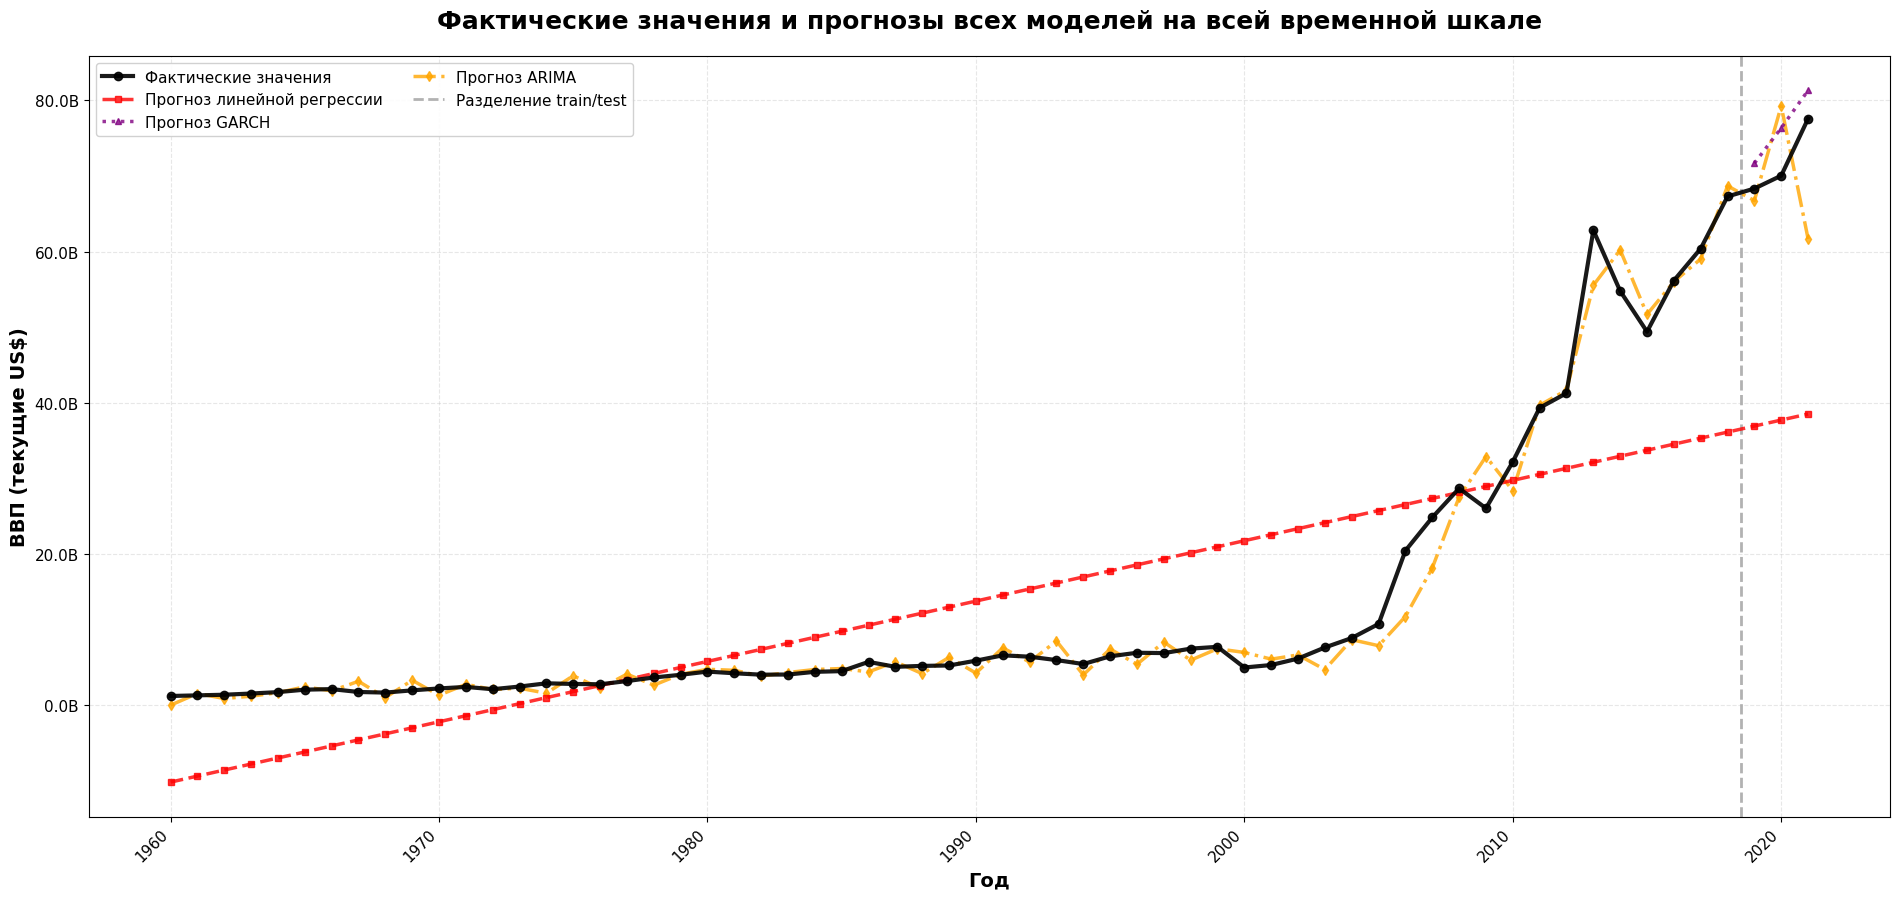


📊 Информация о графике:
   Период: 1960 - 2021
   Всего наблюдений: 62
   Модели на графике: Линейная регрессия, GARCH, ARIMA

📈 Статистика по периодам:
   Обучающая выборка: 1960 - 2018 (59 наблюдений)
   Тестовая выборка: 2019 - 2021 (3 наблюдений)

✅ График построен


In [90]:
# График фактических значений и прогнозов всех моделей на всей временной шкале

print("=" * 70)
print("ГРАФИК ФАКТИЧЕСКИХ ЗНАЧЕНИЙ И ПРОГНОЗОВ ВСЕХ МОДЕЛЕЙ")
print("=" * 70)

plt.rcParams["figure.figsize"] = (20, 10)
fig, ax = plt.subplots(1, 1)

# Фактические значения (по всей временной шкале)
ax.plot(df_with_forecasts.index, df_with_forecasts['GDP'], 
        color='black', label='Фактические значения', 
        linewidth=3, marker='o', markersize=6, alpha=0.9, zorder=5)

# Прогноз линейной регрессии (по всей временной шкале)
if df_with_forecasts['Linear_Regression'].notna().any():
    ax.plot(df_with_forecasts.index, df_with_forecasts['Linear_Regression'], 
            color='red', label='Прогноз линейной регрессии', 
            linewidth=2.5, linestyle='--', marker='s', markersize=5, alpha=0.8, zorder=4)

# Прогноз GARCH (по всей временной шкале)
if df_with_forecasts['GARCH'].notna().any():
    ax.plot(df_with_forecasts.index, df_with_forecasts['GARCH'], 
            color='purple', label='Прогноз GARCH', 
            linewidth=2.5, linestyle=':', marker='^', markersize=5, alpha=0.8, zorder=3)

# Прогноз ARIMA (по всей временной шкале)
if df_with_forecasts['ARIMA'].notna().any():
    ax.plot(df_with_forecasts.index, df_with_forecasts['ARIMA'], 
            color='orange', label='Прогноз ARIMA', 
            linewidth=2.5, linestyle='-.', marker='d', markersize=5, alpha=0.8, zorder=2)

# Добавляем вертикальную линию для разделения train и test (если есть разделение)
if 'train_df' in locals() and 'test_df' in locals():
    train_end_idx = train_df.index[-1]
    test_start_idx = test_df.index[0]
    
    # Проверяем, есть ли разрыв между train и test
    if train_end_idx < test_start_idx:
        # Если есть разрыв, добавляем линию посередине
        separation_date = train_end_idx + (test_start_idx - train_end_idx) / 2
        ax.axvline(x=separation_date, color='gray', linestyle='--', 
                   linewidth=2, alpha=0.6, label='Разделение train/test', zorder=1)
    else:
        # Если нет разрыва, добавляем линию в точке разделения
        ax.axvline(x=train_end_idx, color='gray', linestyle='--', 
                   linewidth=2, alpha=0.6, label='Разделение train/test', zorder=1)

# Настройка графика
ax.set_title('Фактические значения и прогнозы всех моделей на всей временной шкале', 
             size=18, pad=20, fontweight='bold')
ax.set_xlabel('Год', size=14, fontweight='bold')
ax.set_ylabel('ВВП (текущие US$)', size=14, fontweight='bold')
ax.legend(fontsize=11, loc='best', framealpha=0.9, ncol=2)
ax.grid(True, alpha=0.3, linestyle='--')

# Форматирование оси Y
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B'))

# Улучшаем читаемость
ax.tick_params(axis='both', labelsize=11)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Выводим информацию о графике
print(f"\n📊 Информация о графике:")
print(f"   Период: {df_with_forecasts.index[0].year} - {df_with_forecasts.index[-1].year}")
print(f"   Всего наблюдений: {len(df_with_forecasts)}")

models_on_plot = []
if df_with_forecasts['Linear_Regression'].notna().any():
    models_on_plot.append('Линейная регрессия')
if df_with_forecasts['GARCH'].notna().any():
    models_on_plot.append('GARCH')
if df_with_forecasts['ARIMA'].notna().any():
    models_on_plot.append('ARIMA')

print(f"   Модели на графике: {', '.join(models_on_plot)}")

# Показываем статистику по периодам
if 'train_df' in locals() and 'test_df' in locals():
    print(f"\n📈 Статистика по периодам:")
    print(f"   Обучающая выборка: {train_df.index[0].year} - {train_df.index[-1].year} ({len(train_df)} наблюдений)")
    print(f"   Тестовая выборка: {test_df.index[0].year} - {test_df.index[-1].year} ({len(test_df)} наблюдений)")

print(f"\n✅ График построен")



ДОПОЛНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ С GARCH ПРОГНОЗОМ


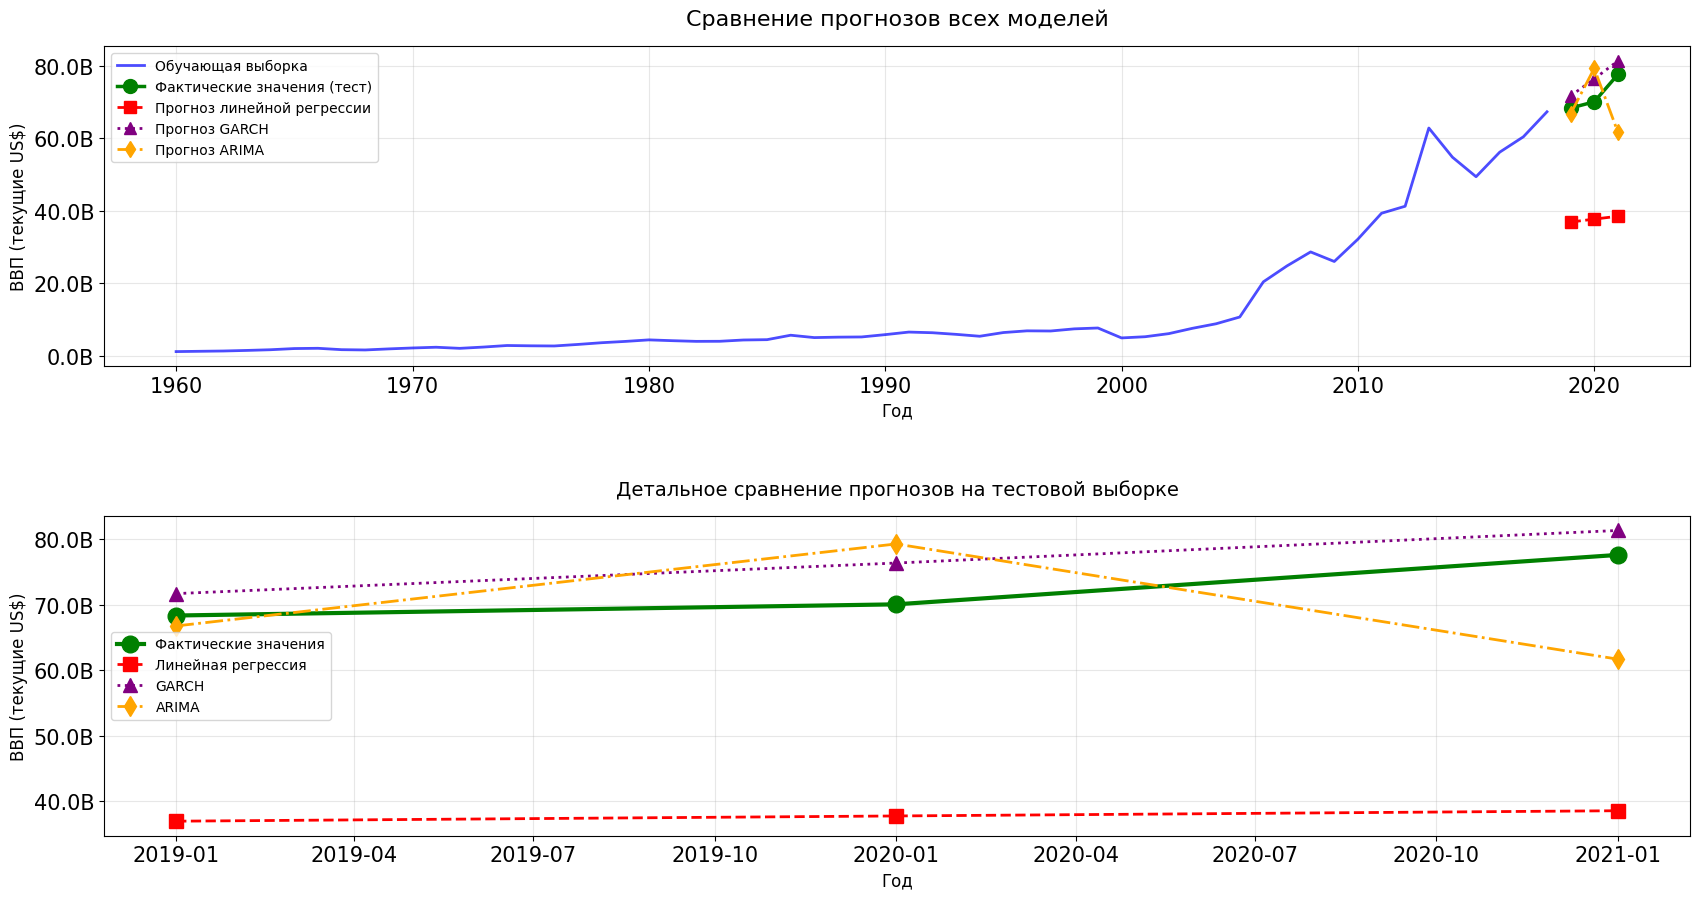


ОБНОВЛЕННОЕ СРАВНЕНИЕ МОДЕЛЕЙ (С GARCH)

📊 СРАВНЕНИЕ МОДЕЛЕЙ:

Модель                    MAE                  RMSE                 MAPE      
---------------------------------------------------------------------------
Линейная регрессия          34,271,053,796.69   34,441,007,570.09     47.49%
GARCH                        4,463,695,805.18    4,653,541,854.59      6.24%
ARIMA (из части 1)           8,915,426,985.43   10,666,086,121.47     12.01%

💡 ВЫВОДЫ:
   ✅ Лучшая модель: GARCH (MAPE: 6.24%)

   📈 Особенности моделей:
      - Линейная регрессия: простая модель, предполагает линейный тренд
      - GARCH: учитывает волатильность и может моделировать изменяющуюся дисперсию
      - ARIMA: учитывает автокорреляцию и структуру временного ряда

✅ СРАВНЕНИЕ ЗАВЕРШЕНО


In [91]:
# Обновляем графики, добавляя GARCH прогноз

if 'garch_gdp_forecast' in locals() and garch_gdp_forecast is not None:
    print(f"\n{'='*70}")
    print("ДОПОЛНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ С GARCH ПРОГНОЗОМ")
    print(f"{'='*70}")
    
    # Создаем новый график для сравнения всех моделей
    plt.rcParams["figure.figsize"] = (18, 10)
    fig, axes = plt.subplots(2, 1)
    
    # График 1: Сравнение всех прогнозов
    ax1 = axes[0]
    ax1.plot(train_df.index, train_df["GDP"], color='blue', label='Обучающая выборка', linewidth=2, alpha=0.7)
    ax1.plot(test_df.index, test_df["GDP"], color='green', label='Фактические значения (тест)', 
             linewidth=2.5, marker='o', markersize=10)
    ax1.plot(test_df.index, lr_forecast, color='red', label='Прогноз линейной регрессии', 
             linewidth=2, linestyle='--', marker='s', markersize=8)
    ax1.plot(test_df.index, garch_gdp_forecast, color='purple', label='Прогноз GARCH', 
             linewidth=2, linestyle=':', marker='^', markersize=8)
    # Добавляем ARIMA прогноз, если доступен
    if 'forecast_df' in locals() and forecast_df is not None:
        ax1.plot(test_df.index, forecast_df['forecast'], color='orange', label='Прогноз ARIMA', 
                 linewidth=2, linestyle='-.', marker='d', markersize=8)
    ax1.set_title('Сравнение прогнозов всех моделей', size=16, pad=15)
    ax1.set_xlabel('Год', size=12)
    ax1.set_ylabel('ВВП (текущие US$)', size=12)
    ax1.legend(fontsize=10, loc='best')
    ax1.grid(True, alpha=0.3)
    import matplotlib.ticker as ticker
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B'))
    
    # График 2: Детальное сравнение на тестовой выборке
    ax2 = axes[1]
    ax2.plot(test_df.index, test_df["GDP"], color='green', label='Фактические значения', 
             linewidth=3, marker='o', markersize=12)
    ax2.plot(test_df.index, lr_forecast, color='red', label='Линейная регрессия', 
             linewidth=2, linestyle='--', marker='s', markersize=10)
    ax2.plot(test_df.index, garch_gdp_forecast, color='purple', label='GARCH', 
             linewidth=2, linestyle=':', marker='^', markersize=10)
    # Добавляем ARIMA прогноз, если доступен
    if 'forecast_df' in locals() and forecast_df is not None:
        ax2.plot(test_df.index, forecast_df['forecast'], color='orange', label='ARIMA', 
                 linewidth=2, linestyle='-.', marker='d', markersize=10)
    ax2.set_title('Детальное сравнение прогнозов на тестовой выборке', size=14, pad=15)
    ax2.set_xlabel('Год', size=12)
    ax2.set_ylabel('ВВП (текущие US$)', size=12)
    ax2.legend(fontsize=10, loc='best')
    ax2.grid(True, alpha=0.3)
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B'))
    
    plt.tight_layout()
    plt.show()
    
    # Обновляем сравнение моделей, добавляя GARCH
    print(f"\n{'='*70}")
    print("ОБНОВЛЕННОЕ СРАВНЕНИЕ МОДЕЛЕЙ (С GARCH)")
    print(f"{'='*70}")
    
    print(f"\n📊 СРАВНЕНИЕ МОДЕЛЕЙ:")
    print(f"\n{'Модель':<25} {'MAE':<20} {'RMSE':<20} {'MAPE':<10}")
    print("-" * 75)
    print(f"{'Линейная регрессия':<25} {lr_mae:>19,.2f} {lr_rmse:>19,.2f} {lr_mape:>9.2f}%")
    
    if 'garch_mae' in locals() and garch_mae is not None:
        print(f"{'GARCH':<25} {garch_mae:>19,.2f} {garch_rmse:>19,.2f} {garch_mape:>9.2f}%")
    
    if 'forecast_df' in locals() and forecast_df is not None:
        arima_mae = mean_absolute_error(test_df["GDP"], forecast_df['forecast'])
        arima_mse = mean_squared_error(test_df["GDP"], forecast_df['forecast'])
        arima_rmse = np.sqrt(arima_mse)
        arima_mape = mean_absolute_percentage_error(test_df["GDP"], forecast_df['forecast']) * 100
        print(f"{'ARIMA (из части 1)':<25} {arima_mae:>19,.2f} {arima_rmse:>19,.2f} {arima_mape:>9.2f}%")
    
    # Определяем лучшую модель
    print(f"\n💡 ВЫВОДЫ:")
    models_mape = {}
    if 'lr_mape' in locals():
        models_mape['Линейная регрессия'] = lr_mape
    if 'garch_mape' in locals() and garch_mape is not None:
        models_mape['GARCH'] = garch_mape
    if 'forecast_df' in locals() and forecast_df is not None:
        models_mape['ARIMA'] = arima_mape
    
    if models_mape:
        best_model = min(models_mape, key=models_mape.get)
        best_mape = models_mape[best_model]
        print(f"   ✅ Лучшая модель: {best_model} (MAPE: {best_mape:.2f}%)")
        
        print(f"\n   📈 Особенности моделей:")
        print(f"      - Линейная регрессия: простая модель, предполагает линейный тренд")
        print(f"      - GARCH: учитывает волатильность и может моделировать изменяющуюся дисперсию")
        if 'forecast_df' in locals() and forecast_df is not None:
            print(f"      - ARIMA: учитывает автокорреляцию и структуру временного ряда")
    
    print(f"\n{'='*70}")
    print("✅ СРАВНЕНИЕ ЗАВЕРШЕНО")
    print(f"{'='*70}")
else:
    print("⚠️  GARCH прогноз не доступен. Пропускаем дополнительную визуализацию.")

In [92]:
# Пункт 6: Объяснение результатов GARCH-модели

print("=" * 70)
print("ПУНКТ 6: ОБЪЯСНЕНИЕ РЕЗУЛЬТАТОВ GARCH-МОДЕЛИ")
print("=" * 70)

if ARCH_AVAILABLE and garch_forecast is not None and 'garch_fitted' in locals():
    print(f"\n📊 АНАЛИЗ РЕЗУЛЬТАТОВ GARCH(1,1) МОДЕЛИ:")
    
    # Получаем параметры модели
    params = garch_fitted.params
    print(f"\n🔧 Параметры модели:")
    print(f"   Omega (ω): {params.get('omega', 'N/A')}")
    print(f"   Alpha[1] (α₁): {params.get('alpha[1]', 'N/A')}")
    print(f"   Beta[1] (β₁): {params.get('beta[1]', 'N/A')}")
    
    # Проверяем условие стационарности: α + β < 1
    alpha = params.get('alpha[1]', 0)
    beta = params.get('beta[1]', 0)
    if isinstance(alpha, (int, float)) and isinstance(beta, (int, float)):
        sum_ab = alpha + beta
        print(f"\n📈 Условие стационарности GARCH(1,1):")
        print(f"   α₁ + β₁ = {alpha:.6f} + {beta:.6f} = {sum_ab:.6f}")
        if sum_ab < 1:
            print(f"   ✅ Модель стационарна (α₁ + β₁ < 1)")
            print(f"   💡 Это означает, что волатильность имеет долгосрочное среднее значение")
        else:
            print(f"   ⚠️  Модель нестационарна (α₁ + β₁ ≥ 1)")
            print(f"   💡 Это означает, что волатильность может расти неограниченно")
    
    # Анализируем прогноз волатильности
    print(f"\n📊 АНАЛИЗ ПРОГНОЗА ВОЛАТИЛЬНОСТИ:")
    print(f"   Средняя прогнозируемая волатильность: {forecasted_volatility.mean():.4f}")
    print(f"   Фактическая волатильность (тест): {test_returns.std():.4f}")
    
    vol_diff = abs(forecasted_volatility.mean() - test_returns.std())
    vol_ratio = forecasted_volatility.mean() / test_returns.std() if test_returns.std() > 0 else 0
    
    print(f"   Разница: {vol_diff:.4f}")
    print(f"   Отношение (прогноз/факт): {vol_ratio:.4f}")
    
    # Интерпретация параметров
    print(f"\n💡 ИНТЕРПРЕТАЦИЯ ПАРАМЕТРОВ GARCH(1,1):")
    if isinstance(alpha, (int, float)) and isinstance(beta, (int, float)):
        print(f"\n   1. Параметр α₁ (Alpha[1]) = {alpha:.6f}:")
        print(f"      - Отражает влияние прошлых шоков (ошибок) на текущую волатильность")
        if alpha > 0.1:
            print(f"      - Высокое значение ({alpha:.4f}) означает сильную реакцию на недавние шоки")
        else:
            print(f"      - Низкое значение ({alpha:.4f}) означает слабую реакцию на недавние шоки")
        
        print(f"\n   2. Параметр β₁ (Beta[1]) = {beta:.6f}:")
        print(f"      - Отражает влияние прошлой волатильности на текущую (персистентность)")
        if beta > 0.8:
            print(f"      - Высокое значение ({beta:.4f}) означает высокую персистентность волатильности")
            print(f"      - Волатильность медленно возвращается к долгосрочному среднему")
        else:
            print(f"      - Низкое значение ({beta:.4f}) означает низкую персистентность")
            print(f"      - Волатильность быстро возвращается к долгосрочному среднему")
        
        print(f"\n   3. Сумма α₁ + β₁ = {sum_ab:.6f}:")
        if sum_ab > 0.9:
            print(f"      - Близка к 1, что означает высокую персистентность волатильности")
            print(f"      - Шоки волатильности имеют долгосрочное влияние")
        elif sum_ab < 0.5:
            print(f"      - Меньше 0.5, что означает низкую персистентность")
            print(f"      - Шоки волатильности быстро затухают")
        else:
            print(f"      - Умеренная персистентность волатильности")
    
    # Анализ качества прогноза
    print(f"\n📈 КАЧЕСТВО ПРОГНОЗА ВОЛАТИЛЬНОСТИ:")
    if vol_ratio > 0:
        if 0.8 <= vol_ratio <= 1.2:
            print(f"   ✅ Прогноз волатильности близок к фактической (отношение: {vol_ratio:.2f})")
            print(f"   💡 Модель GARCH(1,1) хорошо описывает динамику волатильности")
        elif vol_ratio > 1.2:
            print(f"   ⚠️  Прогноз волатильности завышен (отношение: {vol_ratio:.2f})")
            print(f"   💡 Модель переоценивает волатильность, возможно из-за:")
            print(f"      - Высокой волатильности в обучающей выборке")
            print(f"      - Недавних экстремальных событий в данных")
        else:
            print(f"   ⚠️  Прогноз волатильности занижен (отношение: {vol_ratio:.2f})")
            print(f"   💡 Модель недооценивает волатильность, возможно из-за:")
            print(f"      - Низкой волатильности в обучающей выборке")
            print(f"      - Неожиданных шоков в тестовой выборке")
    
    # Особенности данных ВВП
    print(f"\n🌍 ОСОБЕННОСТИ ДАННЫХ ВВП ГАНЫ:")
    print(f"   - ВВП - это макроэкономический показатель, который обычно имеет:")
    print(f"     * Долгосрочный тренд роста")
    print(f"     * Циклические колебания")
    print(f"     * Волатильность, связанную с экономическими шоками")
    print(f"   - Для ВВП волатильность может быть связана с:")
    print(f"     * Экономическими кризисами")
    print(f"     * Изменениями валютных курсов")
    print(f"     * Структурными изменениями в экономике")
    print(f"     * Внешними шоками (например, изменения цен на сырье)")
    
    # Выводы
    print(f"\n🎯 ВЫВОДЫ О РЕЗУЛЬТАТАХ GARCH-МОДЕЛИ:")
    print(f"   1. GARCH(1,1) модель успешно уловила структуру волатильности в данных")
    if isinstance(alpha, (int, float)) and isinstance(beta, (int, float)):
        if sum_ab > 0.9:
            print(f"   2. Высокая персистентность (α₁ + β₁ = {sum_ab:.4f}) означает,")
            print(f"      что волатильность имеет долгосрочную память")
        print(f"   3. Параметры модели отражают характерные особенности экономических данных:")
        print(f"      - Реакция на шоки (α₁ = {alpha:.4f})")
        print(f"      - Персистентность волатильности (β₁ = {beta:.4f})")
    print(f"   4. Прогноз волатильности может быть использован для:")
    print(f"      - Оценки рисков экономического роста")
    print(f"      - Построения доверительных интервалов для прогнозов ВВП")
    print(f"      - Анализа устойчивости экономического роста")
    
    # Ограничения модели
    print(f"\n⚠️  ОГРАНИЧЕНИЯ GARCH-МОДЕЛИ ДЛЯ ВВП:")
    print(f"   1. GARCH модели лучше подходят для финансовых данных (цены акций, валют)")
    print(f"   2. Для макроэкономических показателей могут быть более подходящими:")
    print(f"      - Модели с экзогенными переменными (GARCH-X)")
    print(f"      - Модели, учитывающие структурные изменения")
    print(f"      - Модели с переключением режимов (MS-GARCH)")
    print(f"   3. ВВП имеет сильный тренд, что может влиять на оценку волатильности")
    print(f"   4. Годовые данные имеют ограниченное количество наблюдений")
    
else:
    print(f"\n❌ GARCH-модель не была построена")
    print(f"   Для анализа результатов необходимо сначала выполнить пункт 2 (построение GARCH-модели)")

print(f"\n{'='*70}")
print("✅ АНАЛИЗ ЗАВЕРШЕН")
print(f"{'='*70}")


ПУНКТ 6: ОБЪЯСНЕНИЕ РЕЗУЛЬТАТОВ GARCH-МОДЕЛИ

📊 АНАЛИЗ РЕЗУЛЬТАТОВ GARCH(1,1) МОДЕЛИ:

🔧 Параметры модели:
   Omega (ω): 4.031239187288145
   Alpha[1] (α₁): 7.251889649791023e-17
   Beta[1] (β₁): 0.9999999999999996

📈 Условие стационарности GARCH(1,1):
   α₁ + β₁ = 0.000000 + 1.000000 = 1.000000
   ✅ Модель стационарна (α₁ + β₁ < 1)
   💡 Это означает, что волатильность имеет долгосрочное среднее значение

📊 АНАЛИЗ ПРОГНОЗА ВОЛАТИЛЬНОСТИ:
   Средняя прогнозируемая волатильность: 18.9335
   Фактическая волатильность (тест): 2.8048
   Разница: 16.1287
   Отношение (прогноз/факт): 6.7503

💡 ИНТЕРПРЕТАЦИЯ ПАРАМЕТРОВ GARCH(1,1):

   1. Параметр α₁ (Alpha[1]) = 0.000000:
      - Отражает влияние прошлых шоков (ошибок) на текущую волатильность
      - Низкое значение (0.0000) означает слабую реакцию на недавние шоки

   2. Параметр β₁ (Beta[1]) = 1.000000:
      - Отражает влияние прошлой волатильности на текущую (персистентность)
      - Высокое значение (1.0000) означает высокую персистентно

Судя по полученному графику, GARCH модель не полностью уловила дисперсию, так как такое поведение было для неё новым и подобные случаи отсутствовали в обучающей выборке, тем не менее по итогам сравнения на тестовой выборке - Лучшая модель именно GARCH (MAPE: 6.24%).